In [1]:
import time, os
from datetime import datetime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold,  GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import imblearn
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

!pip install --quiet shap==0.39.0
import shap

# Warning suppression
import warnings
warnings.filterwarnings('ignore')

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [114 lines of output]
  The nvcc binary could not be located in your $PATH. Either  add it to your path, or set $CUDAHOME to enable CUDA
  Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\shap
  copying shap\datasets.py -> build\lib.win-amd64-cpython-39\shap
  copying shap\links.py -> build\lib.win-amd64-cpython-39\shap
  copying shap\_explanation.py -> build\lib.win-amd64-cpython-39\shap
  copying shap\_serializable.py -> build\lib.win-amd64-cpython-39\shap
  copying shap\__init__.py -> build\lib.win-amd64-cpython-39\shap
  creating build\lib.win-amd64-cpython-39\shap\explainers
  copying shap\explainers\mimic.py -> build\lib.win-amd64-cpython-39\shap\explainers
  copying shap\exp

SystemError: initialization of _internal failed without raising an exception

In [3]:
data = pd.read_csv("C:\RTA Dataset.csv")

In [4]:
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [5]:
print("Shape of the data: {}".format(data.shape))

Shape of the data: (12316, 32)


In [6]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [7]:
print("Total number of columns: {}".format(len(data.columns)))

Total number of columns: 32


In [8]:
data.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [9]:
print("Number of integer columns: {}".format(data.dtypes.tolist().count(data.dtypes[0])))
print("Number of object columns: {}".format(data.dtypes.tolist().count(data.dtypes[20])))

Number of integer columns: 30
Number of object columns: 2


In [10]:
duplicate = data[data.duplicated() == True]
print("Number of duplicate rows: {}".format(len(duplicate)))

Number of duplicate rows: 0


In [11]:
data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [12]:
print("Total number of missing values: {}".format(data.isna().sum().sum()))
print("Number of columns with missing values: {}".format(len(data.isnull().sum().tolist())-data.isnull().sum().tolist().count(0)))
print("Number of columns without missing values: {}".format(data.isnull().sum().tolist().count(0)))

Total number of missing values: 20057
Number of columns with missing values: 16
Number of columns without missing values: 16


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [14]:
print("Number of duplicate observations: {}".format(data.duplicated().sum()))

Number of duplicate observations: 0


In [15]:
data.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [16]:
data.describe(include = "all").head(4).T

count unique  \
Time                           12316   1074   
Day_of_week                    12316      7   
Age_band_of_driver             12316      5   
Sex_of_driver                  12316      3   
Educational_level              11575      7   
Vehicle_driver_relation        11737      4   
Driving_experience             11487      7   
Type_of_vehicle                11366     17   
Owner_of_vehicle               11834      4   
Service_year_of_vehicle         8388      6   
Defect_of_vehicle               7889      3   
Area_accident_occured          12077     14   
Lanes_or_Medians               11931      7   
Road_allignment                12174      9   
Types_of_Junction              11429      8   
Road_surface_type              12144      5   
Road_surface_conditions        12316      4   
Light_conditions               12316      4   
Weather_conditions             12316      9   
Type_of_collision              12161     10   
Number_of_vehicles_involved  12316.0    NaN   
Number_of_casualties         12316.0    NaN   
Vehicle_movement               12008     13   
Casualty_class                 12316      4   
Sex_of_casualty                12316      3   
Age_band_of_casualty           12316      6   
Casualty_severity              12316      4   
Work_of_casuality               9118      7   
Fitness_of_casuality            9681      5   
Pedestrian_movement            12316      9   
Cause_of_accident              12316     20   
Accident_severity              12316      3   

                                                                          top  \
Time                                                                 15:30:00   
Day_of_week                                                            Friday   
Age_band_of_driver                                                      18-30   
Sex_of_driver                                                            Male   
Educational_level                                          Junior high school   
Vehicle_driver_relation                                              Employee   
Driving_experience                                                     5-10yr   
Type_of_vehicle                                                    Automobile   
Owner_of_vehicle                                                        Owner   
Service_year_of_vehicle                                               Unknown   
Defect_of_vehicle                                                   No defect   
Area_accident_occured                                                   Other   
Lanes_or_Medians             Two-way (divided with broken lines road marking)   
Road_allignment                                Tangent road with flat terrain   
Types_of_Junction                                                     Y Shape   
Road_surface_type                                               Asphalt roads   
Road_surface_conditions                                                   Dry   
Light_conditions                                                     Daylight   
Weather_conditions                                                     Normal   
Type_of_collision                              Vehicle with vehicle collision   
Number_of_vehicles_involved                                               NaN   
Number_of_casualties                                                      NaN   
Vehicle_movement                                               Going straight   
Casualty_class                                                Driver or rider   
Sex_of_casualty                                                          Male   
Age_band_of_casualty                                                       na   
Casualty_severity                                                           3   
Work_of_casuality                                                      Driver   
Fitness_of_casuality                                                   Normal   
Pedestrian_movement                              

In [17]:
data['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [18]:
# Value counts of Accident_severity
data['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [19]:
# Add annotations
def add_annotations(ax):
    for p in ax.patches:
        frequency = p.get_height()
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(f'{frequency}', (x, y), size = 12, ha = 'center', va = 'bottom')

# Visualization
def count_donut(data, col):
    plt.figure(figsize = (14, 7))

    # Countplot
    ax1 = plt.subplot(1, 2, 1)
    count = sns.countplot(x = data[col])
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    sns.despine(top = True, right = True)
    add_annotations(ax1)

    # Donutplot
    ax2 = plt.subplot(1, 2, 2)
    plt.pie(data[col].value_counts(),
            labels = data[col].unique().tolist(),
            autopct = '%1.2f%%',
            pctdistance = 0.8,
            shadow = False,
            radius = 1.3,
            textprops = {'fontsize' : 14}
            )
    circle = plt.Circle((0, 0), 0.4, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(circle)
    ax2.set_xlabel('')

    plt.suptitle("Frequency Comparison of {}".format(col), fontsize = 16)
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

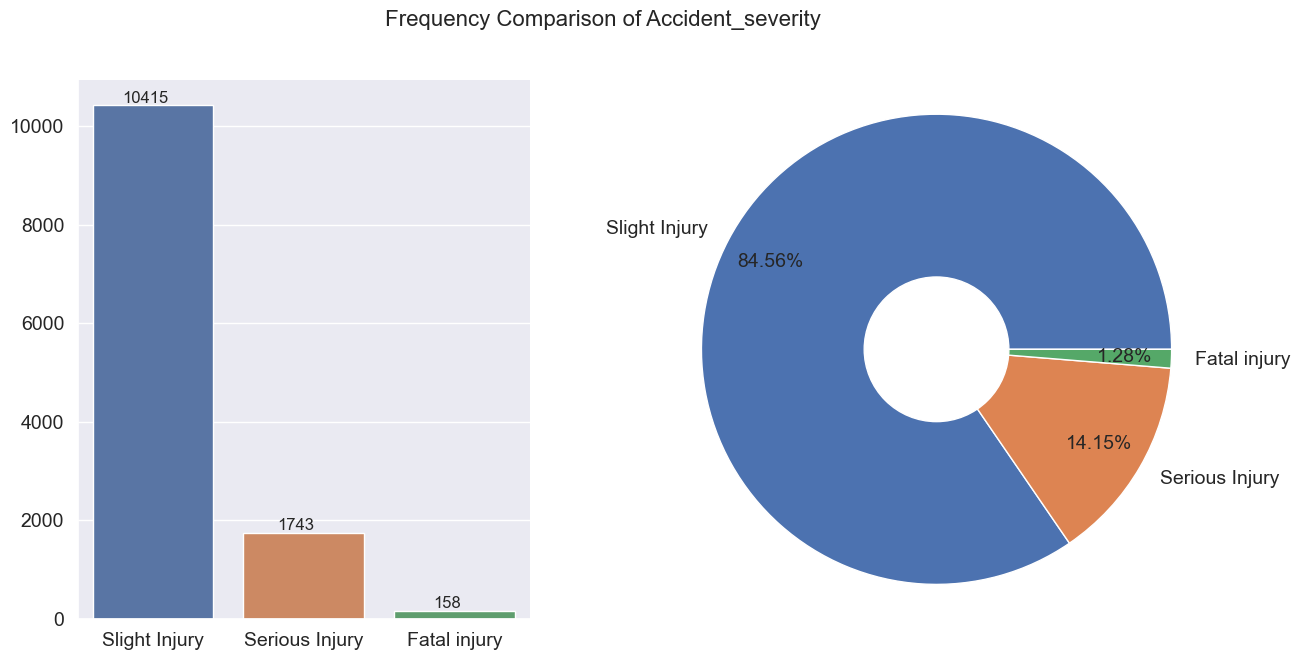

In [20]:
count_donut(data, 'Accident_severity')

In [21]:
def get_hour(time):
    value = datetime.strptime(time, '%H:%M:%S')
    return value.hour

data['Time'] = data['Time'].apply(get_hour)

def convert_time(time):
    if time >=6 and time <=18: 
        return 'Day'
    else: 
        return 'Night'

data['Time'] = data['Time'].apply(convert_time)

In [22]:
data['Time'].value_counts()

Day      9317
Night    2999
Name: Time, dtype: int64

In [23]:
# Variables except 'Accident_severity' and 'Time'
features_others = [x for x in data.columns.tolist() if x not in ['Accident_severity', 'Time']]

# List of features with horizontal xtickmarks (for others we shall make it vertical for visualization convenience)
features_horiz = ['Sex_of_driver', 'Vehicle_driver_relation', 'Defect_of_vehicle', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Sex_of_casualty', 'Casualty_severity']

<Figure size 1000x500 with 0 Axes>

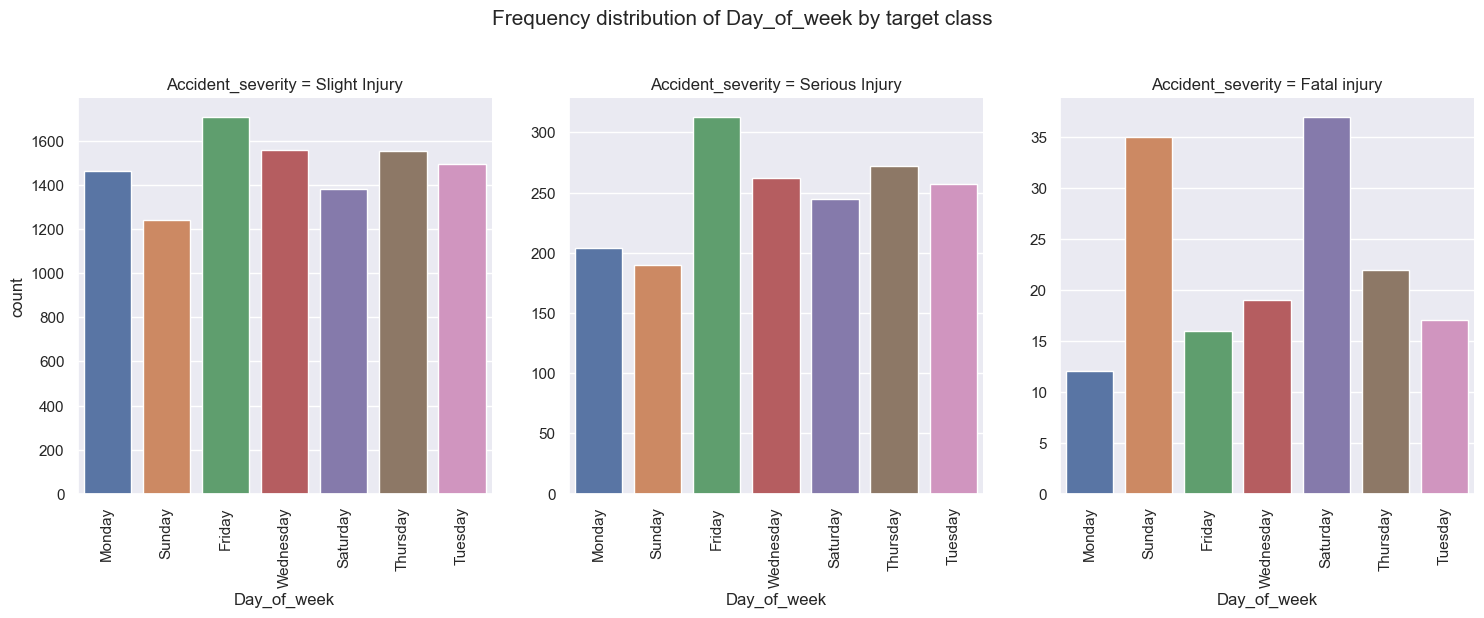

<Figure size 1000x500 with 0 Axes>

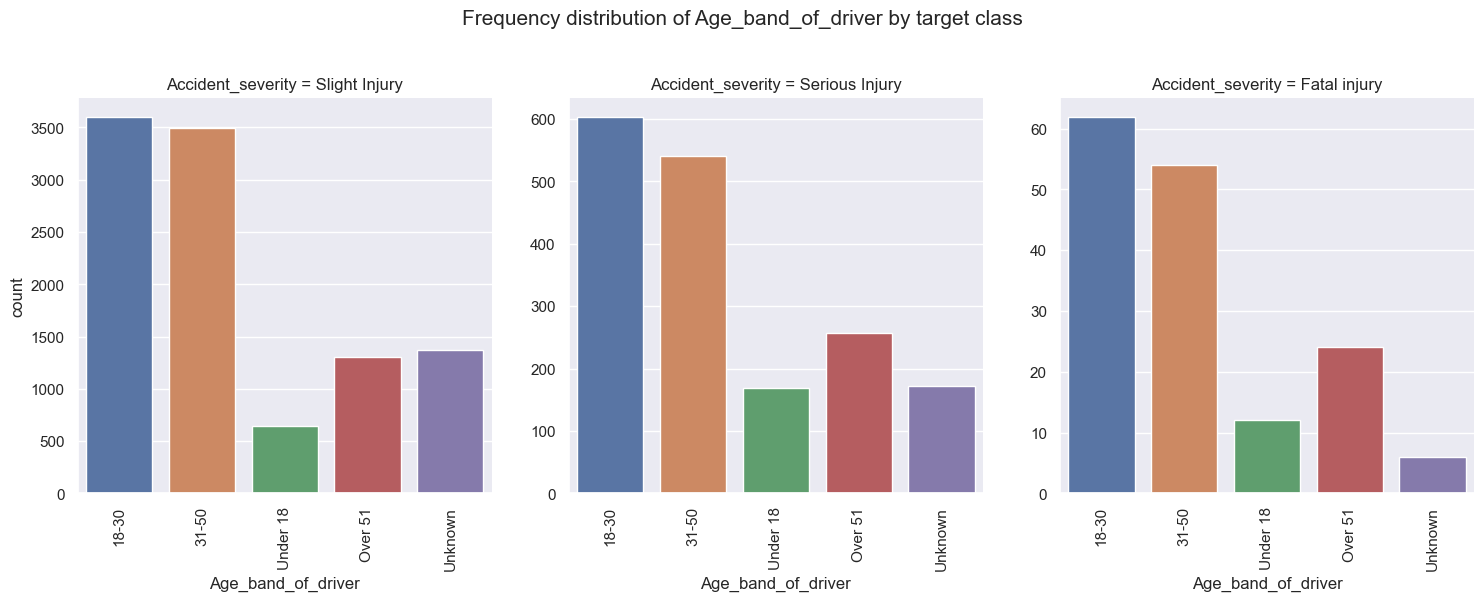

<Figure size 1000x500 with 0 Axes>

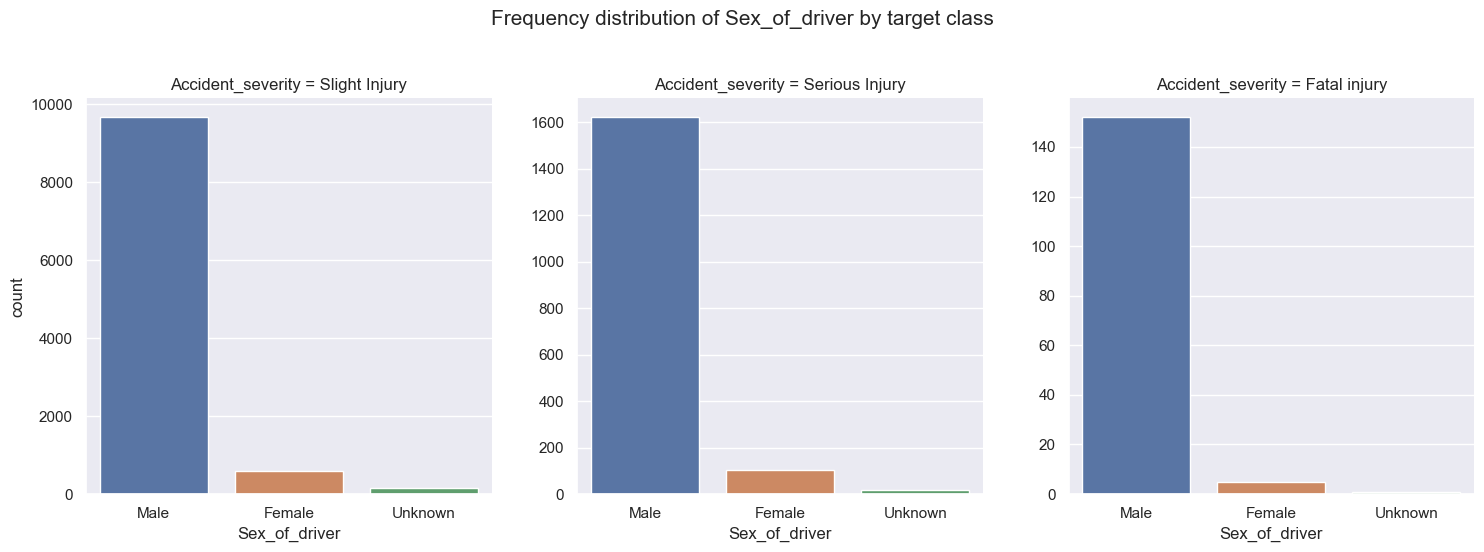

<Figure size 1000x500 with 0 Axes>

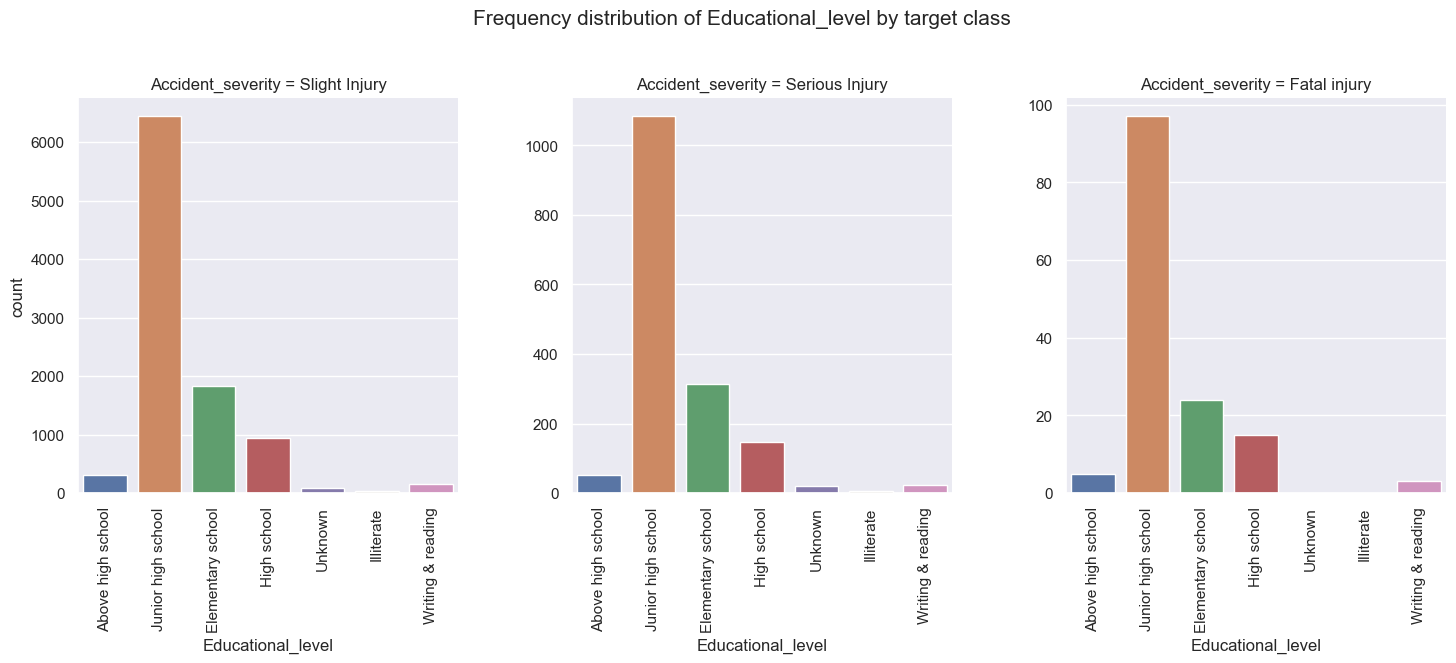

<Figure size 1000x500 with 0 Axes>

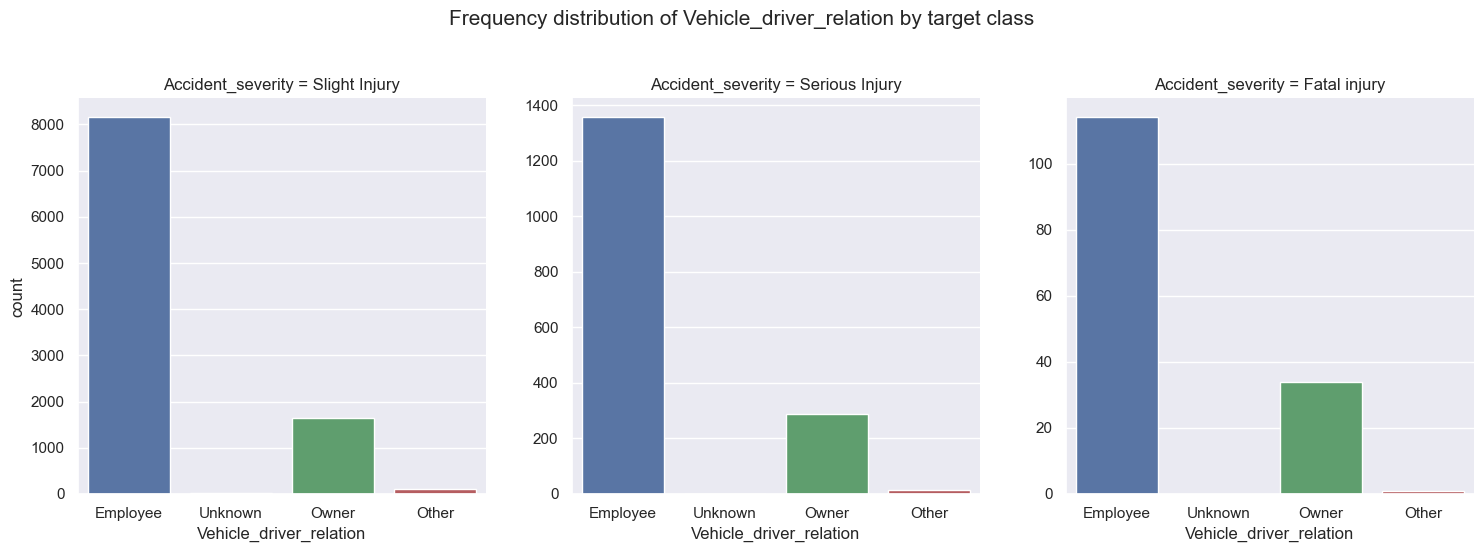

<Figure size 1000x500 with 0 Axes>

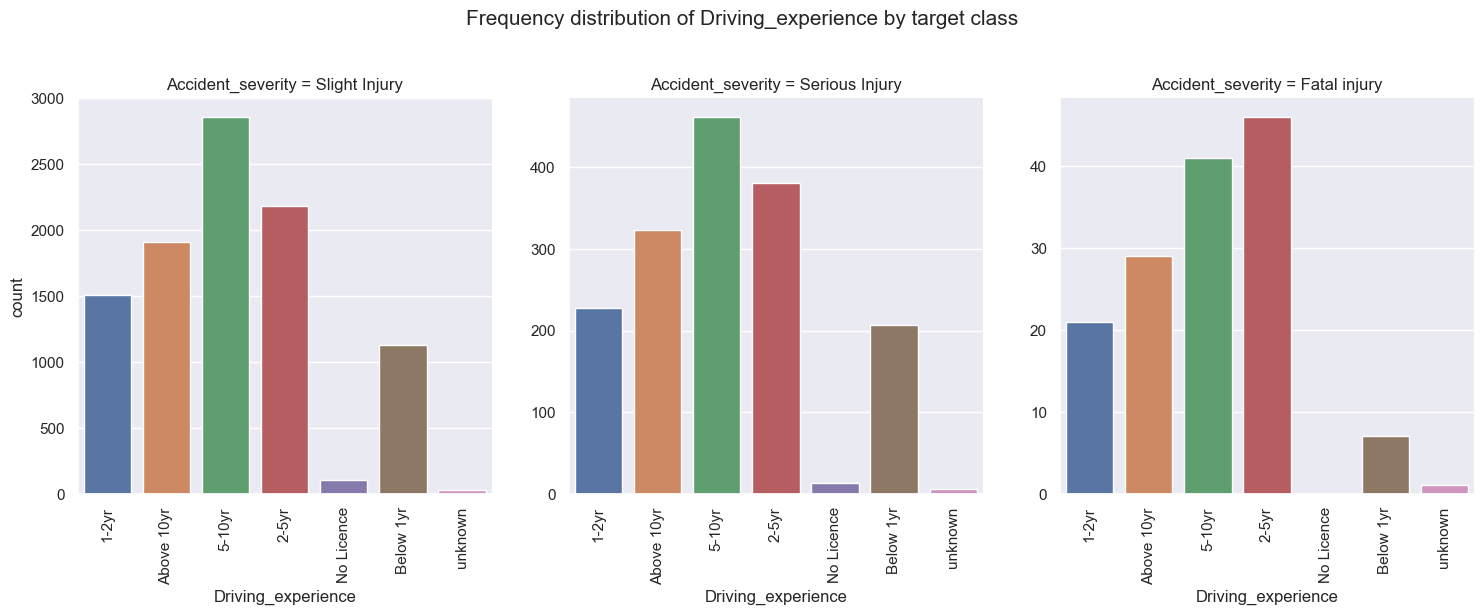

<Figure size 1000x500 with 0 Axes>

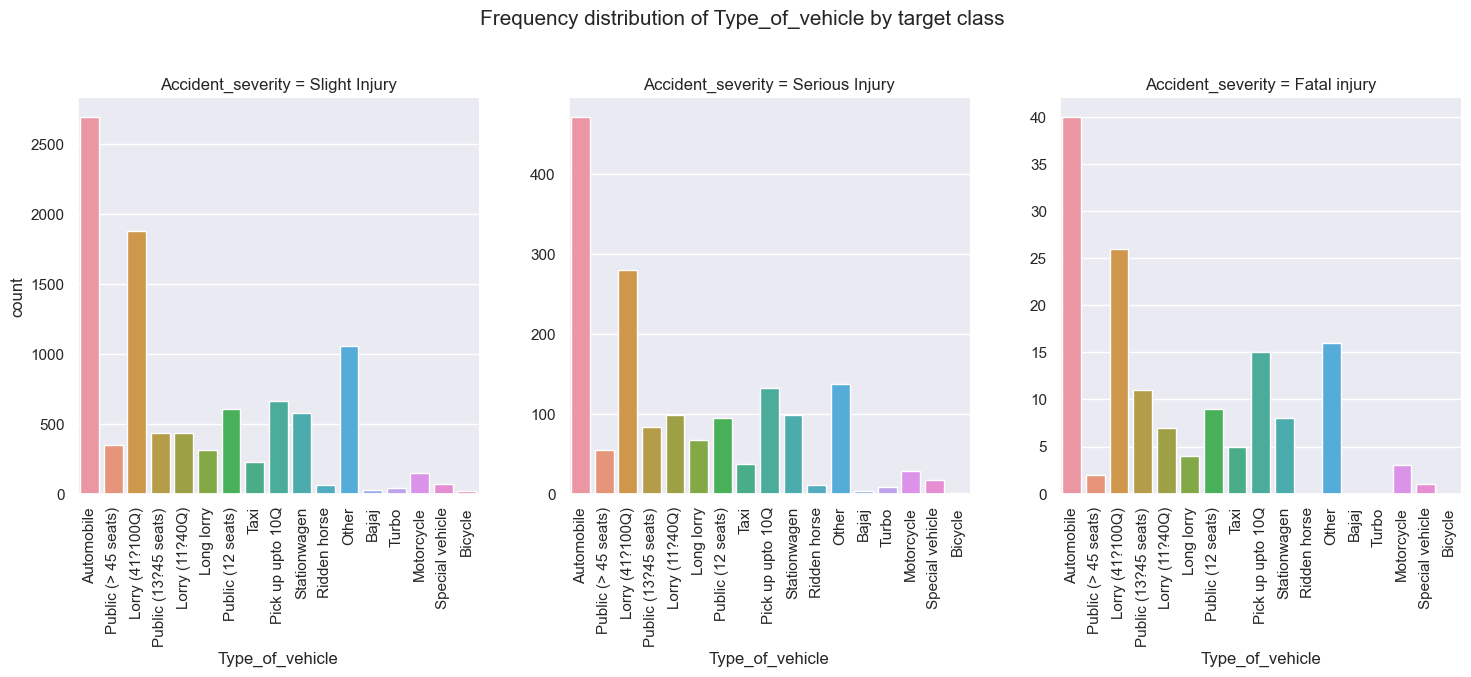

<Figure size 1000x500 with 0 Axes>

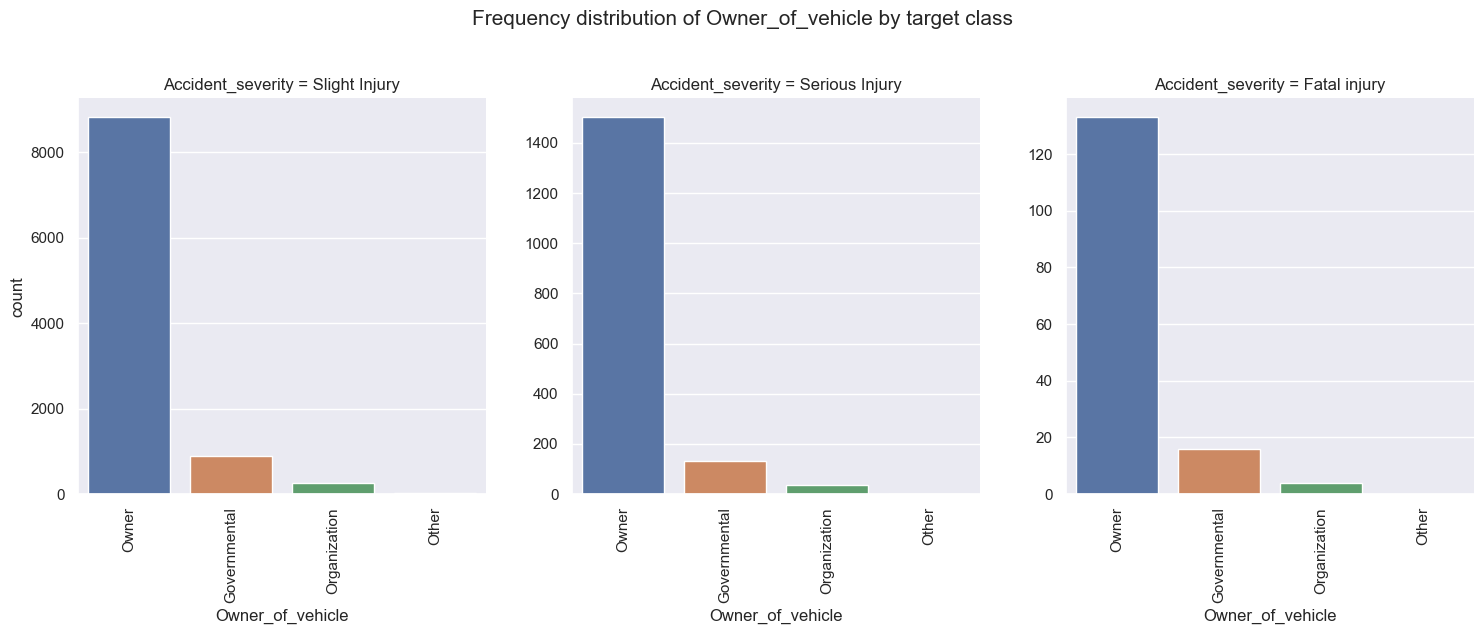

<Figure size 1000x500 with 0 Axes>

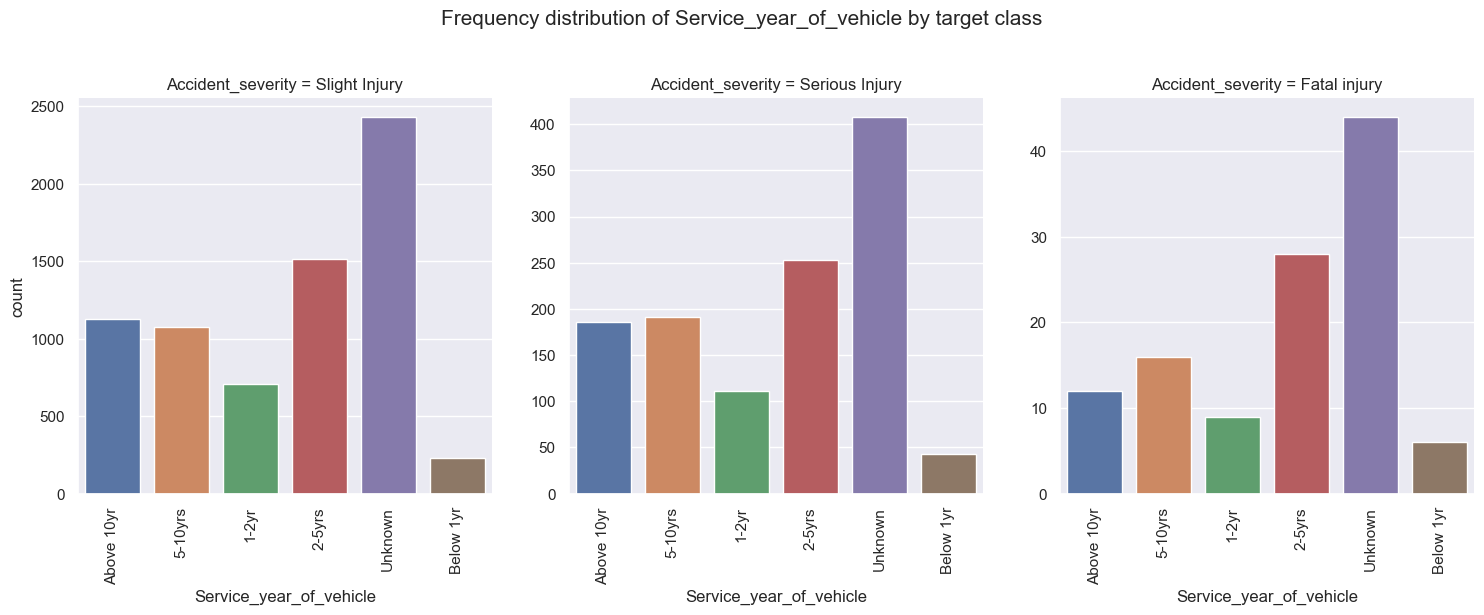

<Figure size 1000x500 with 0 Axes>

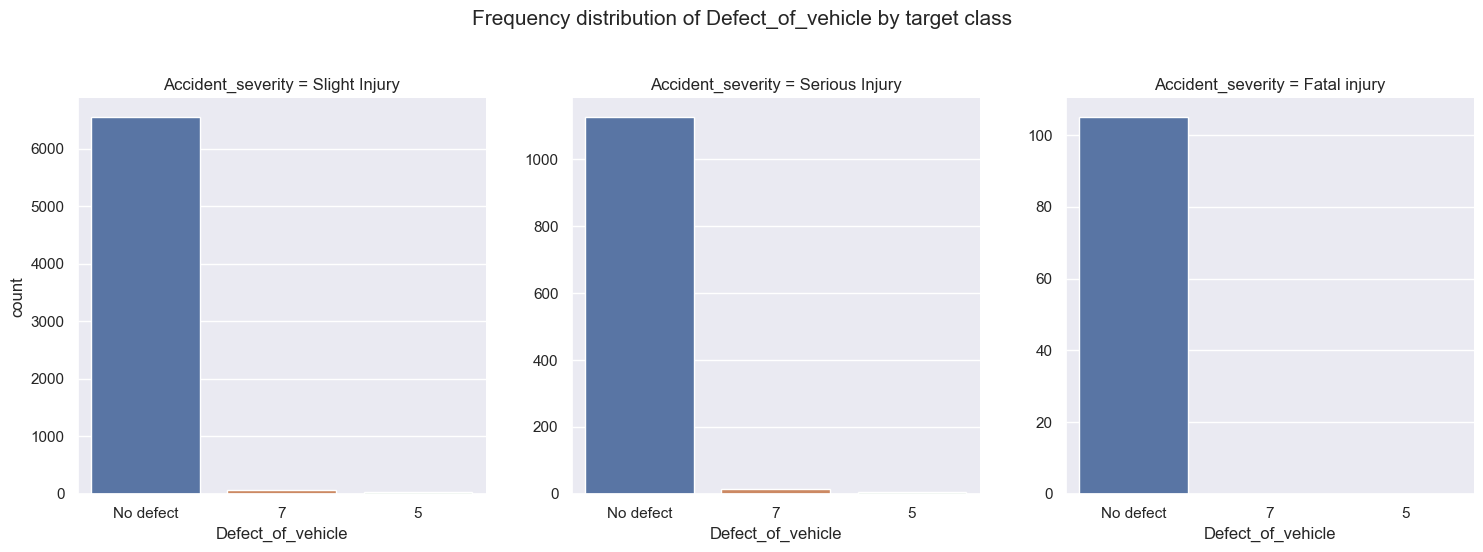

<Figure size 1000x500 with 0 Axes>

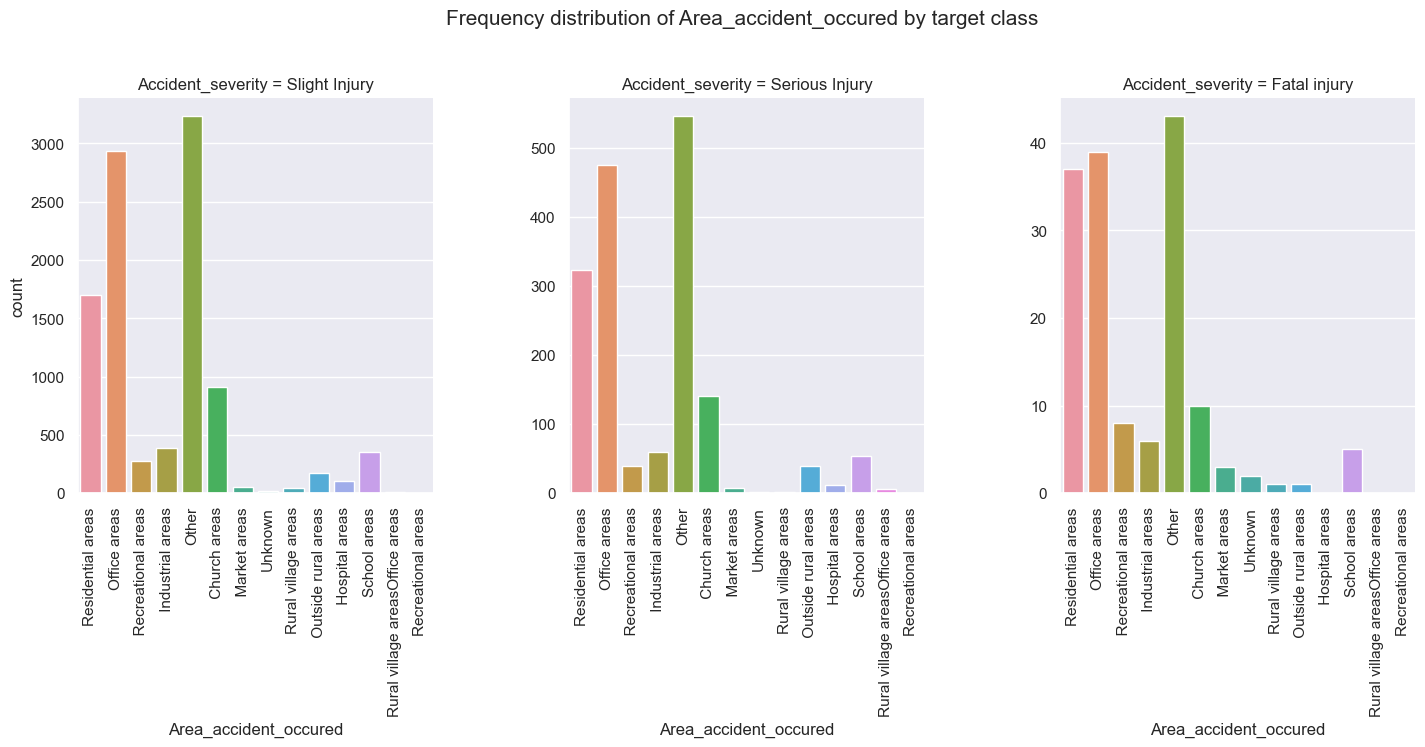

<Figure size 1000x500 with 0 Axes>

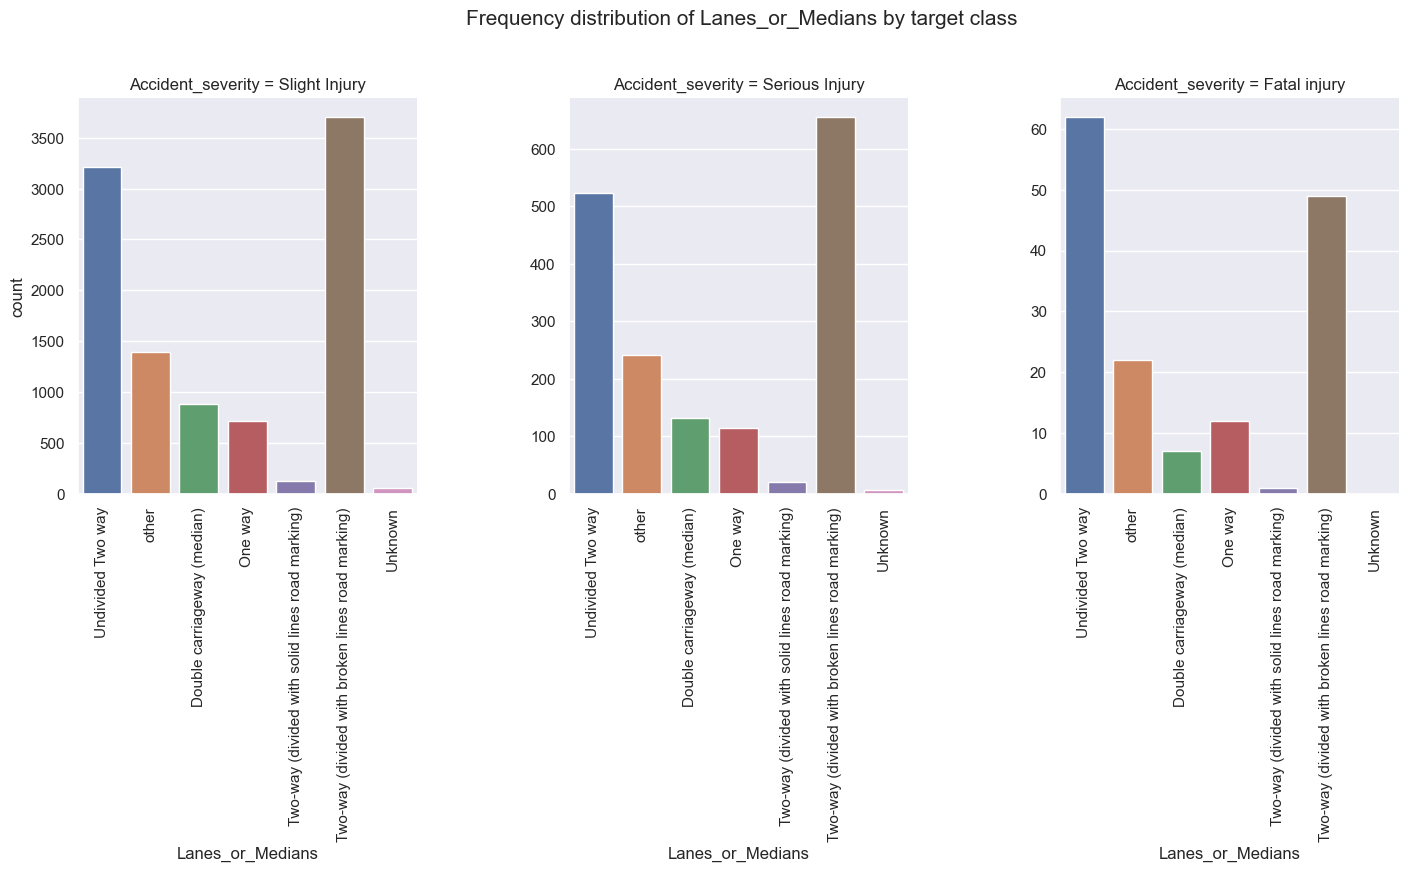

<Figure size 1000x500 with 0 Axes>

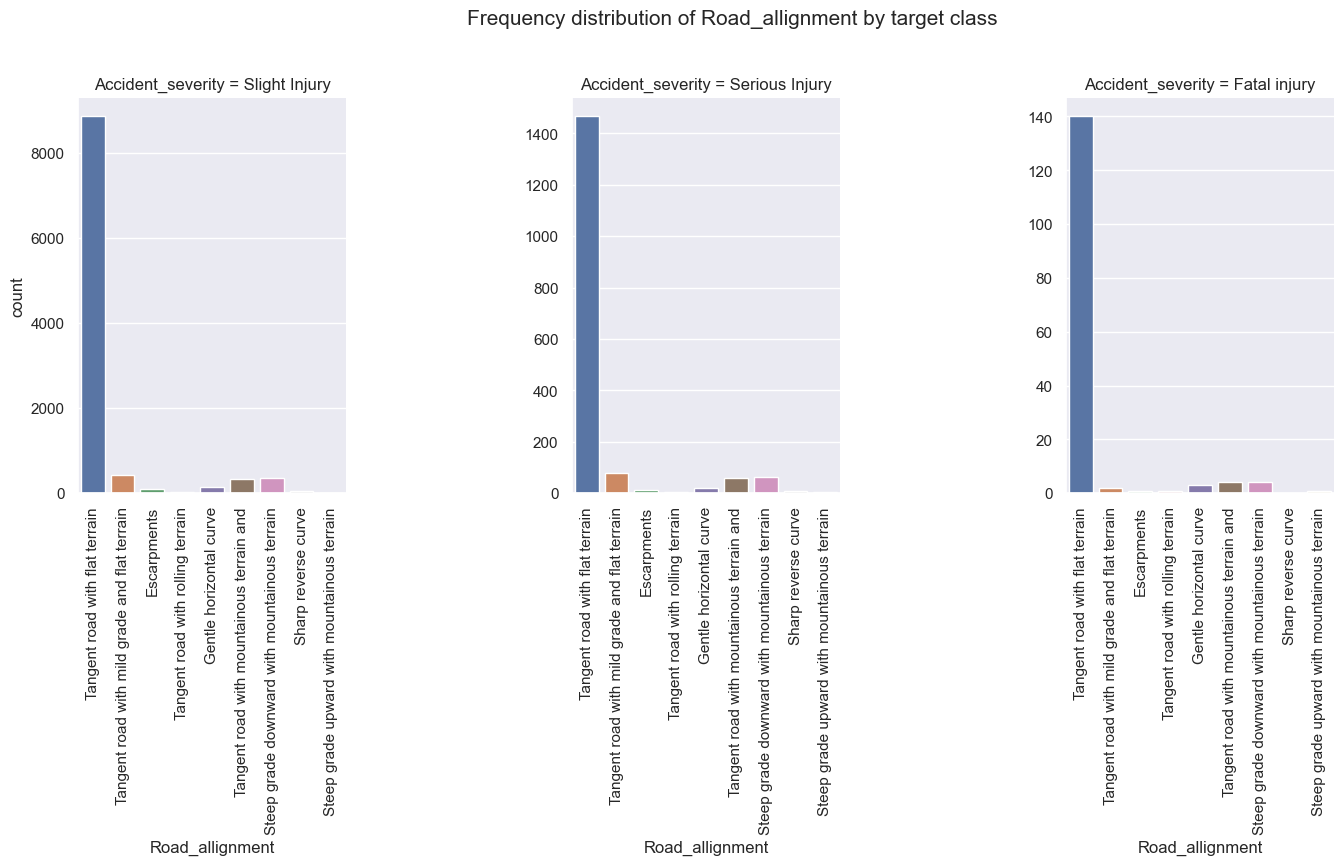

<Figure size 1000x500 with 0 Axes>

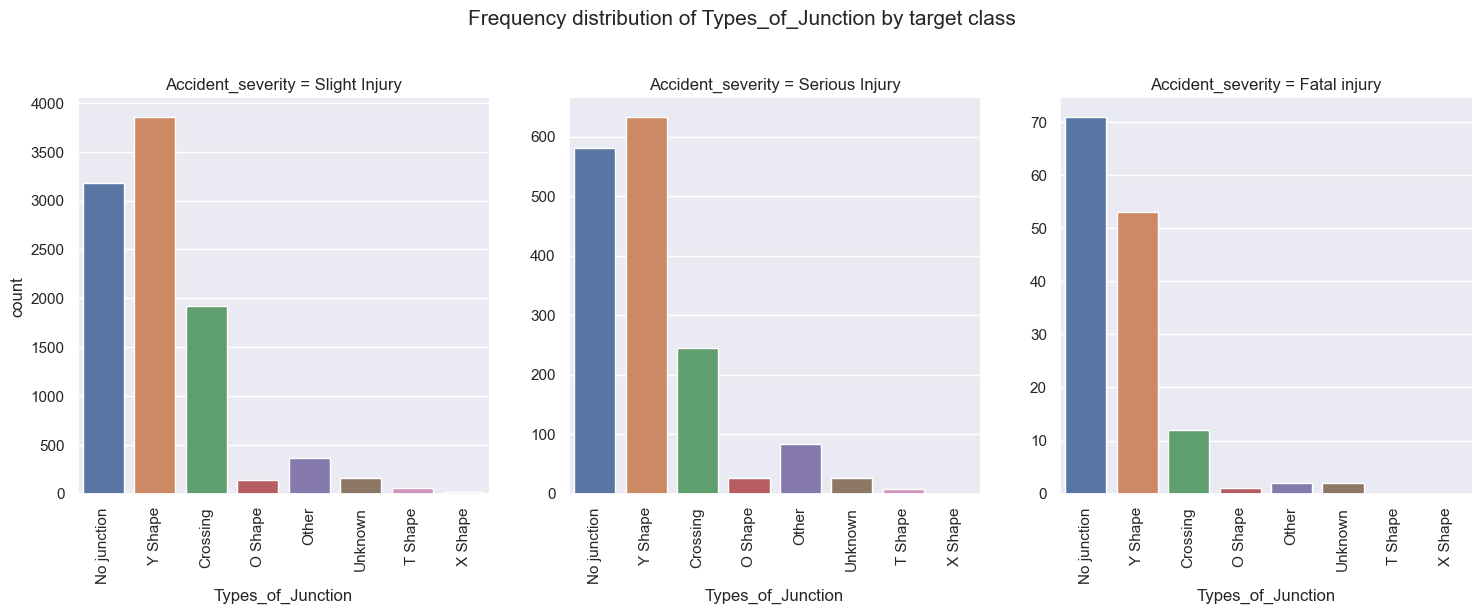

<Figure size 1000x500 with 0 Axes>

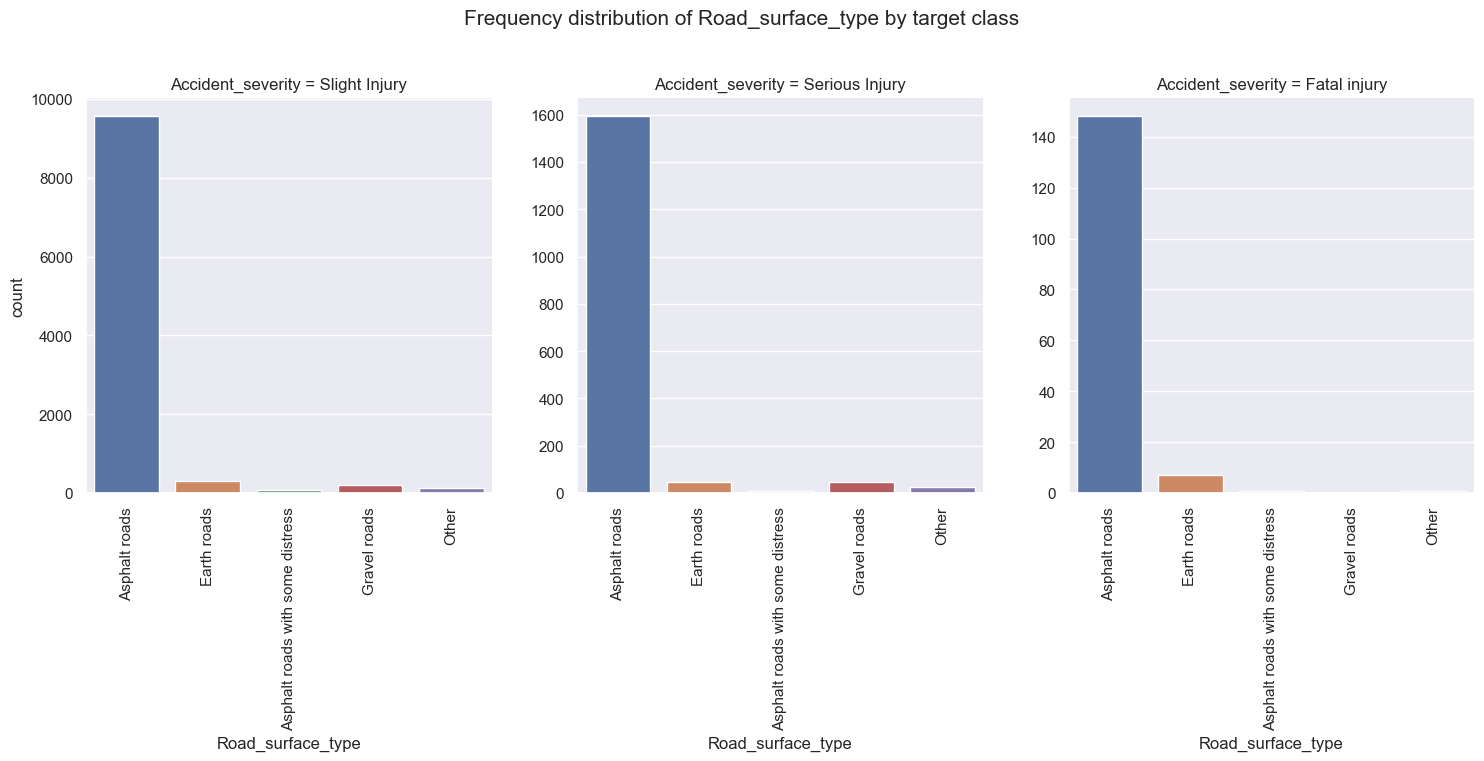

<Figure size 1000x500 with 0 Axes>

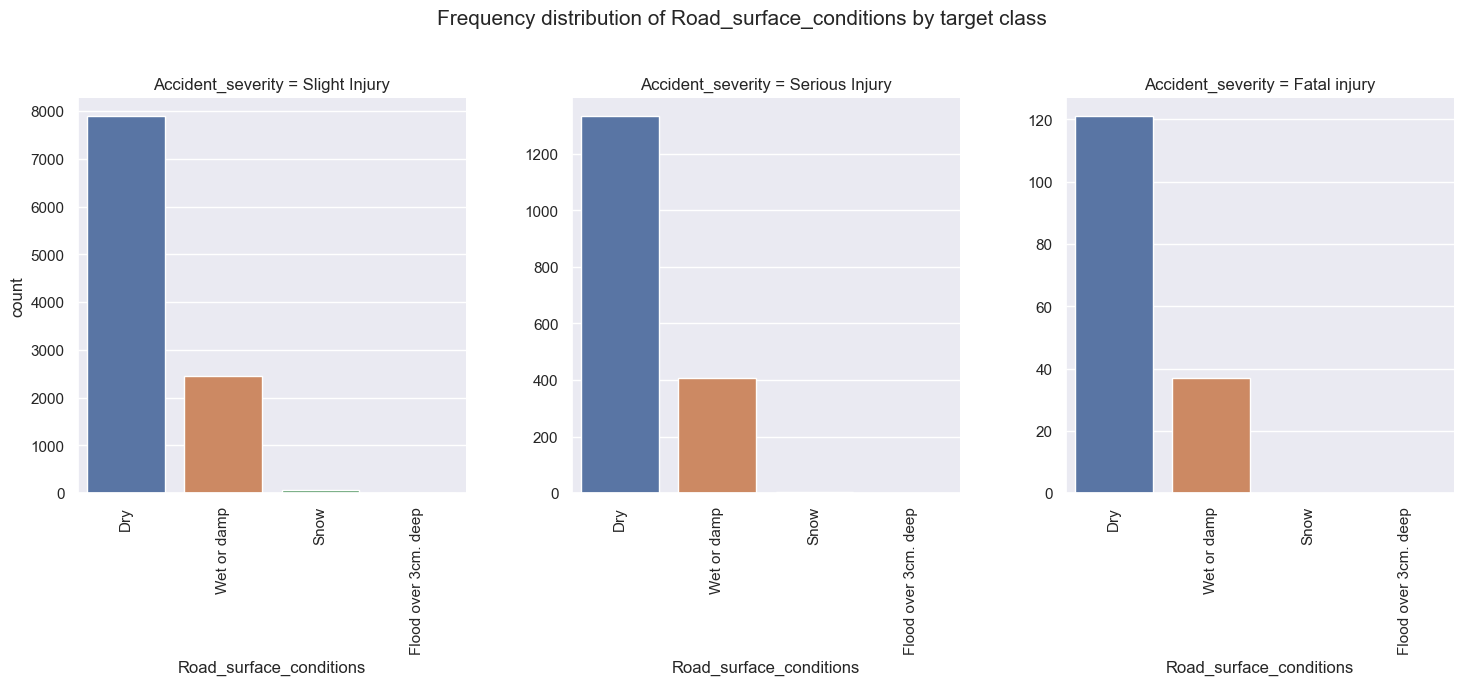

<Figure size 1000x500 with 0 Axes>

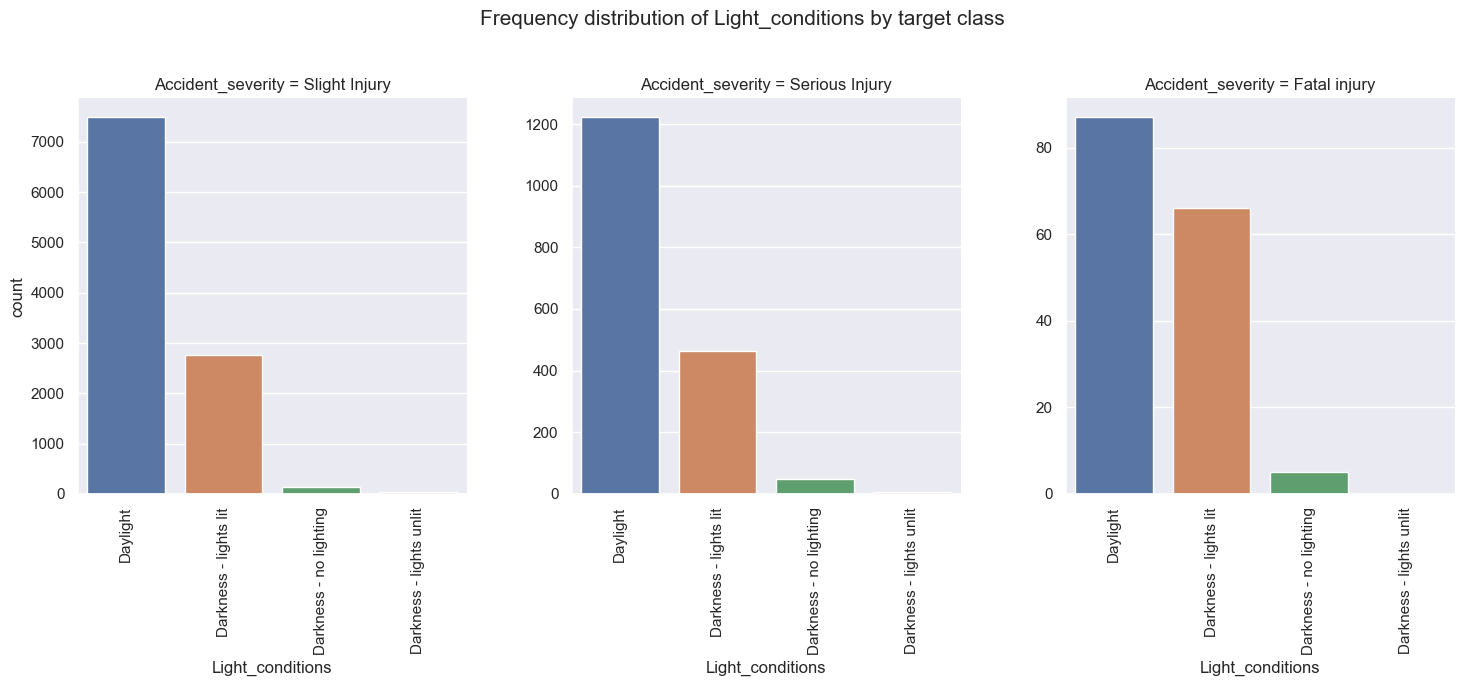

<Figure size 1000x500 with 0 Axes>

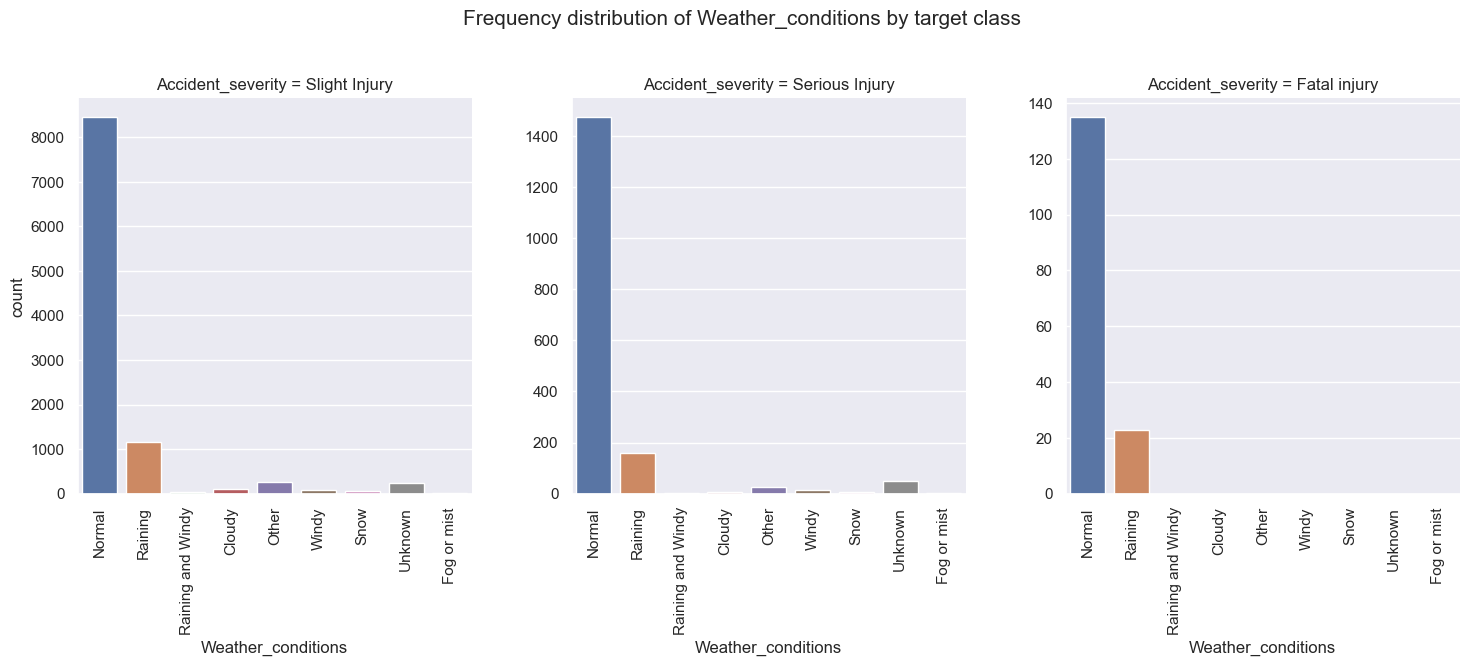

<Figure size 1000x500 with 0 Axes>

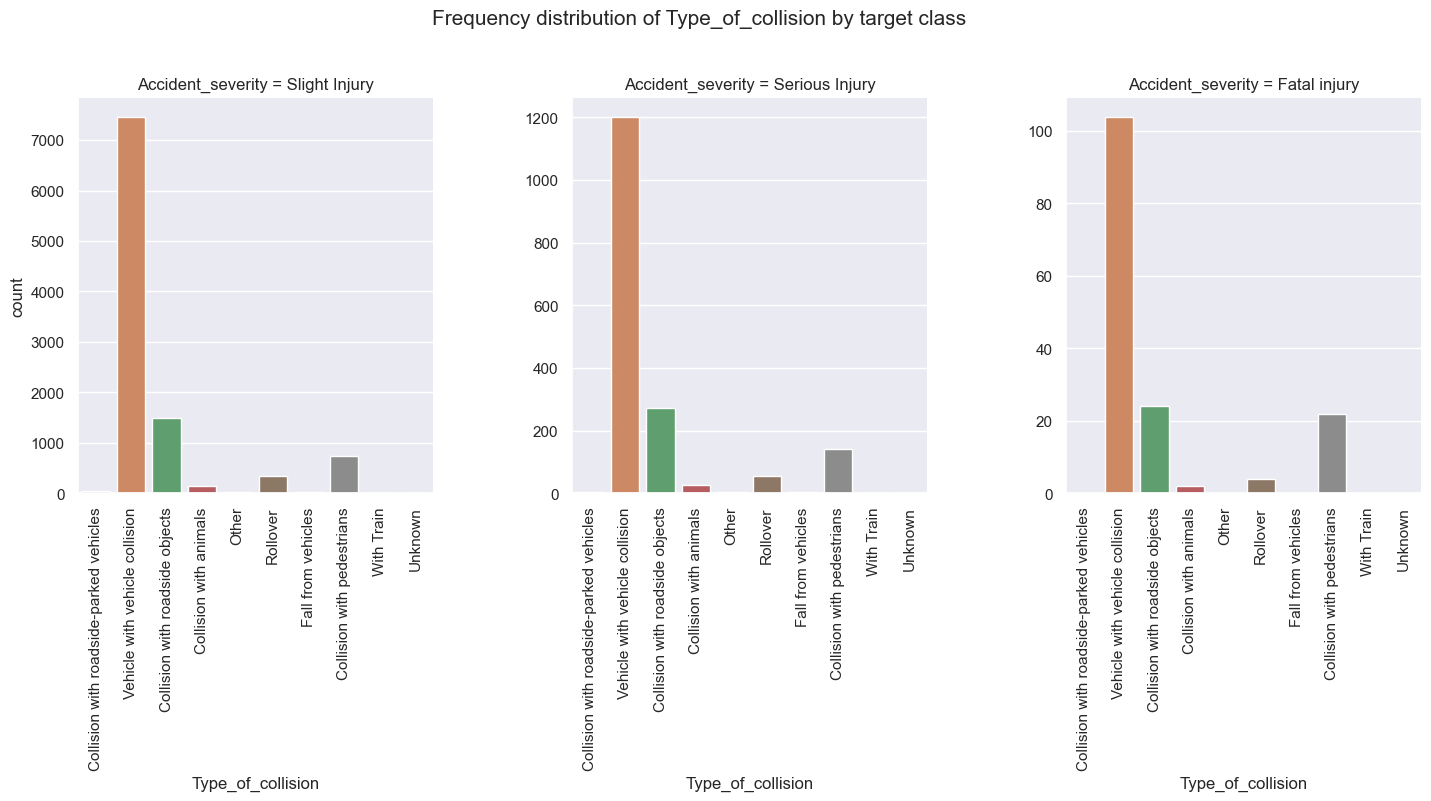

<Figure size 1000x500 with 0 Axes>

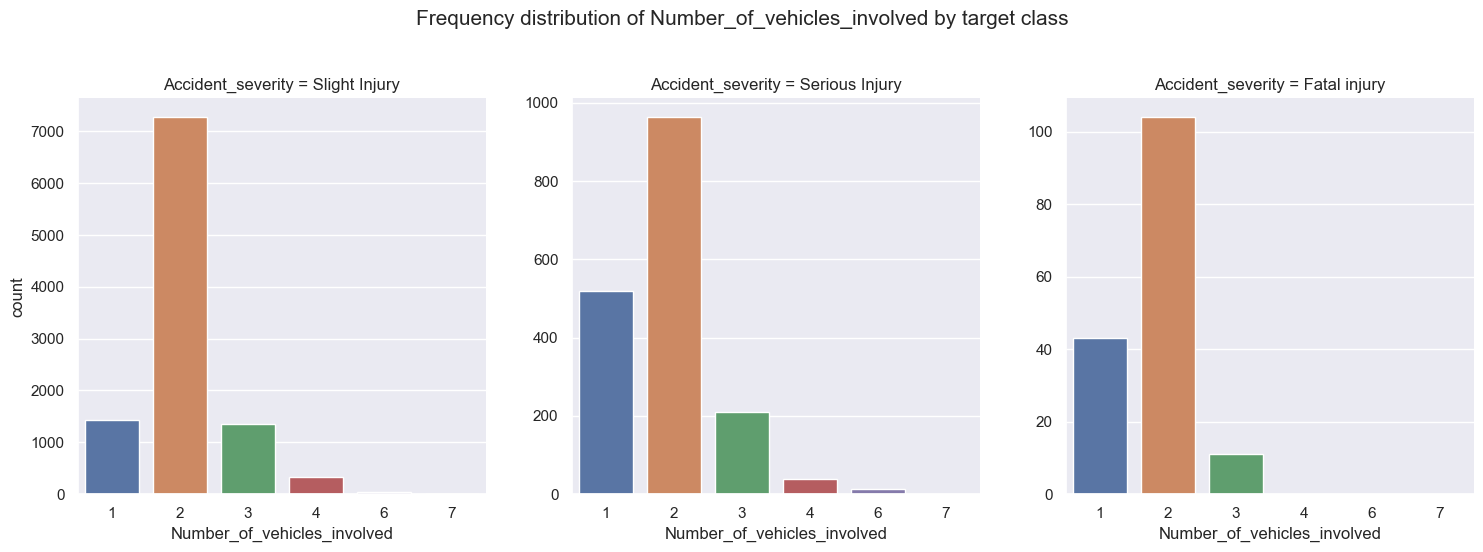

<Figure size 1000x500 with 0 Axes>

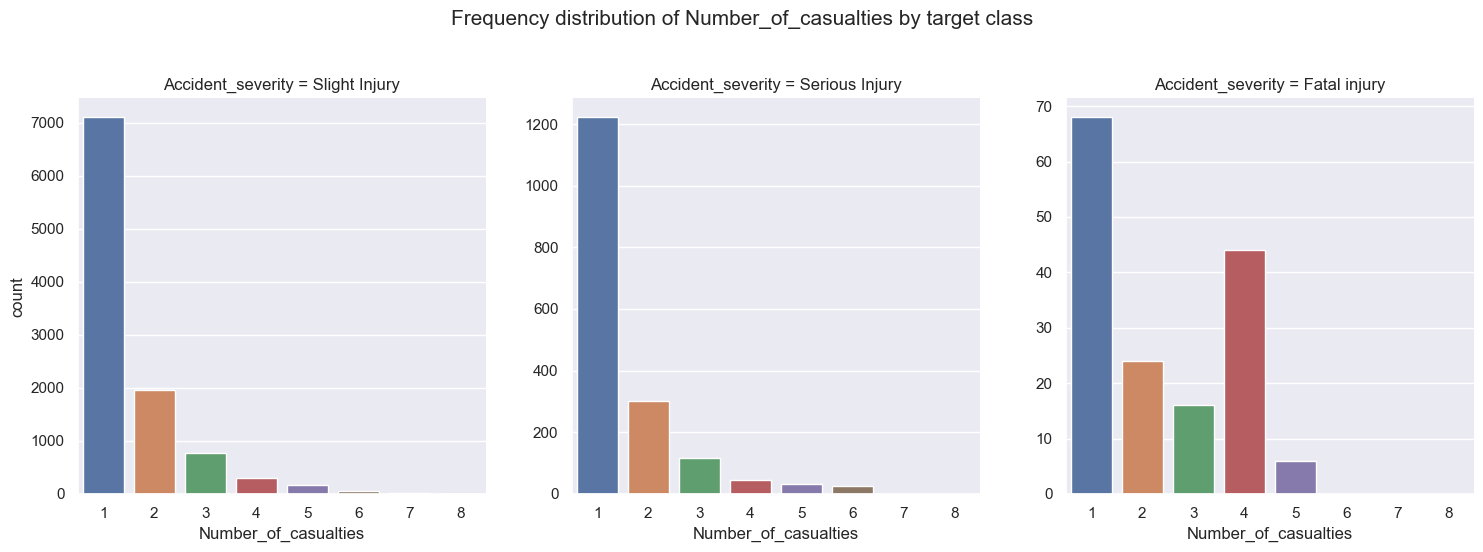

<Figure size 1000x500 with 0 Axes>

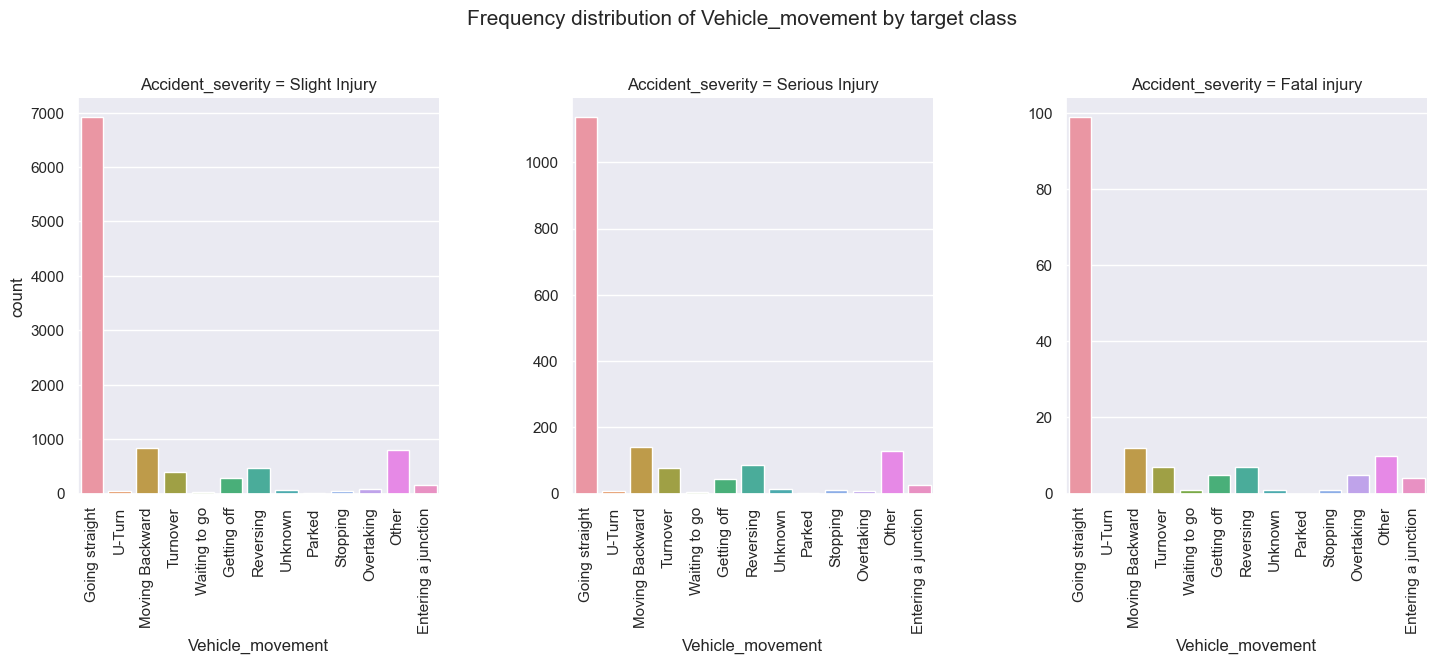

<Figure size 1000x500 with 0 Axes>

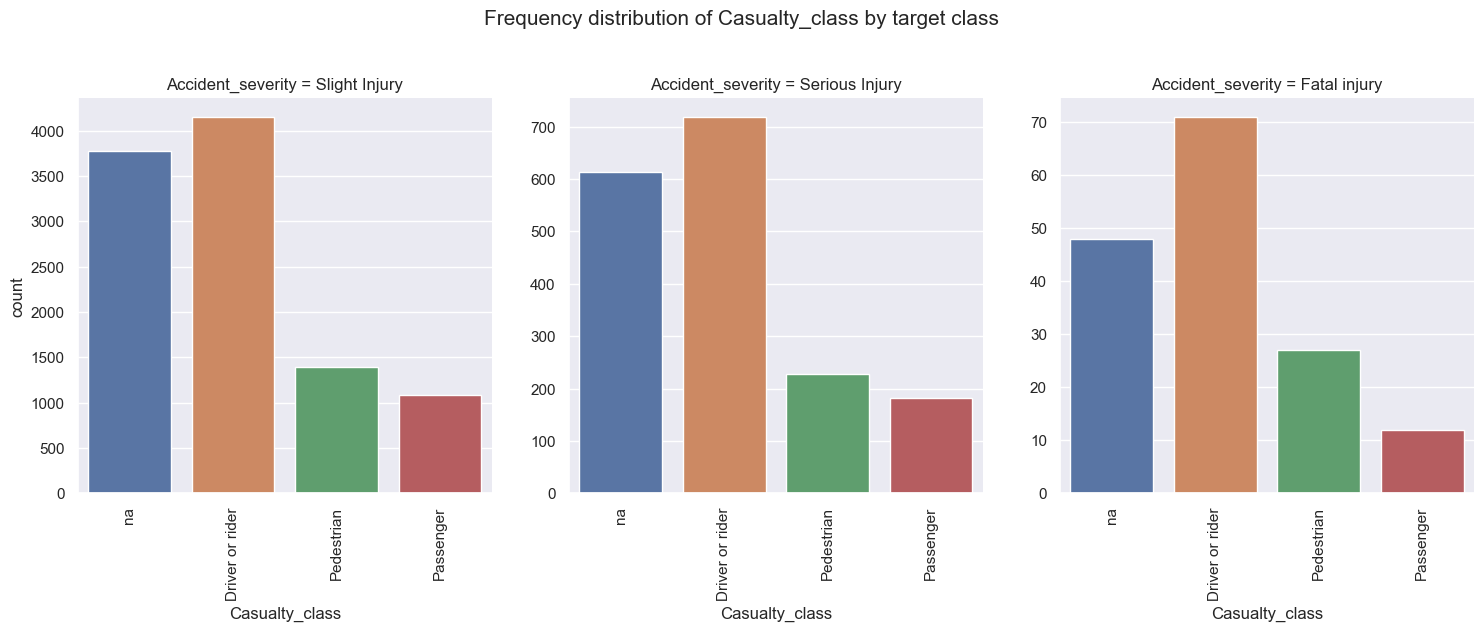

<Figure size 1000x500 with 0 Axes>

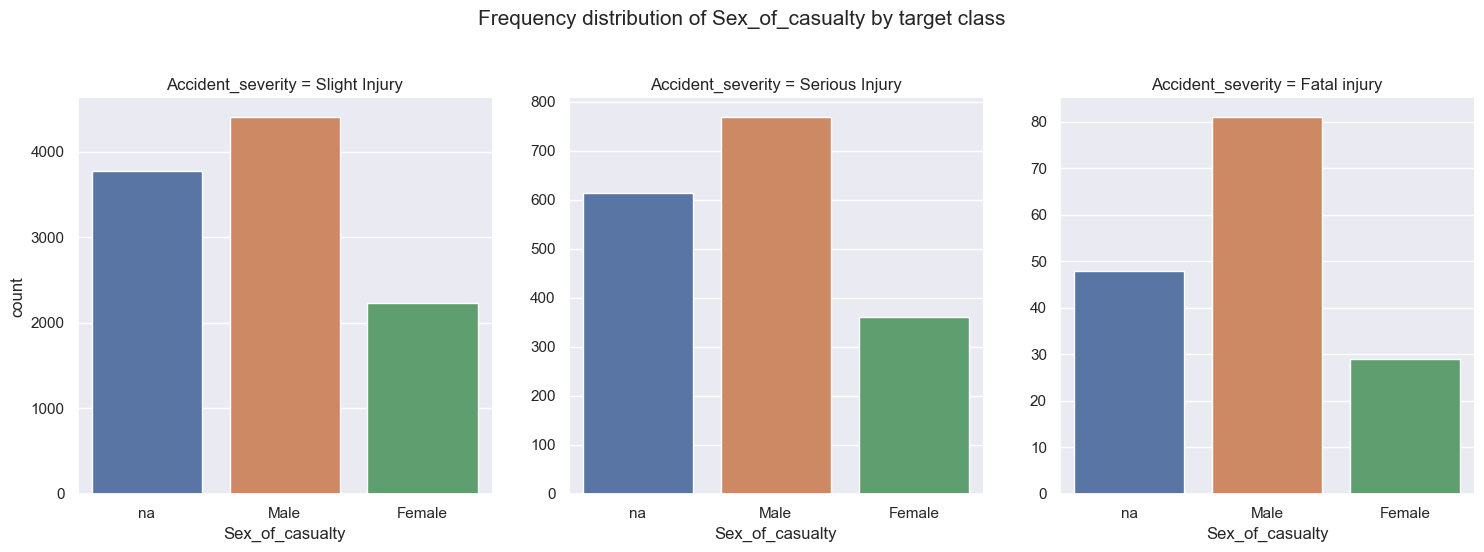

<Figure size 1000x500 with 0 Axes>

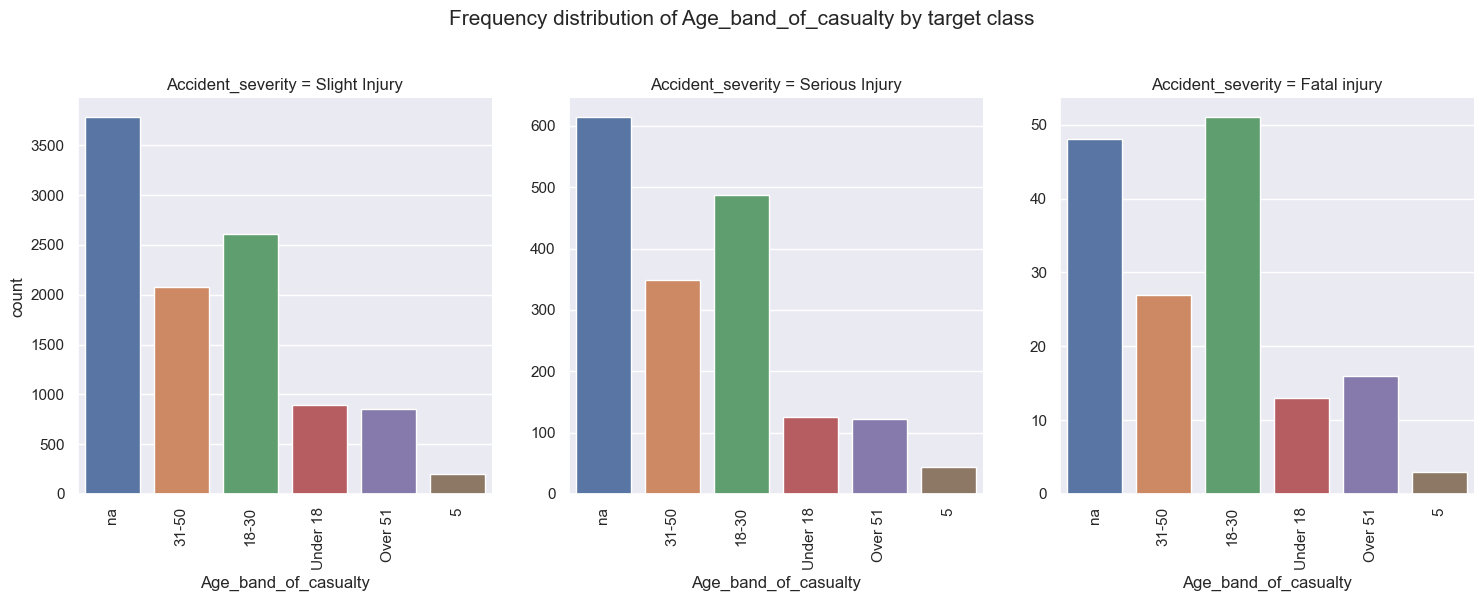

<Figure size 1000x500 with 0 Axes>

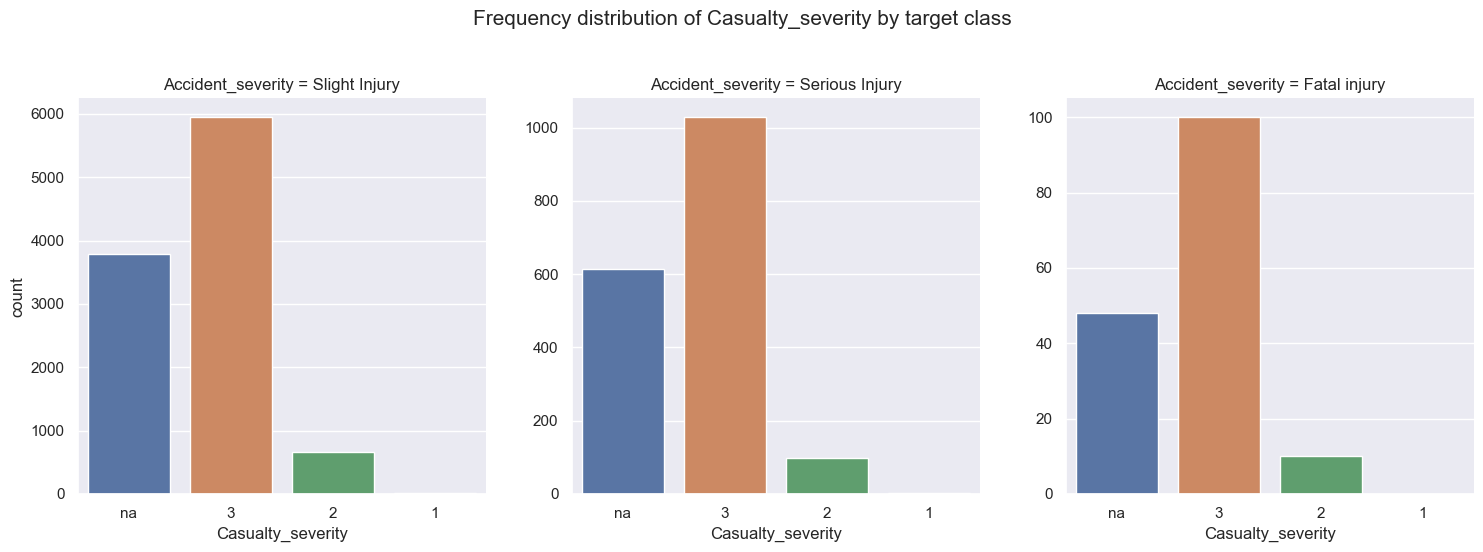

<Figure size 1000x500 with 0 Axes>

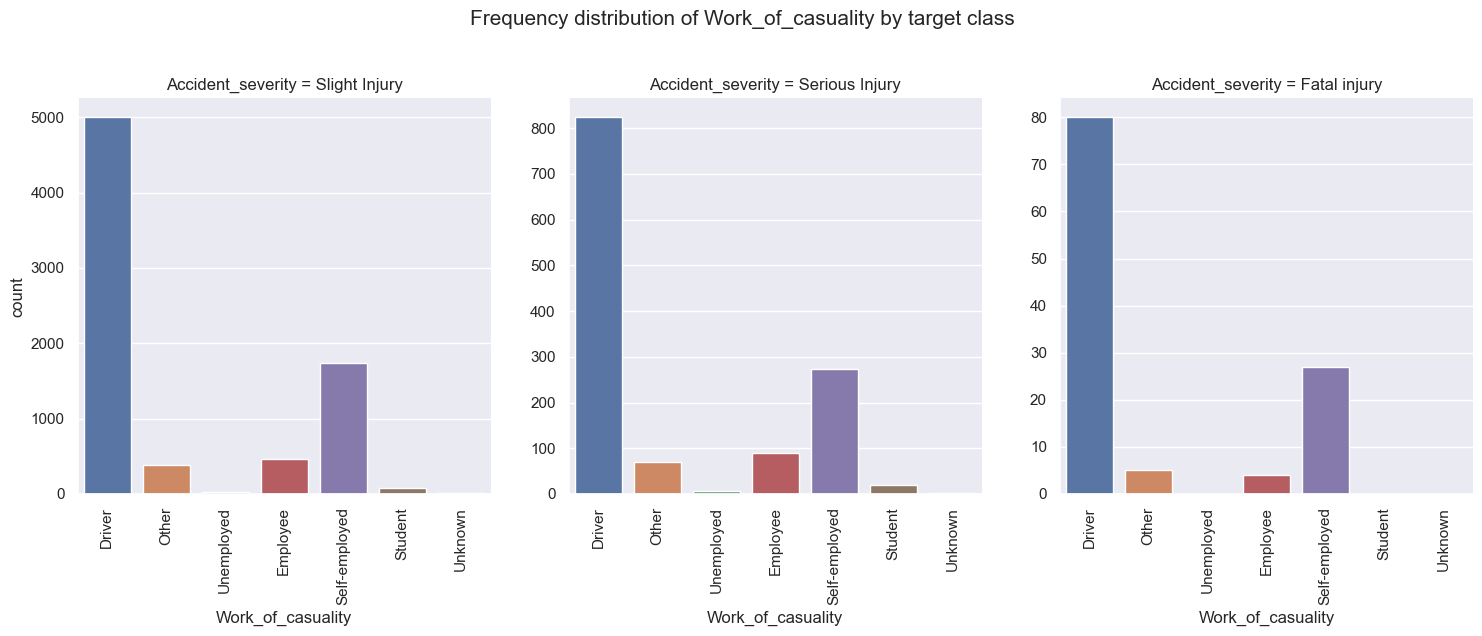

<Figure size 1000x500 with 0 Axes>

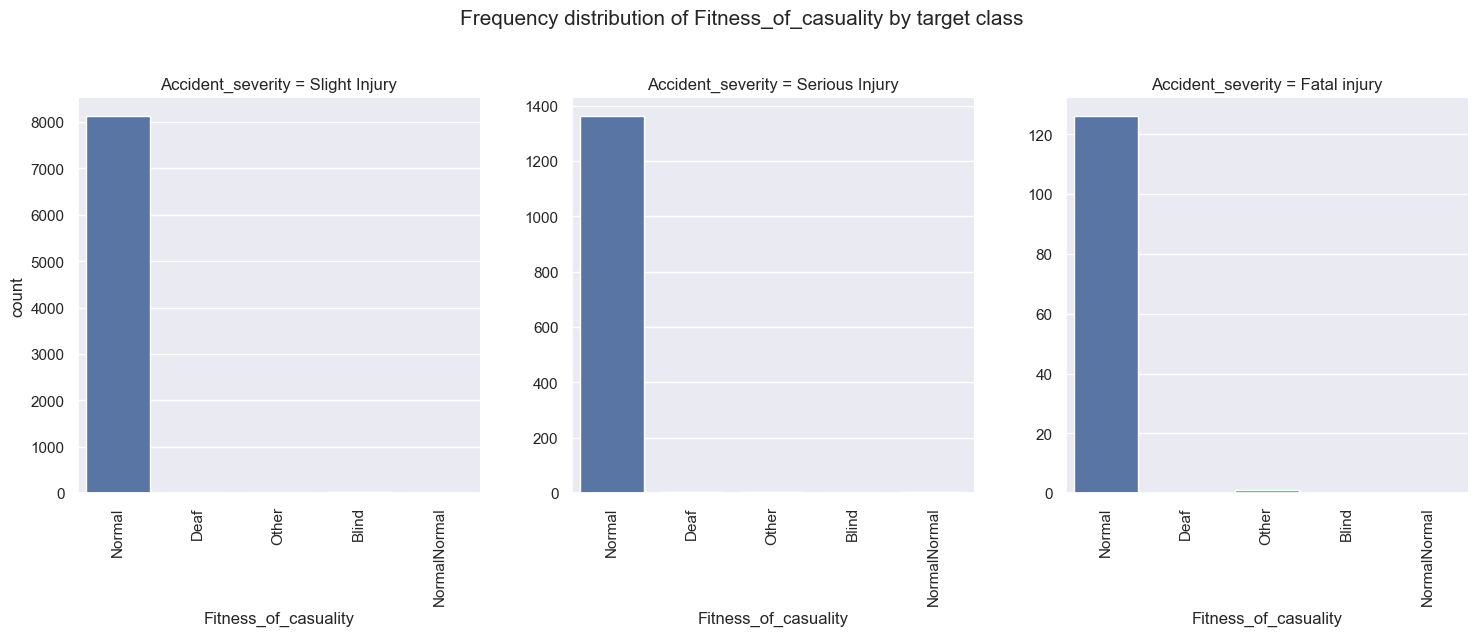

C:\Users\josh\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

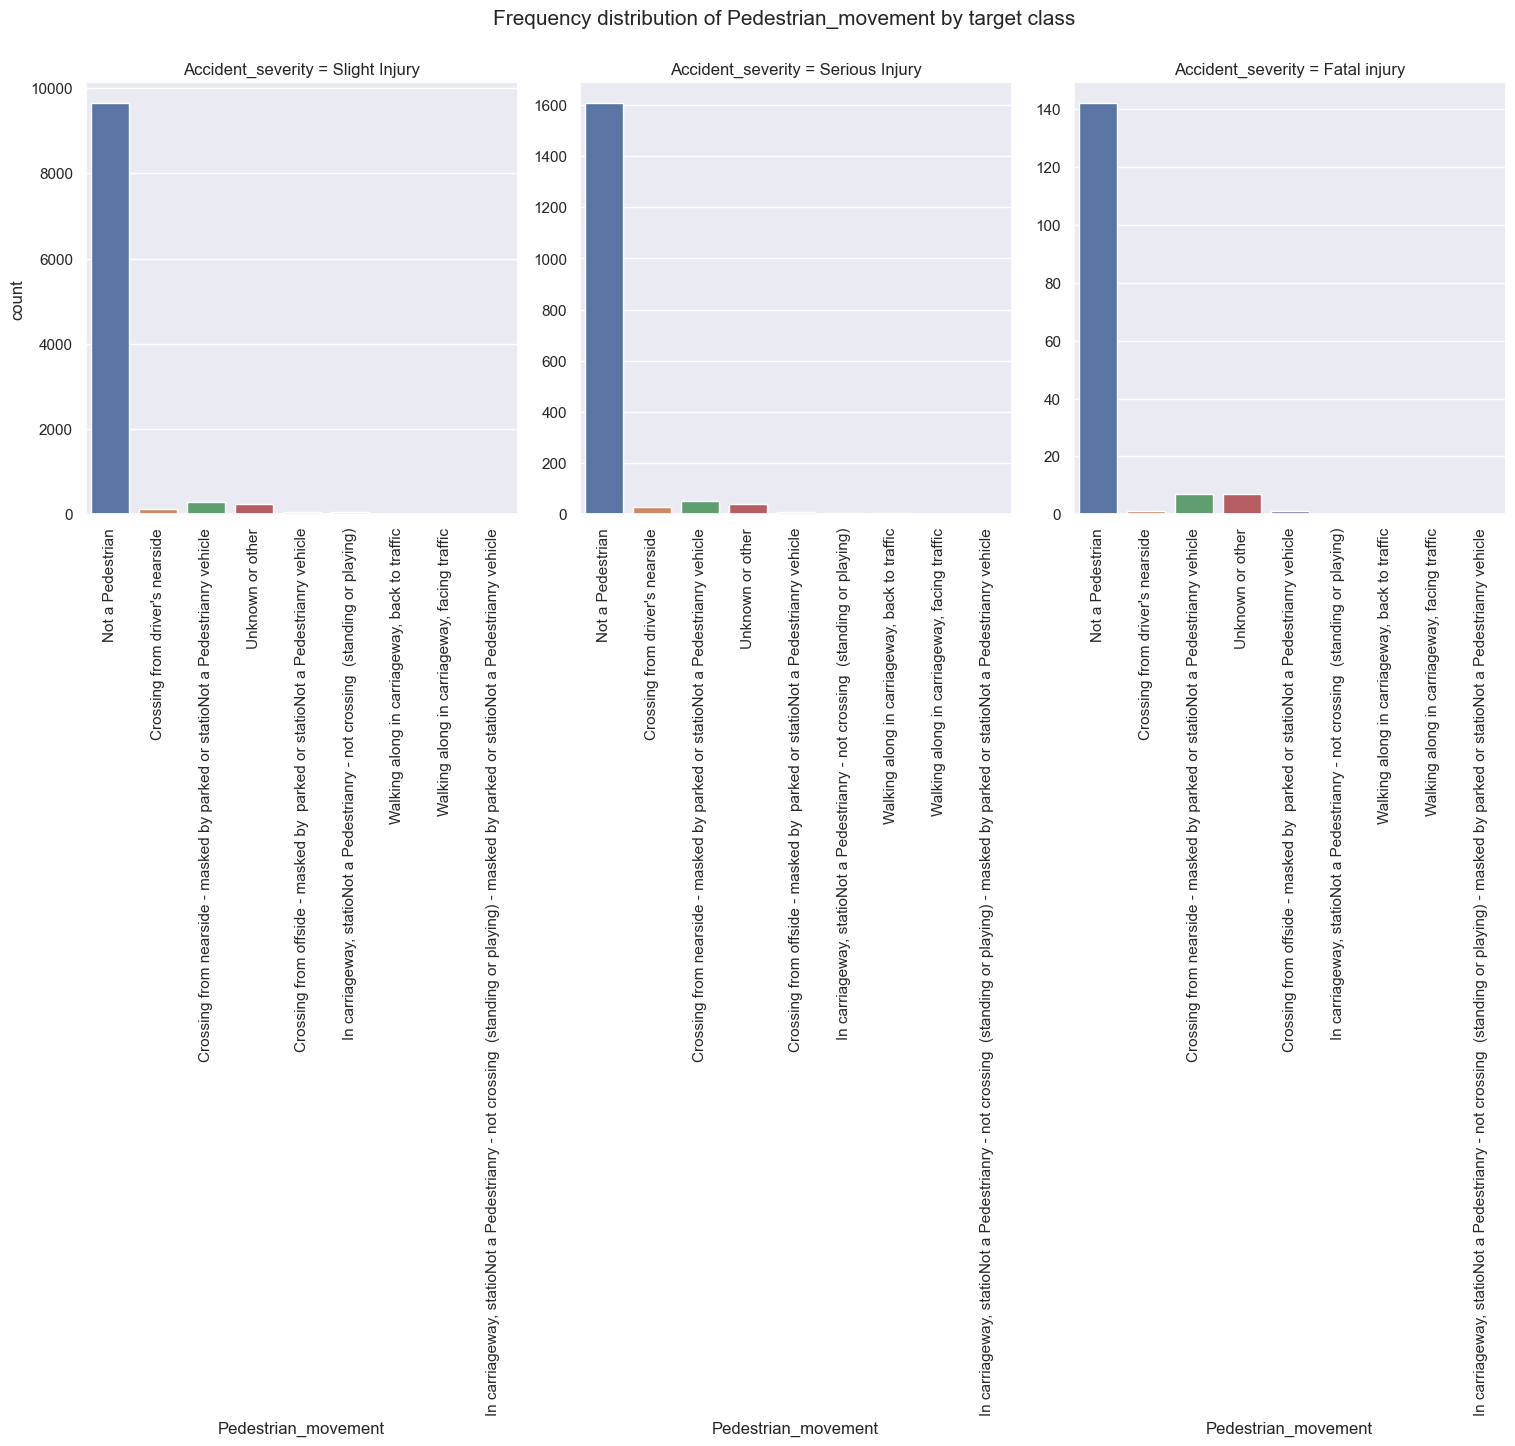

<Figure size 1000x500 with 0 Axes>

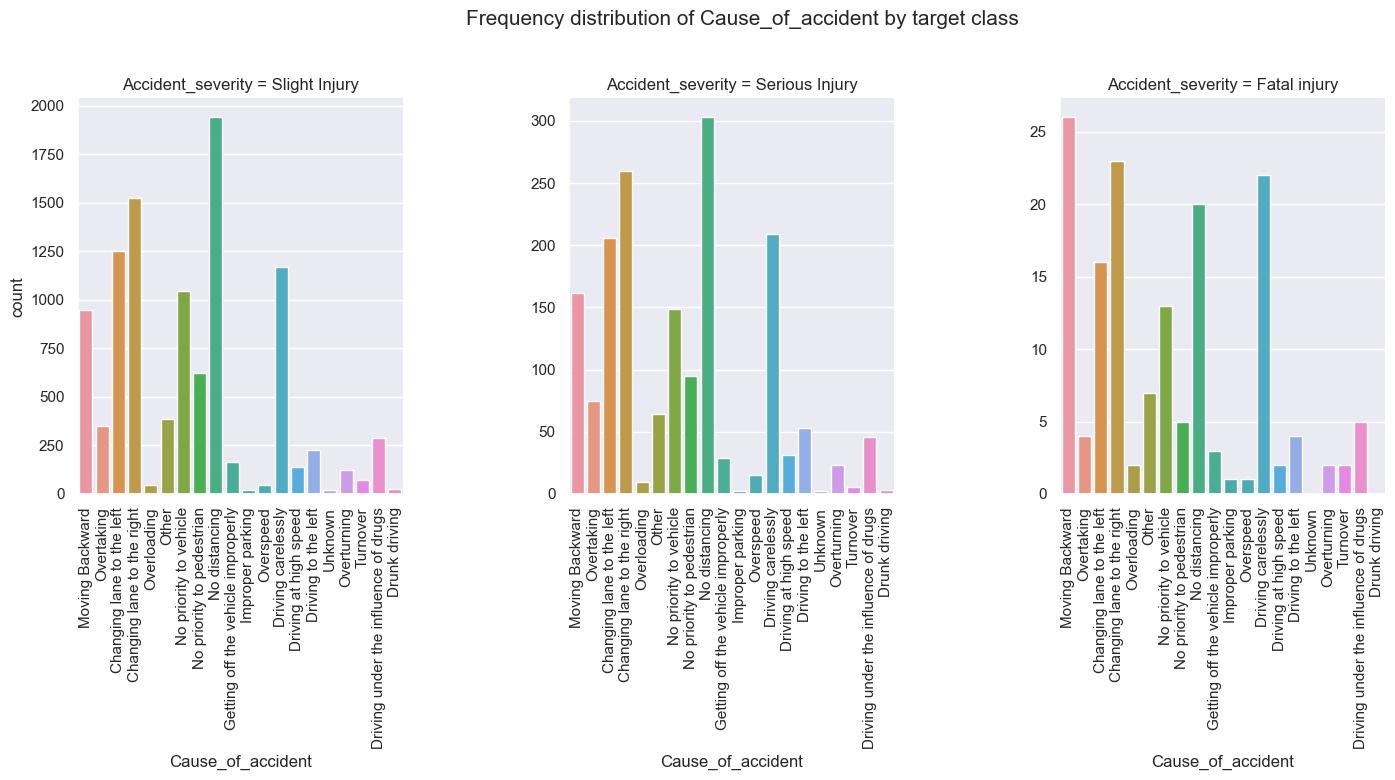

In [24]:
# Catplot to compare frequency distributions of features (except 'Time') across target classes
for feature in features_others:
    plt.figure(figsize = (10, 5))
    catplot = sns.catplot(data = data, x = feature, col = 'Accident_severity', kind = 'count', sharey = False)
    if feature not in features_horiz:
        catplot.set_xticklabels(rotation = 90)
    plt.suptitle("Frequency distribution of {} by target class".format(feature), y = 1.1, fontsize = 15)
    plt.show()

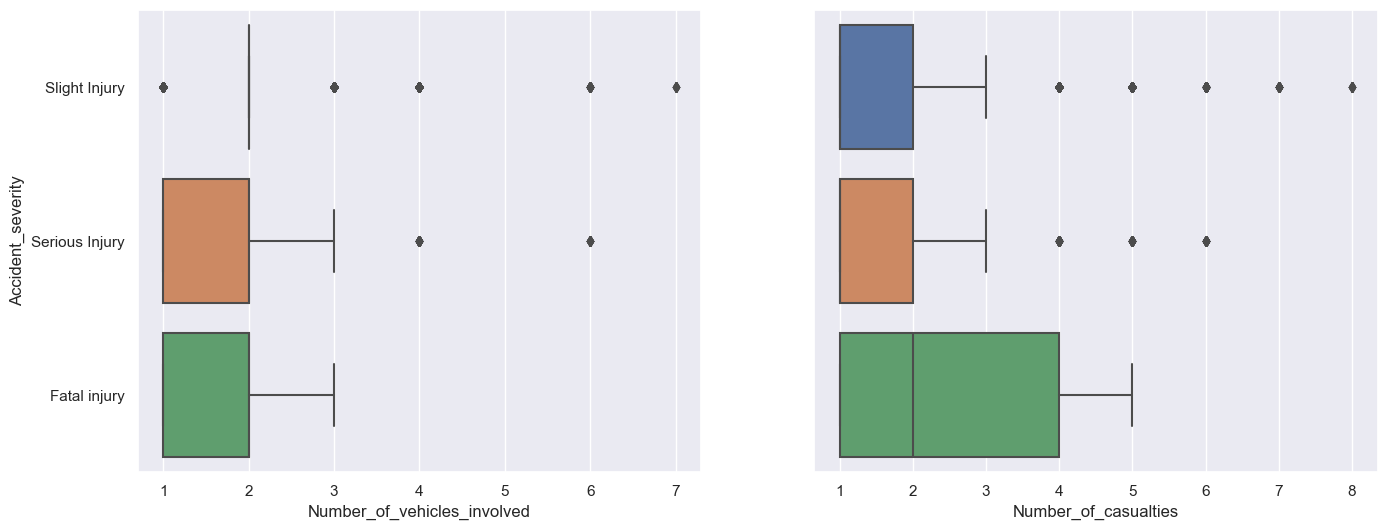

In [26]:
# Boxplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
sns.boxplot(data = data, x = 'Number_of_vehicles_involved', y = 'Accident_severity', ax = ax1)
sns.boxplot(data = data, x = 'Number_of_casualties', y = 'Accident_severity', ax = ax2).set(yticklabels = [])
ax2.set_ylabel('')
plt.show()

In [27]:
# Combining similar values
def combine_similar(data):
    data = data.replace('Unknown', 'unknown')
    data = data.replace('Other', 'other')
    data = data.replace('Unknown or other', 'other')
    data = data.replace('Darkness - lights unlit', 'Darkness - no lighting')
    data['Age_band_of_casualty'] = data['Age_band_of_casualty'].replace('5', 'Under 18')
    return data

In [28]:
data = combine_similar(data)

In [29]:
# Columns with missing values (sorted by count)
data.isna().sum()[data.isna().sum() != 0].sort_values(ascending = False)

Defect_of_vehicle          4427
Service_year_of_vehicle    3928
Work_of_casuality          3198
Fitness_of_casuality       2635
Type_of_vehicle             950
Types_of_Junction           887
Driving_experience          829
Educational_level           741
Vehicle_driver_relation     579
Owner_of_vehicle            482
Lanes_or_Medians            385
Vehicle_movement            308
Area_accident_occured       239
Road_surface_type           172
Type_of_collision           155
Road_allignment             142
dtype: int64

In [30]:
# Rows with missing values (sorted by count)
data.T.isna().sum()[data.T.isna().sum() != 0].sort_values(ascending = False)

2035     11
1191     11
1022     11
2204     10
174      10
         ..
5836      1
5809      1
5806      1
5804      1
12312     1
Length: 9427, dtype: int64

In [31]:
# Converting unknown/other/na to nan
def more_missing(data):
    data = data.replace('unknown', np.nan)
    data = data.replace('other', np.nan)
    data = data.replace('na', np.nan)
    return data

In [32]:
data = more_missing(data)

In [33]:
def mode_imputer(data):
    data_imputed = data.copy(deep = True)
    imputer = SimpleImputer(strategy = 'most_frequent')
    data_imputed.iloc[:,:] = imputer.fit_transform(data_imputed)
    return data_imputed

In [34]:
# Function to assign the missing values to the 'unknown' category
def unknown_imputer(data):
    data_unknown = data.copy(deep = True)
    data_unknown = data_unknown.replace(np.nan, 'Unknown')
    return data_unknown

In [35]:
def prop_imputer(data):
    data_prop = data.copy(deep = True)
    missing_cols = data_prop.isna().sum()[data_prop.isna().sum() != 0].index.tolist()
    for col in missing_cols:
        values_col = data_prop[col].value_counts(normalize = True).index.tolist()
        probabilities_col = data_prop[col].value_counts(normalize = True).values.tolist()
        data_prop[col] = data_prop[col].fillna(pd.Series(np.random.choice(values_col, p = probabilities_col, size = len(data))))
    return data_prop

In [36]:
data_imp = prop_imputer(data)

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


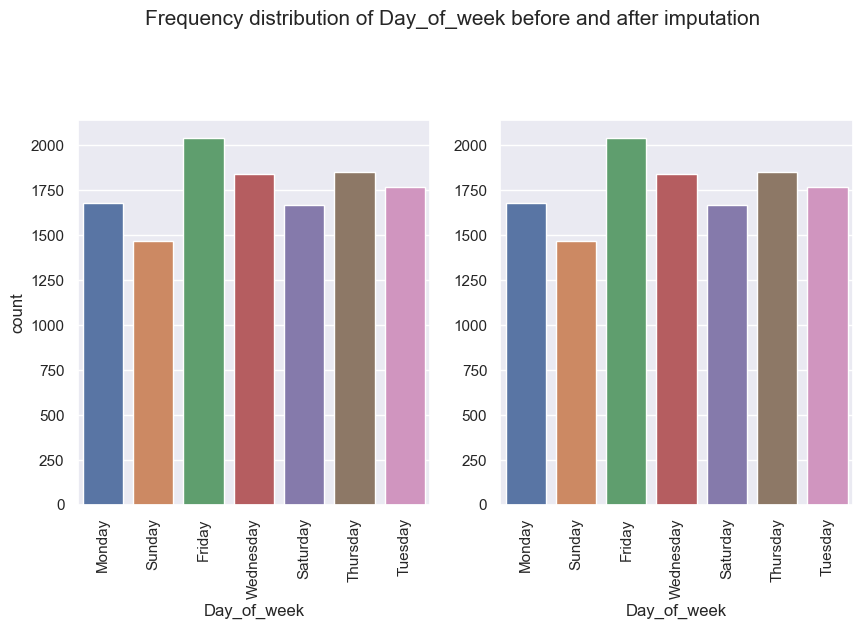

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


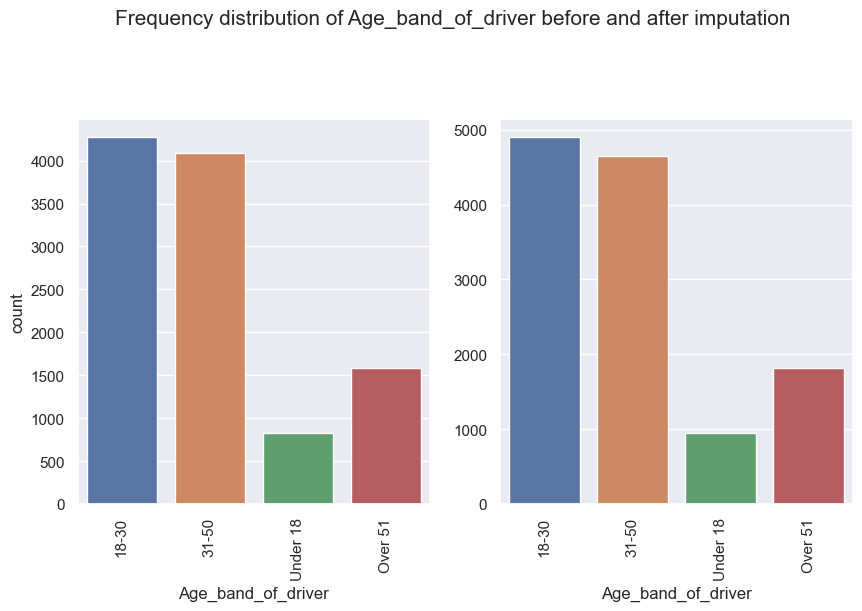

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


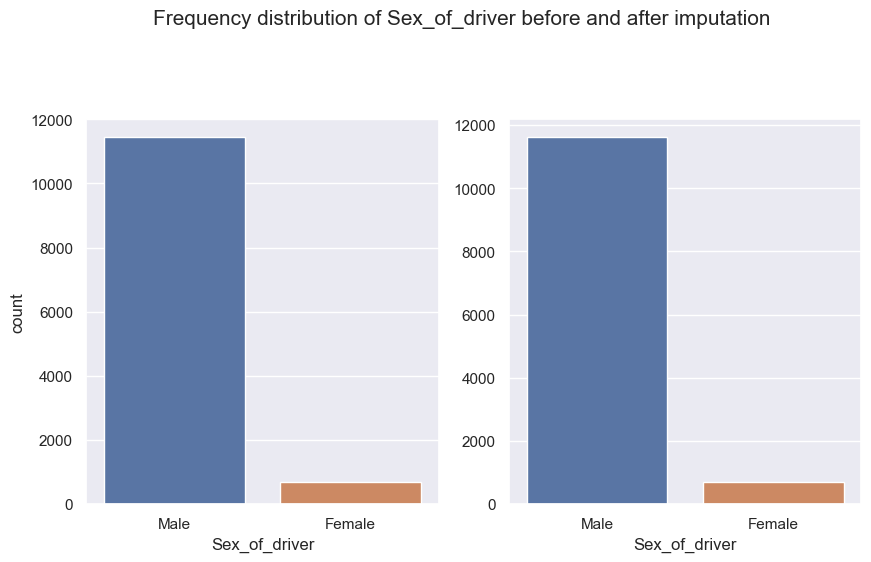

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


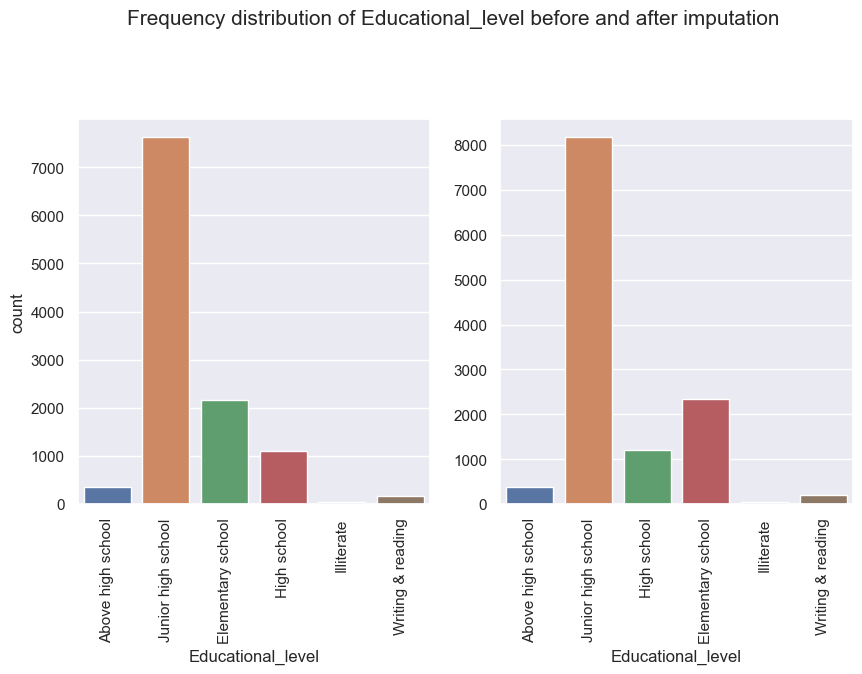

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


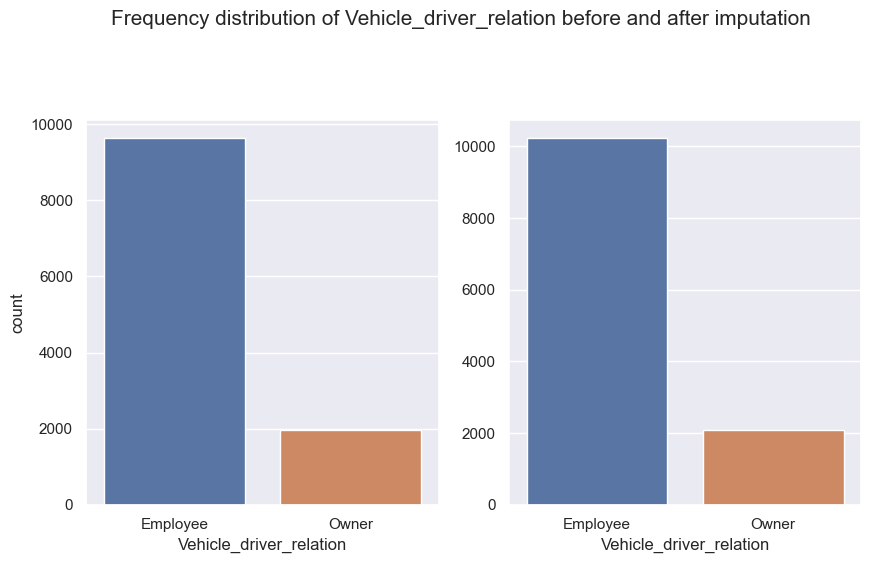

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


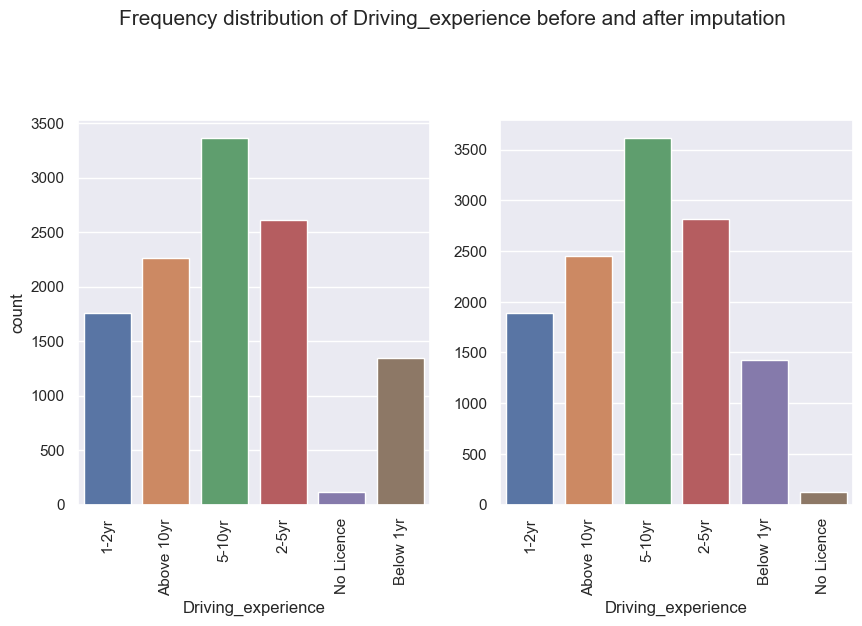

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


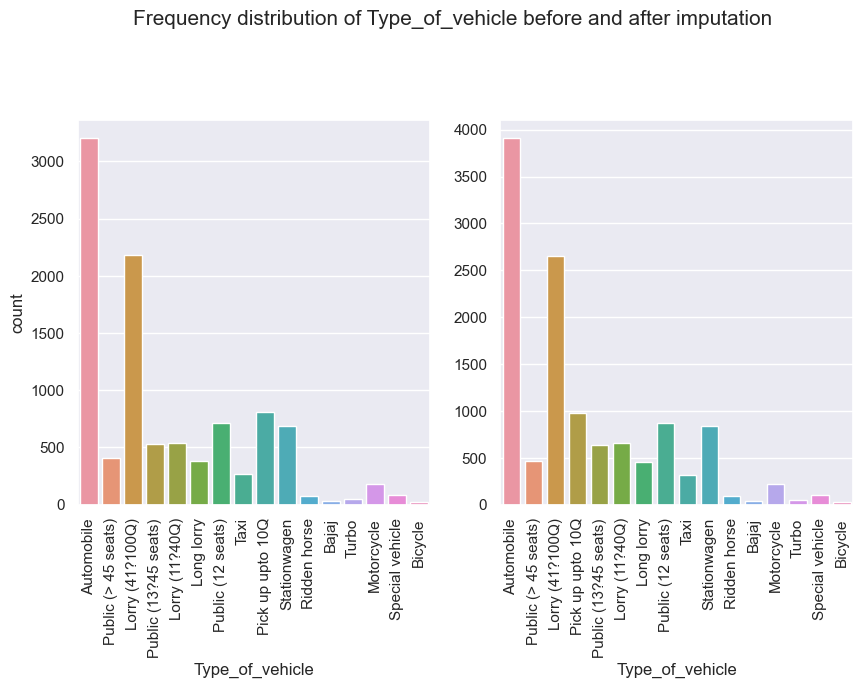

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


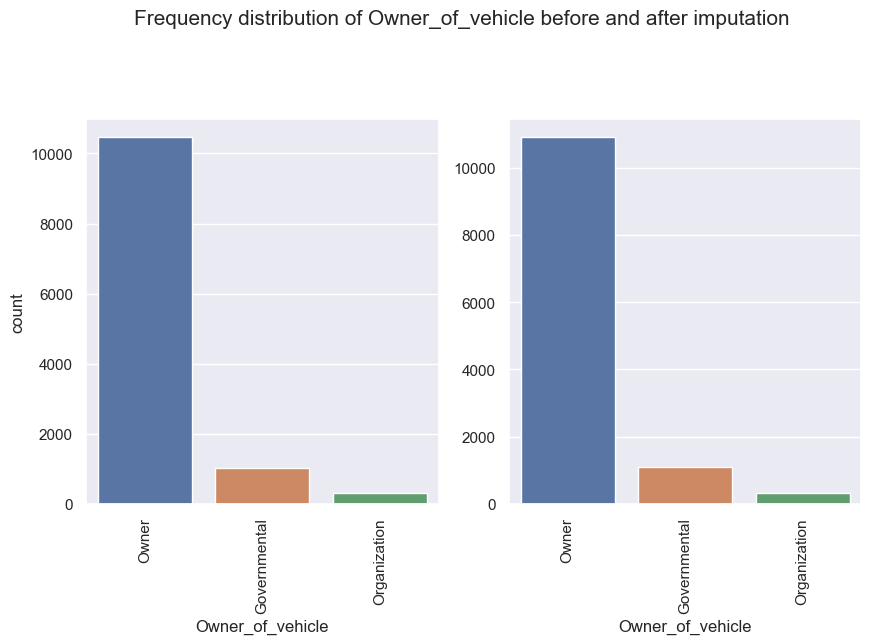

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


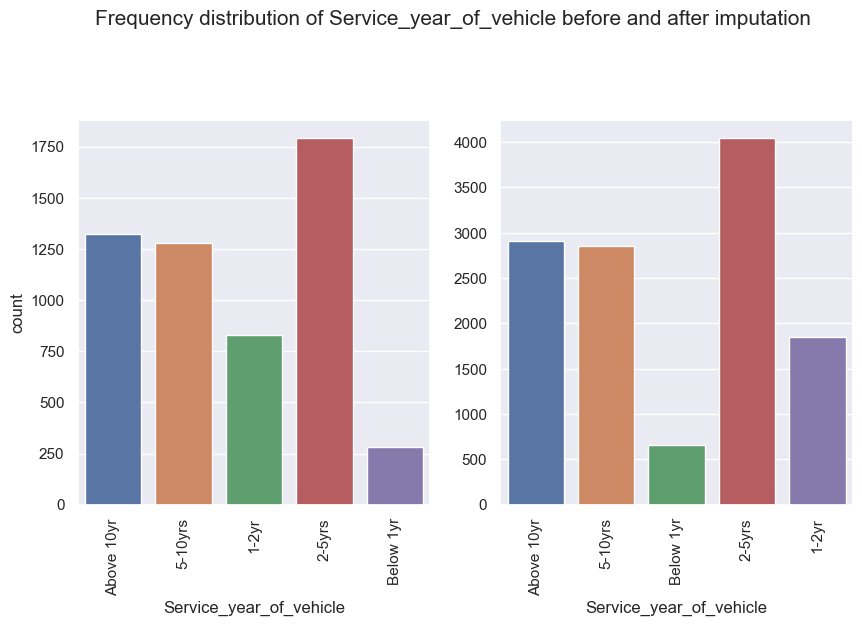

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


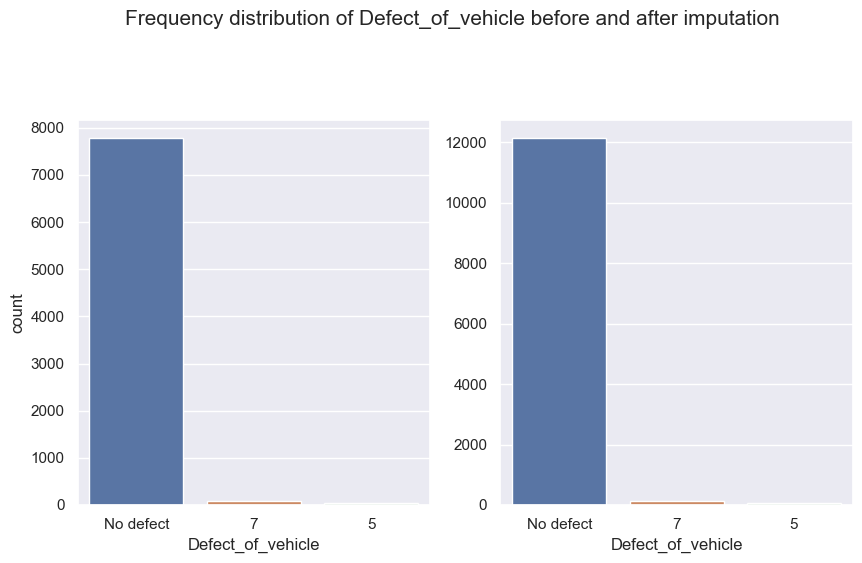

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


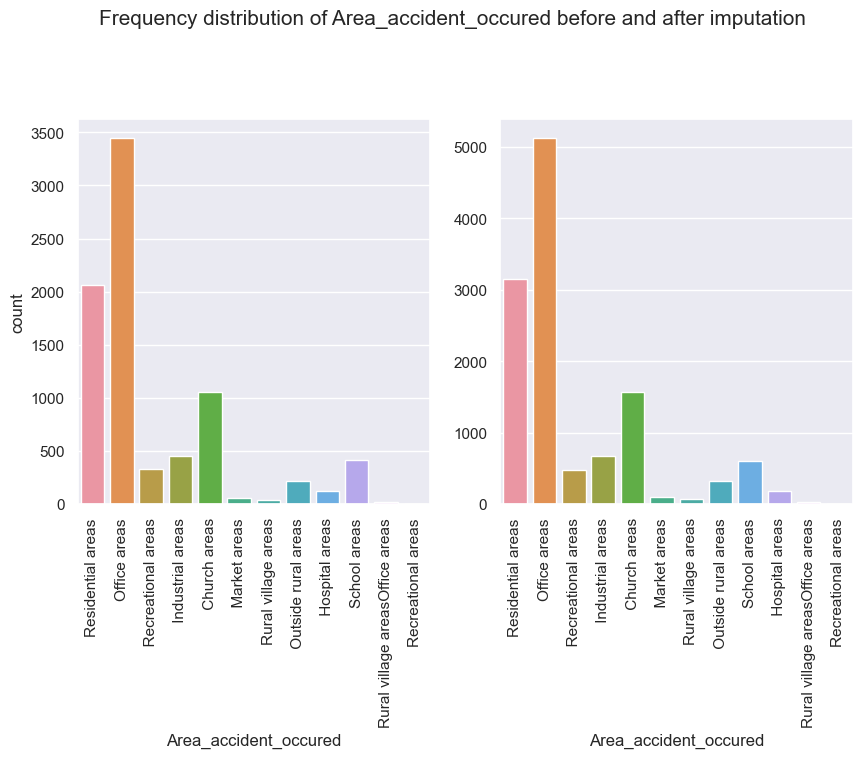

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


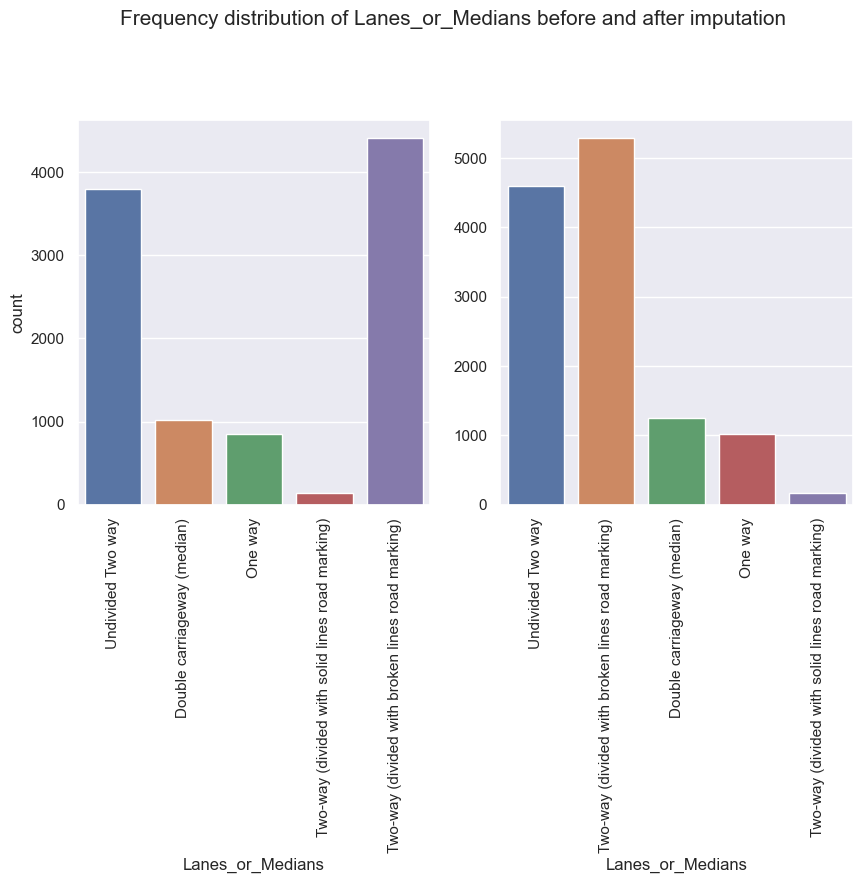

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


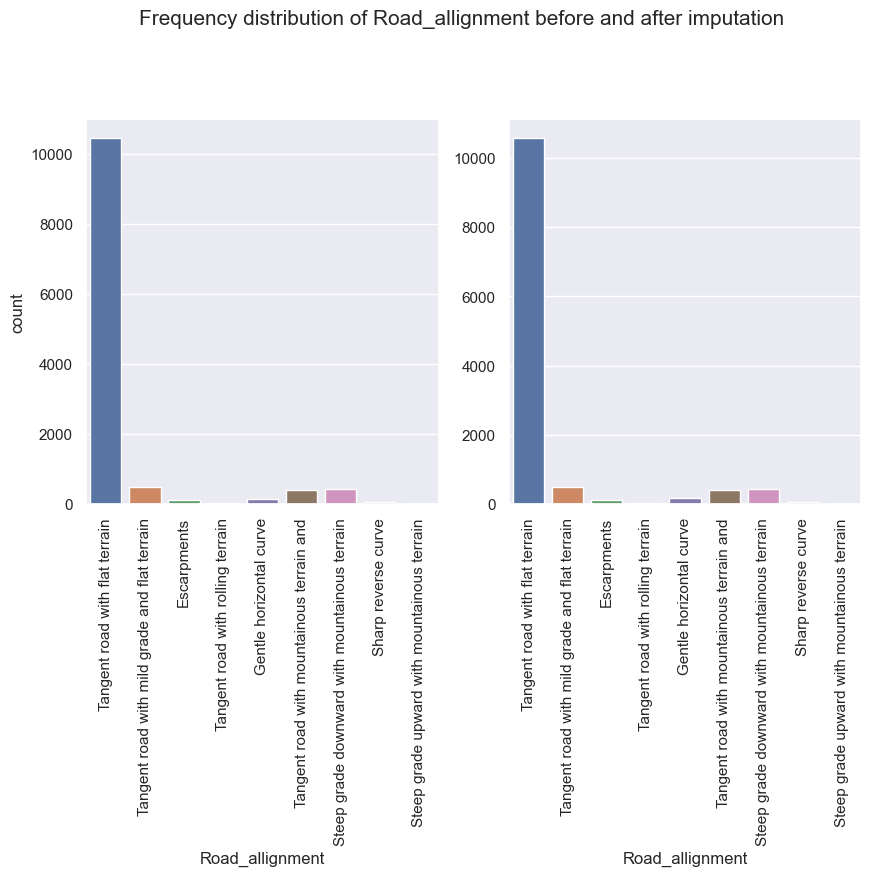

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


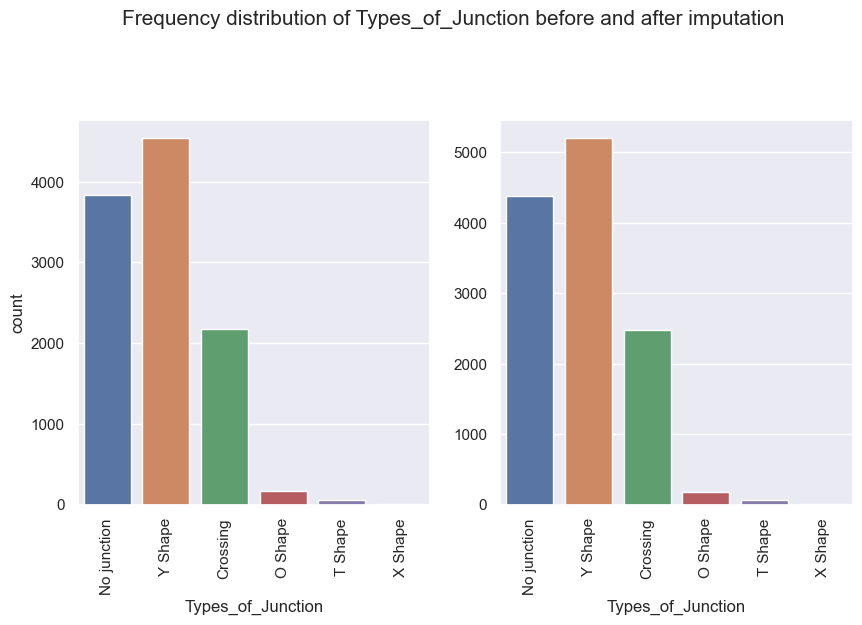

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


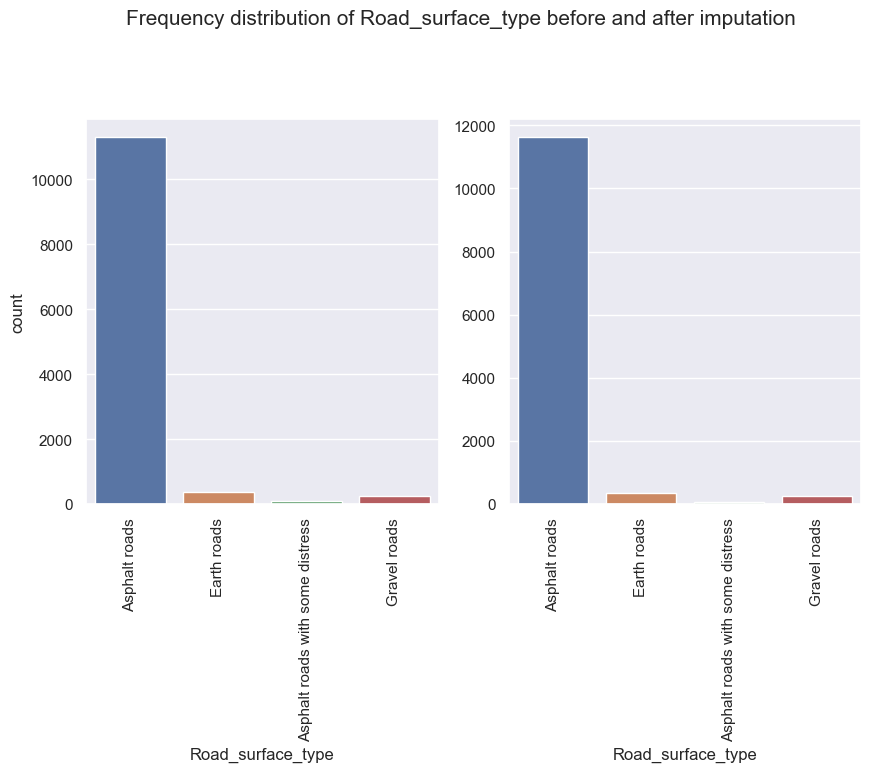

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


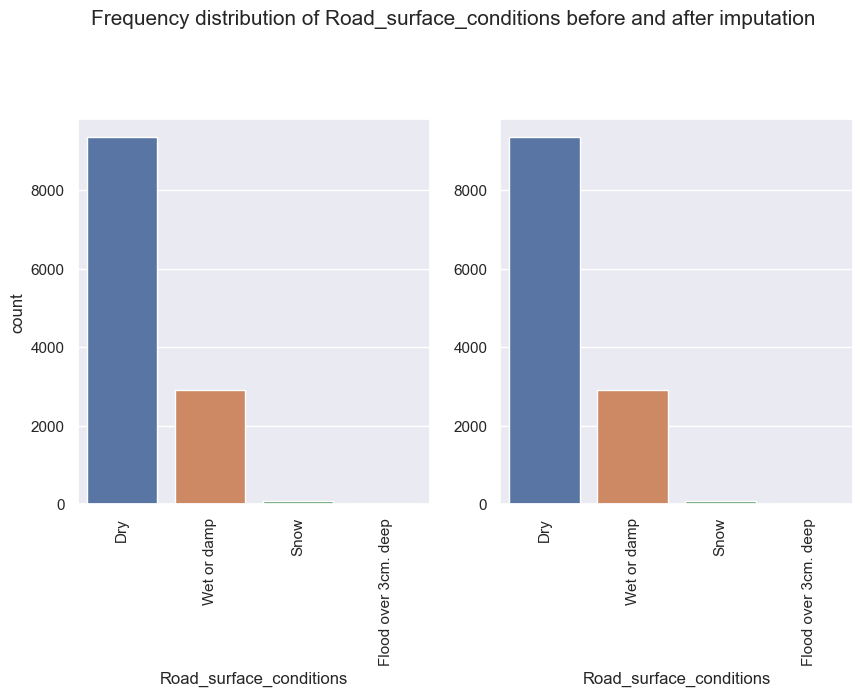

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


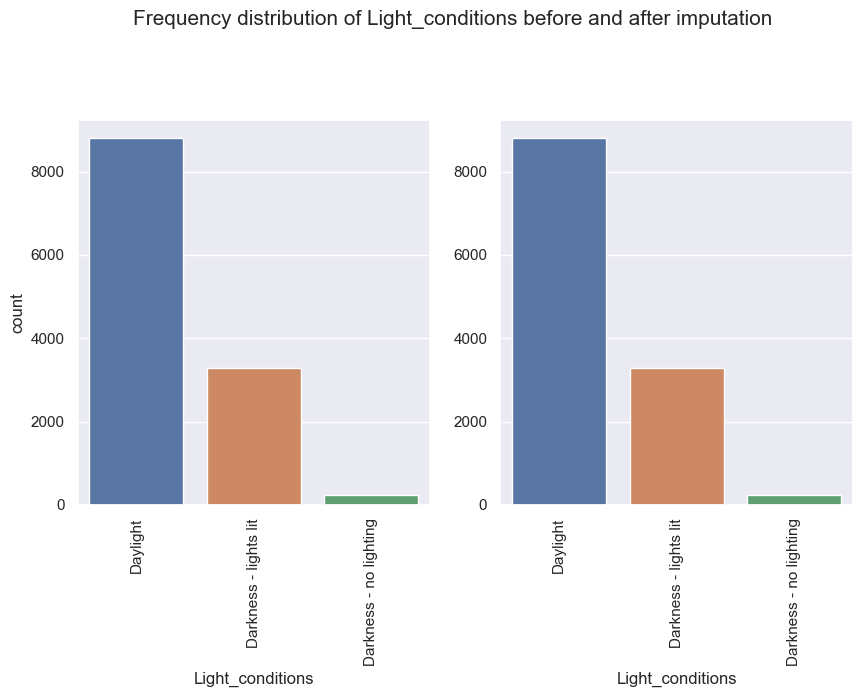

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


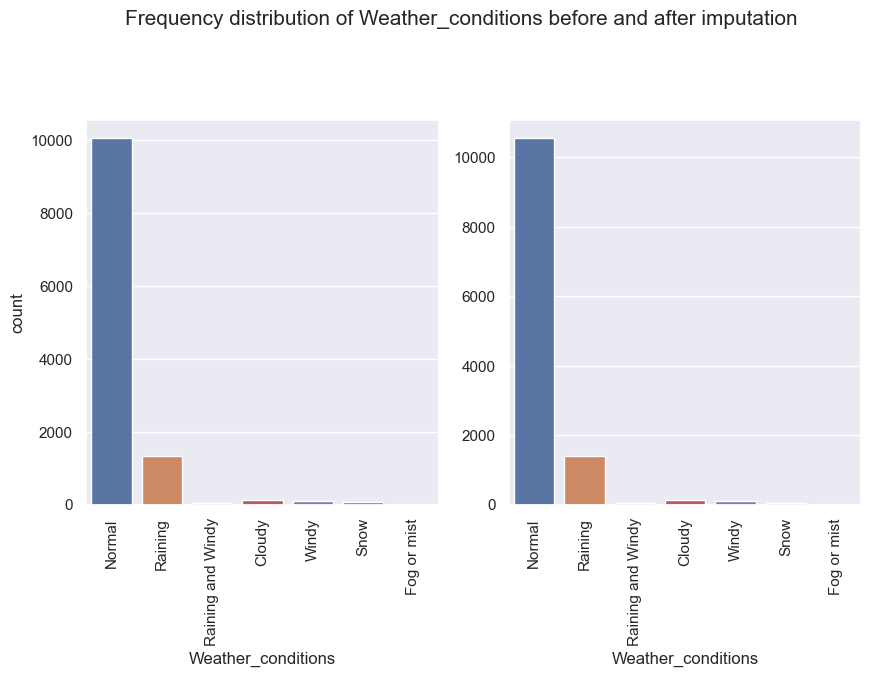

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


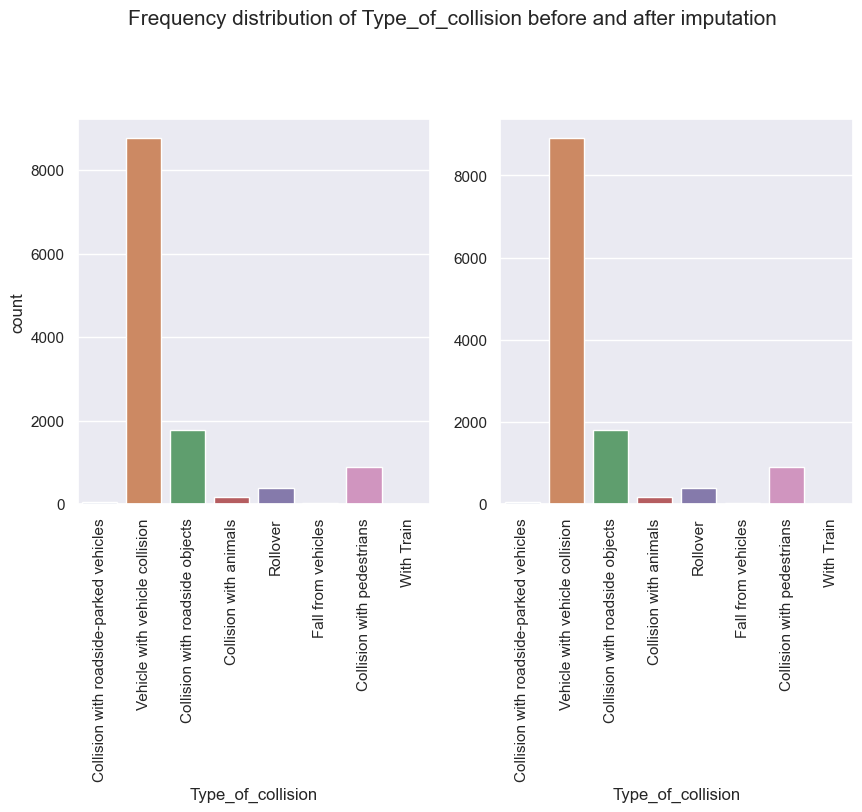

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


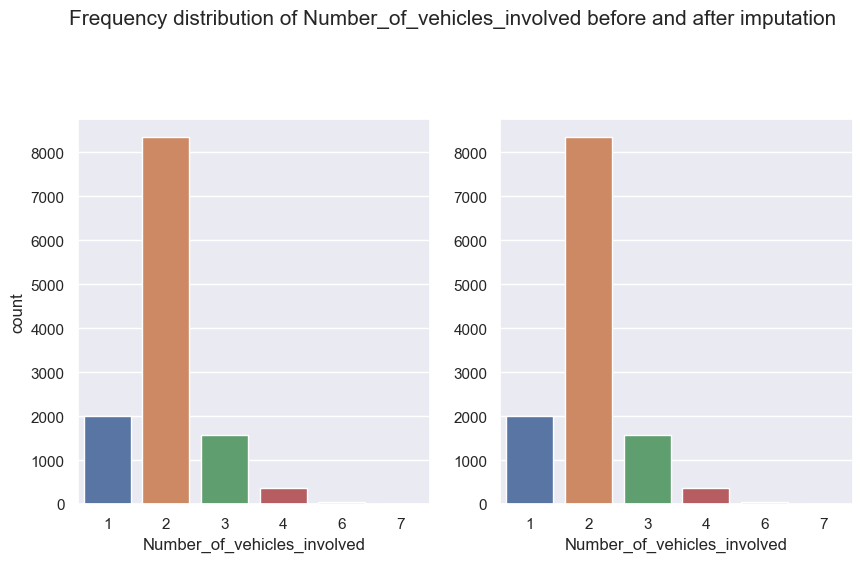

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


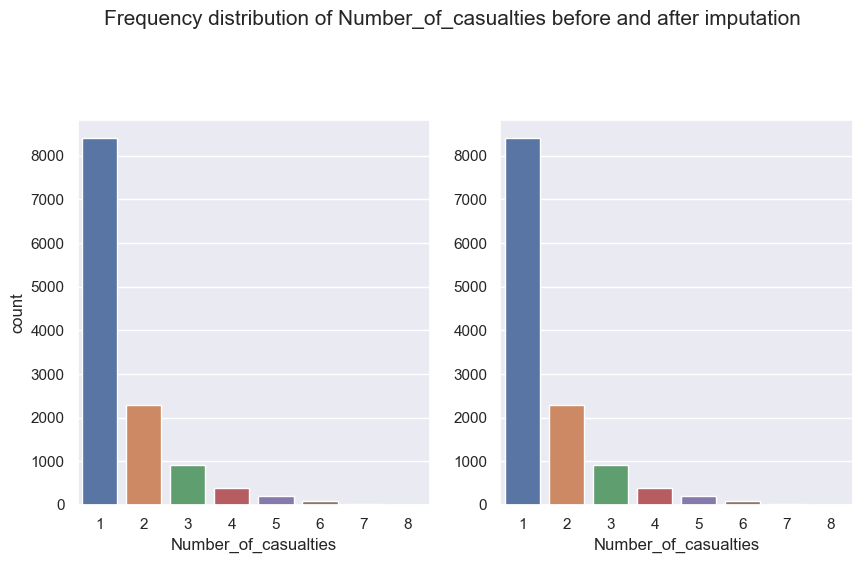

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


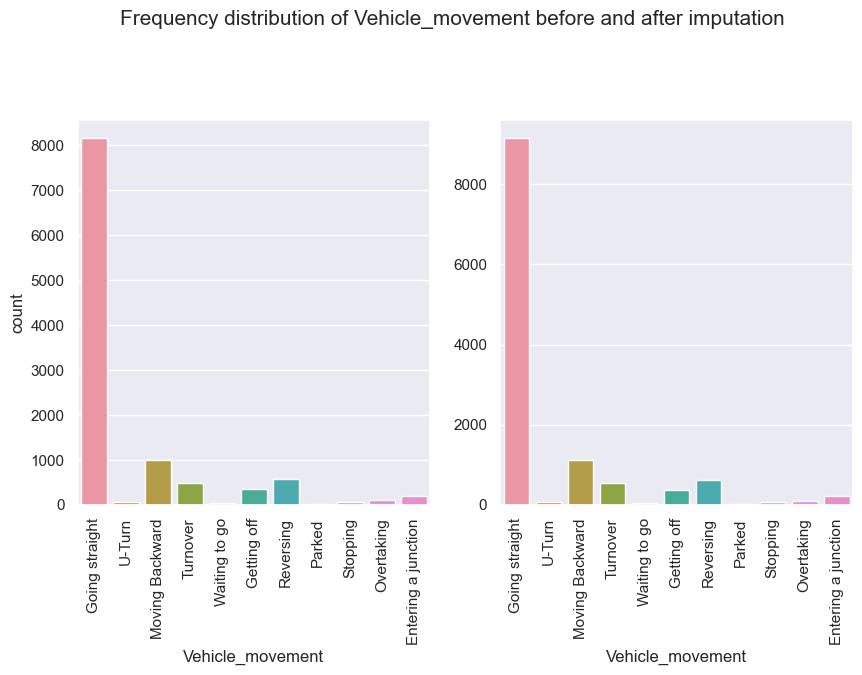

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


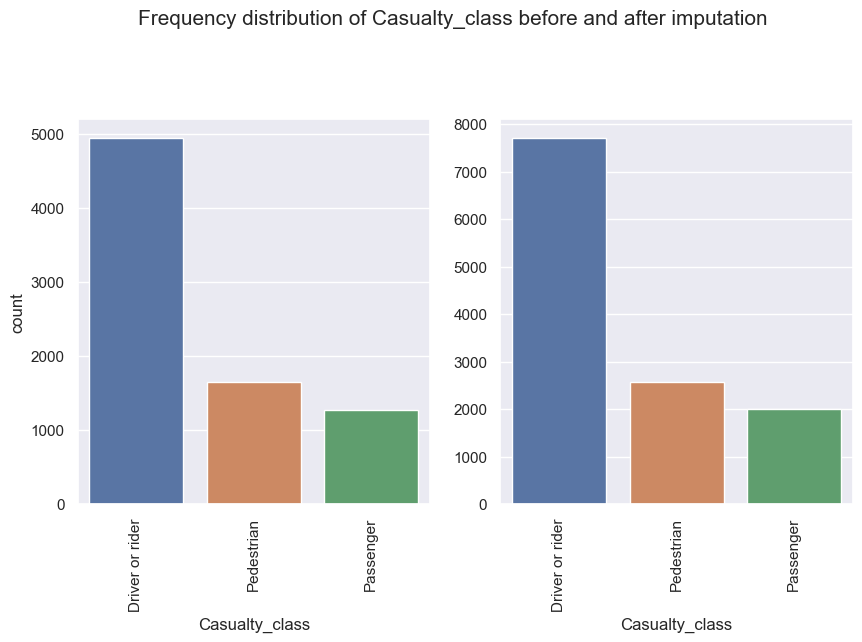

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


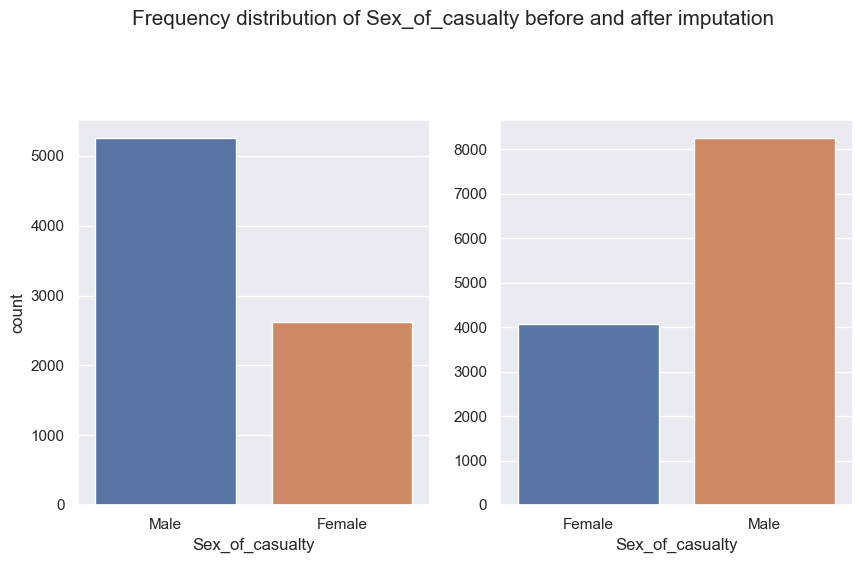

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


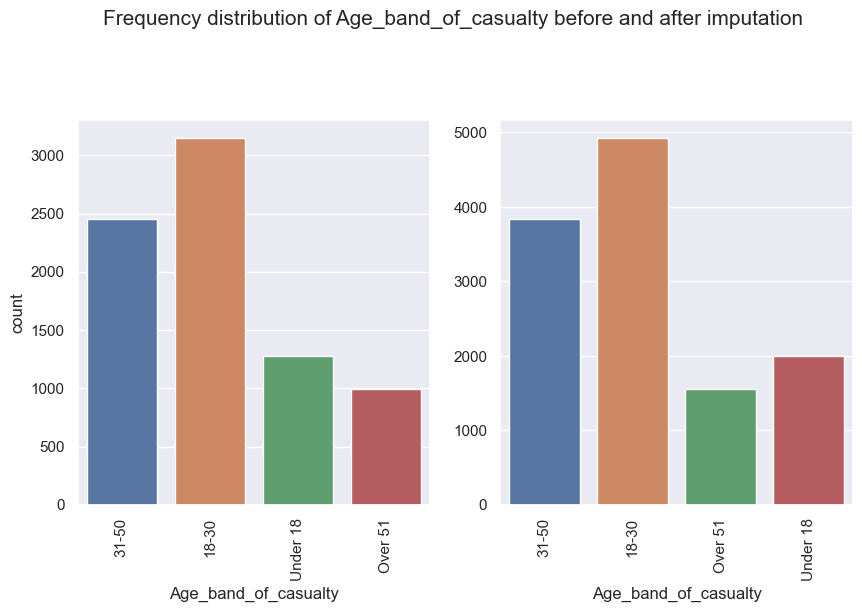

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


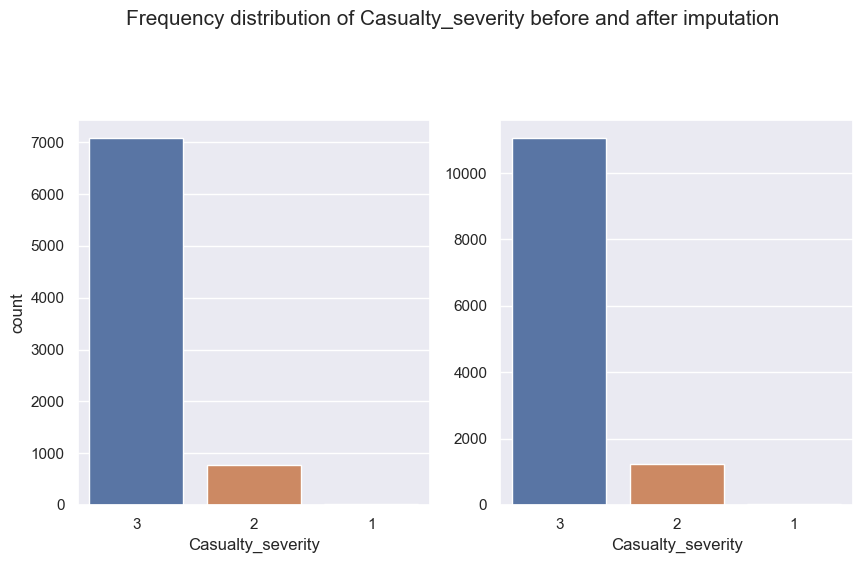

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


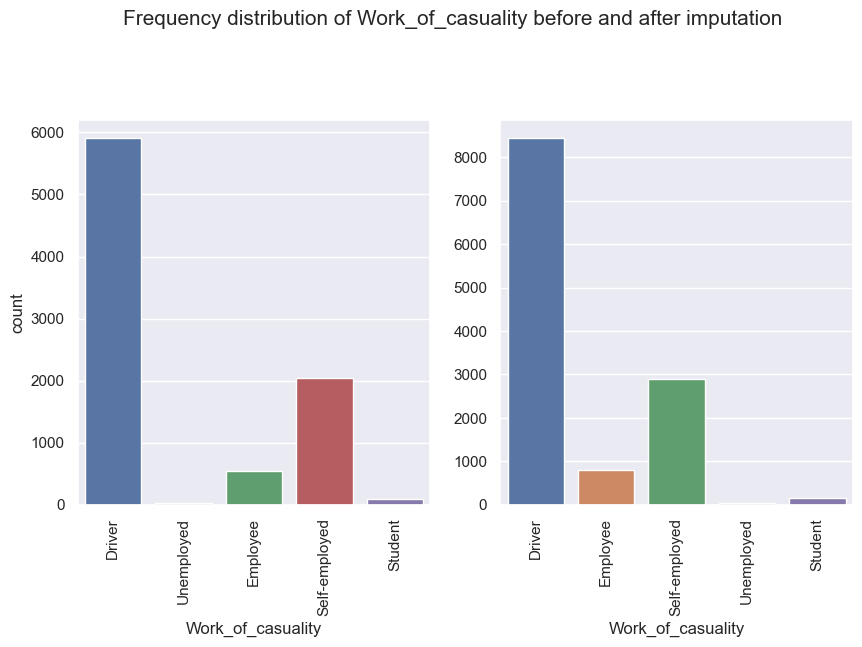

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


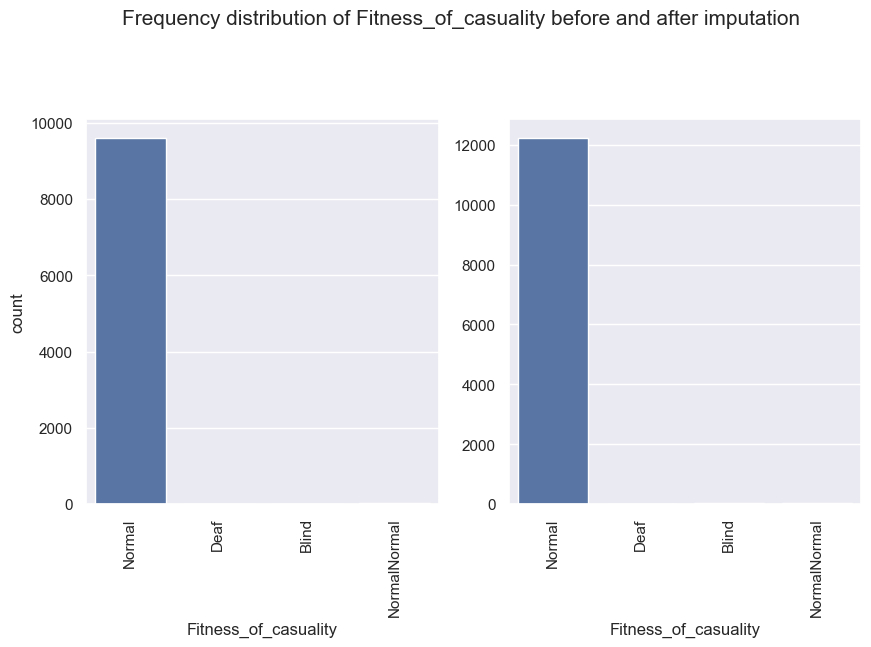

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


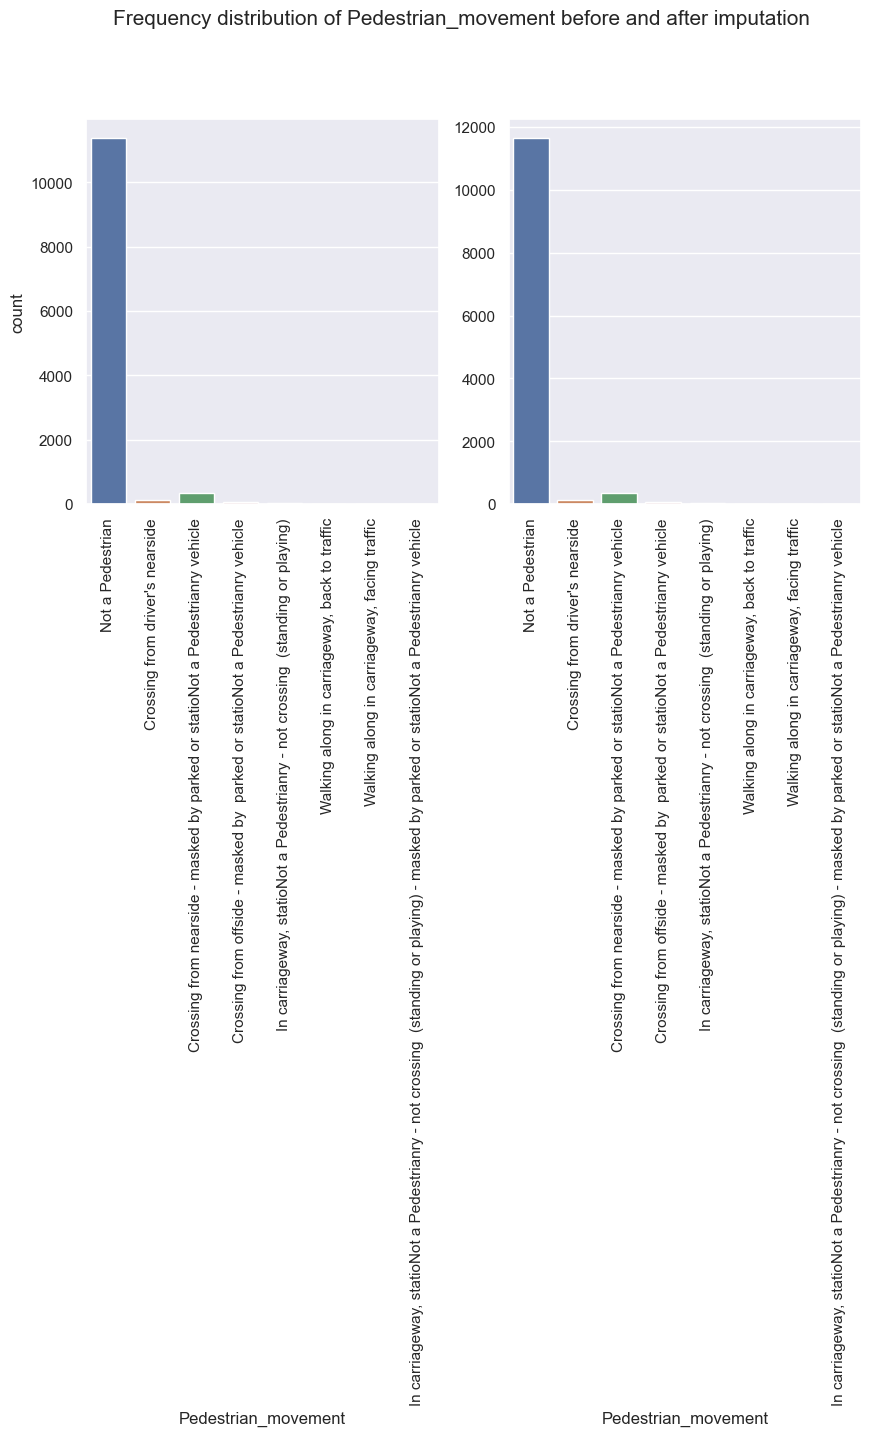

C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


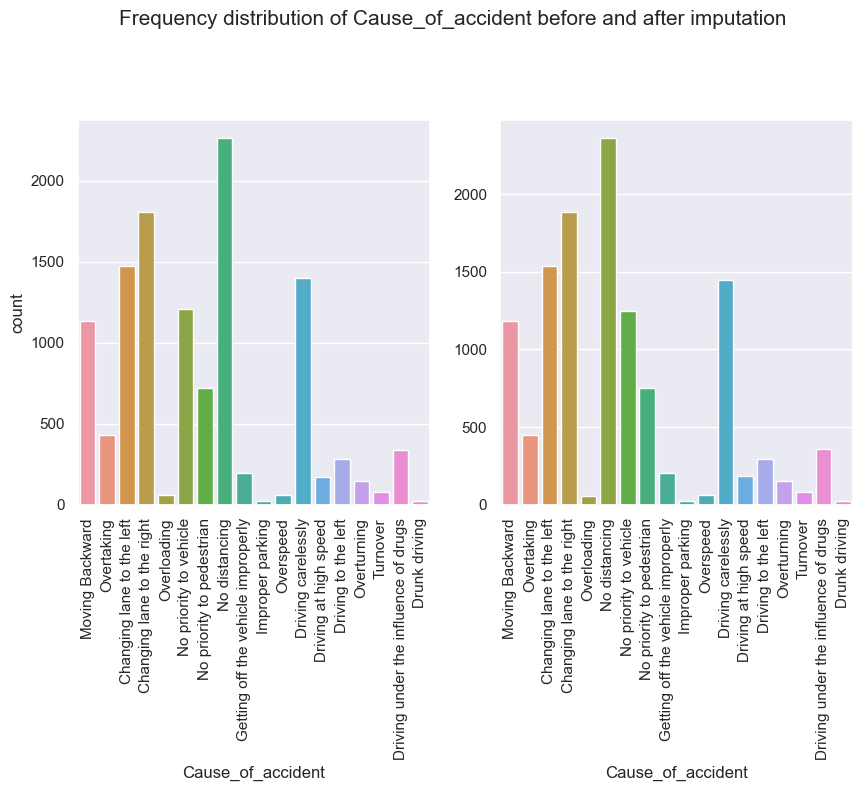

In [37]:
for feature in features_others:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    ax1 = sns.countplot(data[feature], ax = ax1)
    ax2 = sns.countplot(data_imp[feature], ax = ax2)
    ax2.set_ylabel('')
    if feature not in features_horiz:
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
    plt.suptitle("Frequency distribution of {} before and after imputation".format(feature), y = 1.1, fontsize = 15)
    plt.show()

In [38]:
data = data_imp
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0    Day      Monday              18-30          Male   Above high school   
1    Day      Monday              31-50          Male  Junior high school   
2    Day      Monday              18-30          Male  Junior high school   
3  Night      Sunday              18-30          Male  Junior high school   
4  Night      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr     Pick up upto 10Q   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                 5-10yrs  ...   Going straight   
3     Governmental               Below 1yr  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0  Driver or rider          Female                31-50                 3   
1  Driver or rider          Female                18-30                 3   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4  Driver or rider          Female              Over 51                 3   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4          Employee               Normal    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [39]:
data.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [40]:
numerical_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']
ordinal_cols = ['Time','Age_band_of_driver', 'Educational_level', 'Driving_experience', 'Service_year_of_vehicle', 'Light_conditions', 'Age_band_of_casualty', 'Casualty_severity', 'Accident_severity']
nominal_cols = [x for x in data.columns if x not in numerical_cols + ordinal_cols]

In [41]:
# Dict for saving model and encoder 
saved_dict = {}

def label_encoder(data, cols):
    data_le = data.copy(deep = True)
    for col in cols:
        print(f'Encoding {col}')
        le = LabelEncoder()    
        data_le[col] = le.fit_transform(data_le[col])
        saved_dict[f'le_{col}'] = le
    return data_le

In [42]:
# Creating the mappings
Time_dict = {'Day': 0, 'Night': 1}
Age_band_of_driver_dict = {'Under 18' : 1, '18-30' : 2, '31-50' : 3, 'Over 51' : 4, 'unknown' : 10, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 10 : 10}
Educational_level_dict = {'Illiterate' : 1, 'Writing & reading' : 2, 'Elementary school' : 3, 'Junior high school' : 4, 'High school' : 5, 'Above high school' : 6, 'unknown' : 10, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5, 6 : 6, 10 : 10}
Driving_experience_dict = {'Below 1yr' : 1, '1-2yr' : 2, '2-5yr' : 3, '5-10yr' : 4, 'Above 10yr' : 5, 'No Licence' : 0, 'unknown' : 10, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5, 8 : 8, 10 : 10}
Service_year_of_vehicle_dict = {'Below 1yr' : 1, '1-2yr' : 2, '2-5yrs' : 3, '5-10yrs' : 4, 'Above 10yr' : 5, 'unknown' : 10, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5, 10 : 10}
Light_conditions_dict = {'Darkness - no lighting' : 1, 'Darkness - lights lit' : 2, 'Daylight' : 3, 1 : 1, 2 : 2, 3 : 3}
Age_band_of_casualty_dict = {'Under 18' : 1, '18-30' : 2, '31-50' : 3, 'Over 51' : 4, 'na' : 10, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 10 : 10}
Casualty_severity_dict = {'1' : 1, '2' : 2, '3' : 3, 'na' : 10, 1 : 1, 2 : 2, 3 : 3, 10 : 10}
Accident_severity_dict = {'Slight Injury' : 1, 'Serious Injury' : 2, 'Fatal injury' : 3, 1 : 1, 2 : 2, 3 : 3}

In [43]:
manual_encoder_dict = {'Time': Time_dict,
                       'Age_band_of_driver' : Age_band_of_driver_dict,
                       'Educational_level' : Educational_level_dict,
                       'Driving_experience' : Driving_experience_dict,
                       'Service_year_of_vehicle' : Service_year_of_vehicle_dict,
                       'Light_conditions' : Light_conditions_dict,
                       'Age_band_of_casualty' : Age_band_of_casualty_dict,
                       'Casualty_severity' : Casualty_severity_dict,
                       'Accident_severity' : Accident_severity_dict
                      }

In [44]:
def manual_encoder(data, ordinal_cols, manual_encoder_dict):
    data_me = data.copy(deep = True)
    for feature in data.columns:
        if feature in ordinal_cols:
            if feature != 'Accident_severity':
                data_me[feature] = data_me[feature].map(manual_encoder_dict[feature])
    return data_me

In [45]:
# Manual + Label encoding
data = manual_encoder(data, ordinal_cols, manual_encoder_dict)
data = label_encoder(data, nominal_cols)
data.head()

Encoding Day_of_week
Encoding Sex_of_driver
Encoding Vehicle_driver_relation
Encoding Type_of_vehicle
Encoding Owner_of_vehicle
Encoding Defect_of_vehicle
Encoding Area_accident_occured
Encoding Lanes_or_Medians
Encoding Road_allignment
Encoding Types_of_Junction
Encoding Road_surface_type
Encoding Road_surface_conditions
Encoding Weather_conditions
Encoding Type_of_collision
Encoding Vehicle_movement
Encoding Casualty_class
Encoding Sex_of_casualty
Encoding Work_of_casuality
Encoding Fitness_of_casuality
Encoding Pedestrian_movement
Encoding Cause_of_accident


Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0     0            1                   2              1                  6   
1     0            1                   3              1                  4   
2     0            1                   2              1                  4   
3     1            3                   2              1                  4   
4     1            3                   2              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   2                0   
1                        0                   5               10   
2                        0                   2                5   
3                        0                   4               10   
4                        0                   3                7   

   Owner_of_vehicle  Service_year_of_vehicle  ...  Vehicle_movement  \
0                 2                        5  ...                 2   
1                 2                        4  ...                 2   
2                 2                        4  ...                 2   
3                 0                        1  ...                 2   
4                 2                        4  ...                 2   

   Casualty_class  Sex_of_casualty  Age_band_of_casualty  Casualty_severity  \
0               0                0                     3                  3   
1               0                0                     2                  3   
2               0                1                     3                  3   
3               2                0                     2                  3   
4               0                0                     4                  3   

   Work_of_casuality  Fitness_of_casuality  Pedestrian_movement  \
0                  0                     2                    5   
1                  0                     2                    5   
2                  0                     2                    5   
3                  0                     2                    5   
4                  1                     2                    5   

   Cause_of_accident  Accident_severity  
0                  9      Slight Injury  
1                 15      Slight Injury  
2                  0     Serious Injury  
3                  1      Slight Injury  
4                 15      Slight Injury  

[5 rows x 32 columns]

<Figure size 1000x500 with 0 Axes>

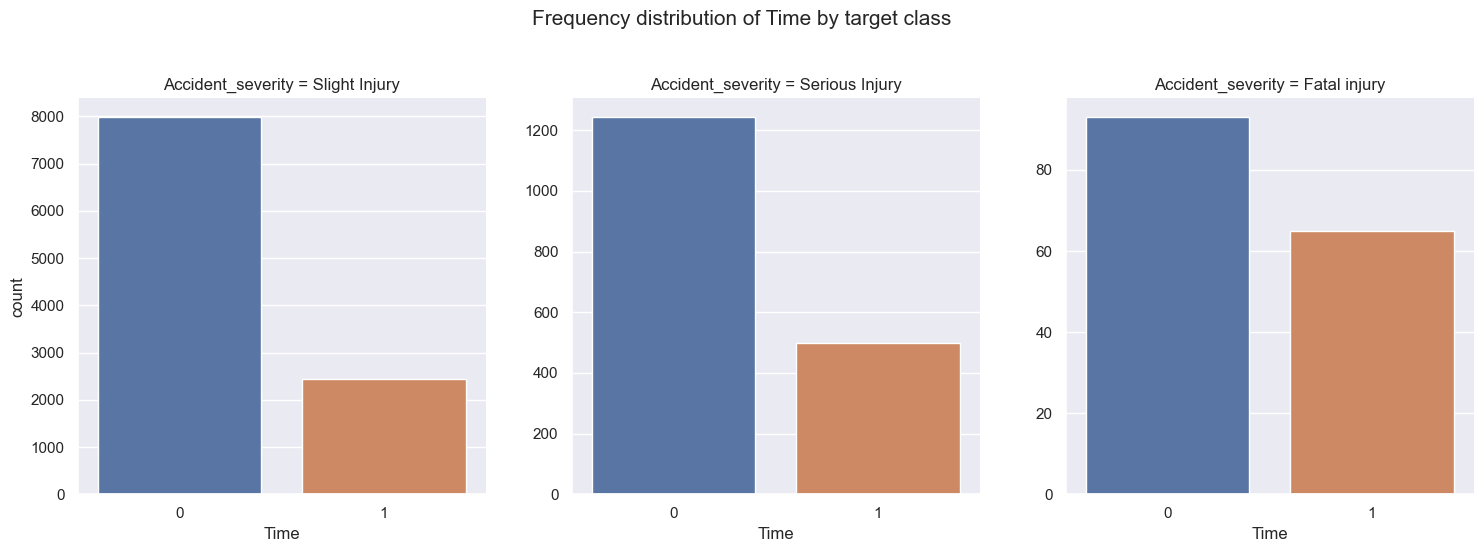

<Figure size 1000x500 with 0 Axes>

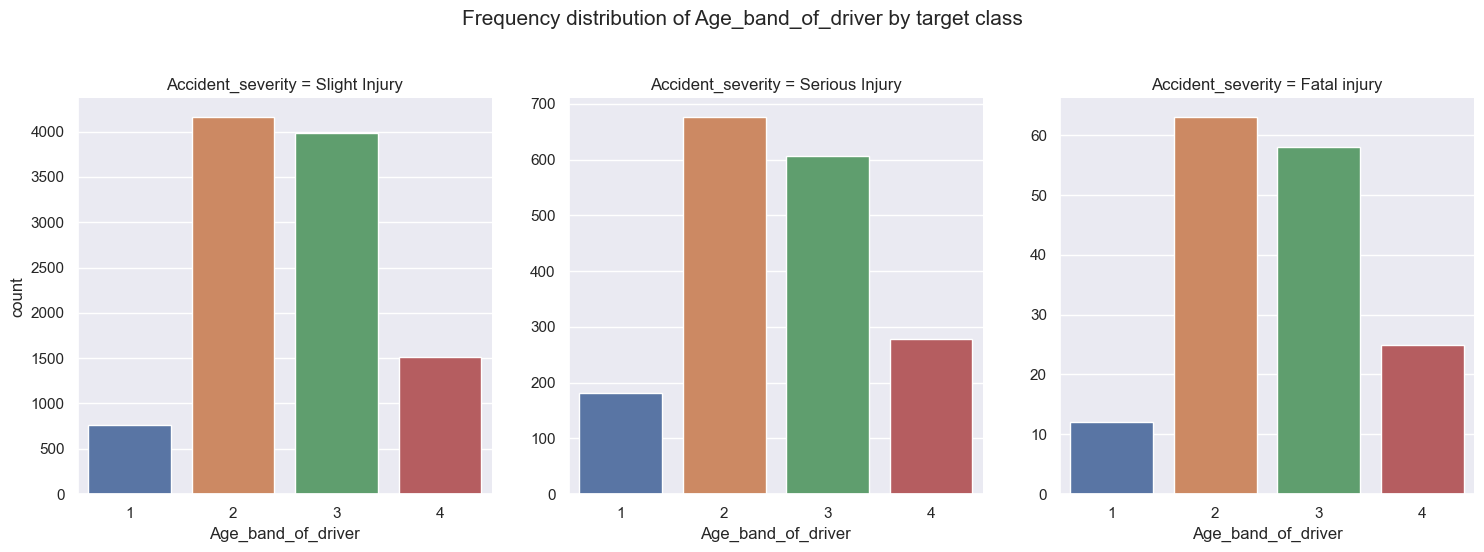

<Figure size 1000x500 with 0 Axes>

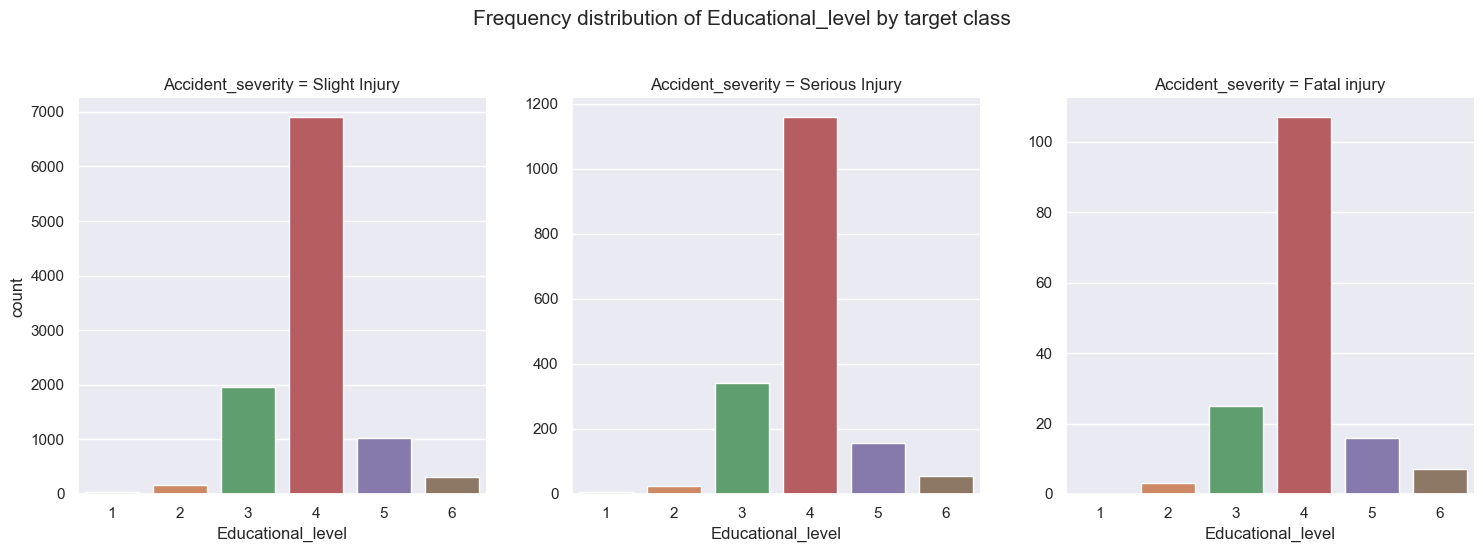

<Figure size 1000x500 with 0 Axes>

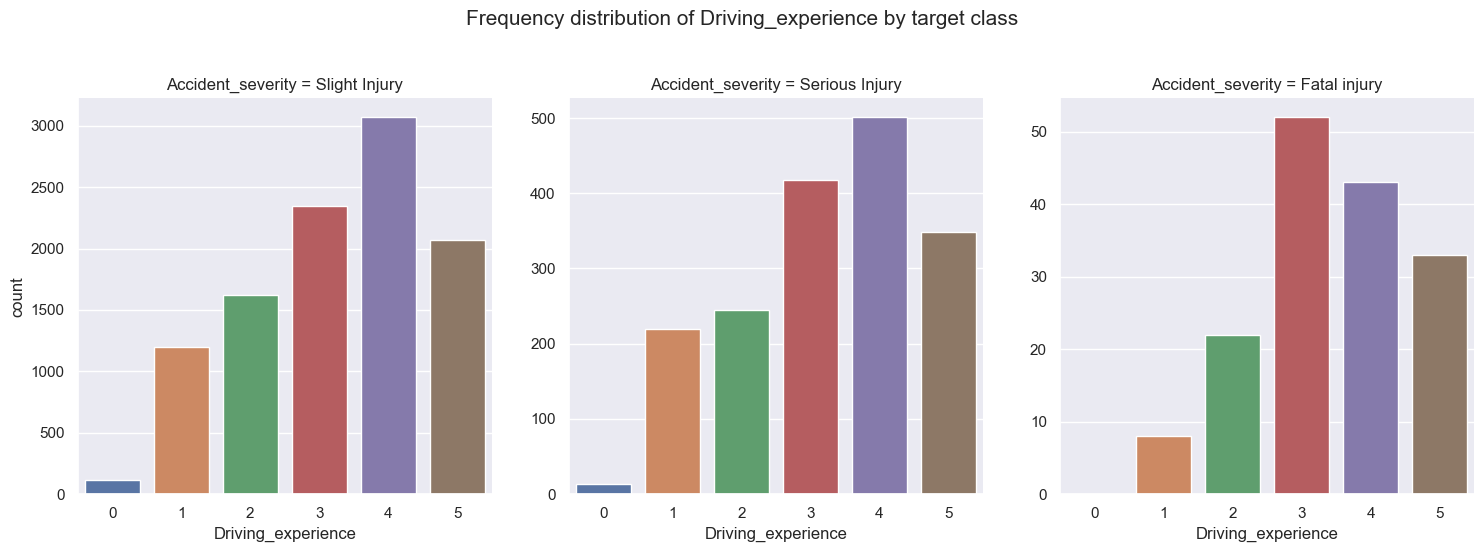

<Figure size 1000x500 with 0 Axes>

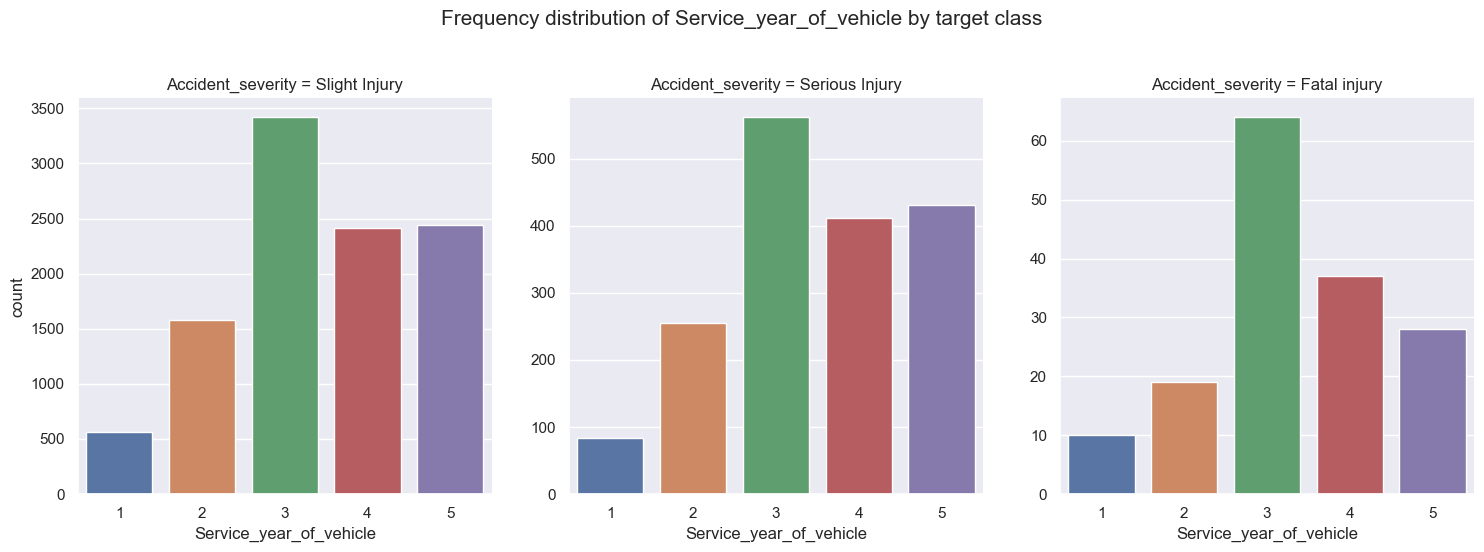

<Figure size 1000x500 with 0 Axes>

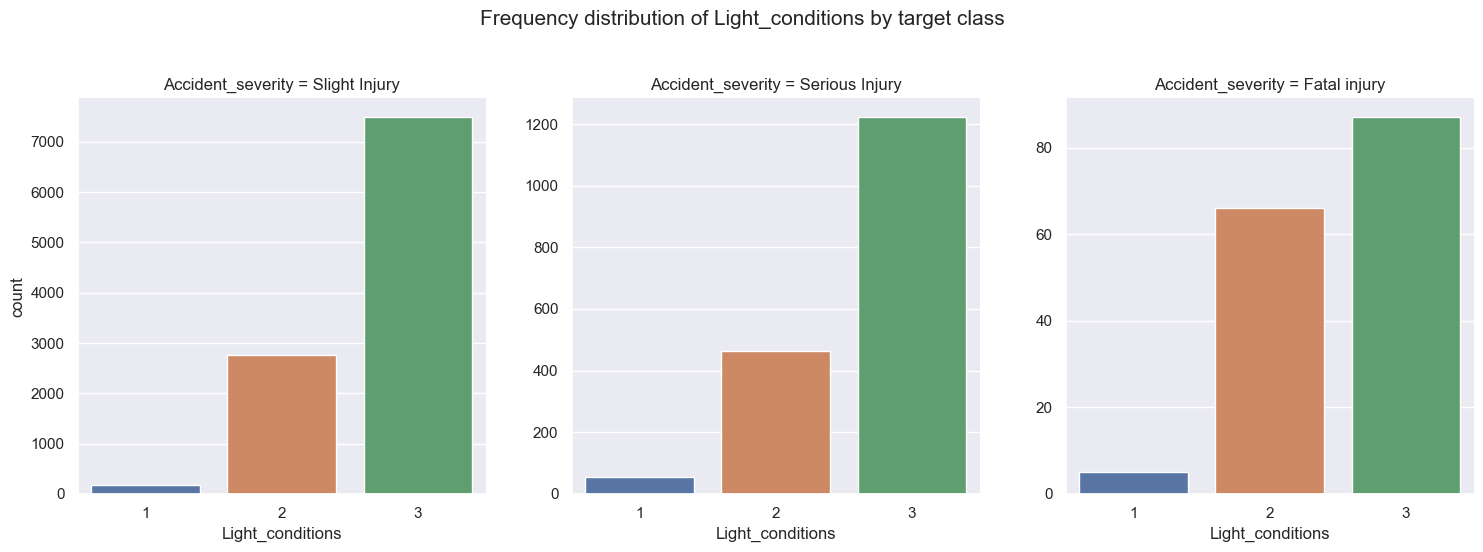

<Figure size 1000x500 with 0 Axes>

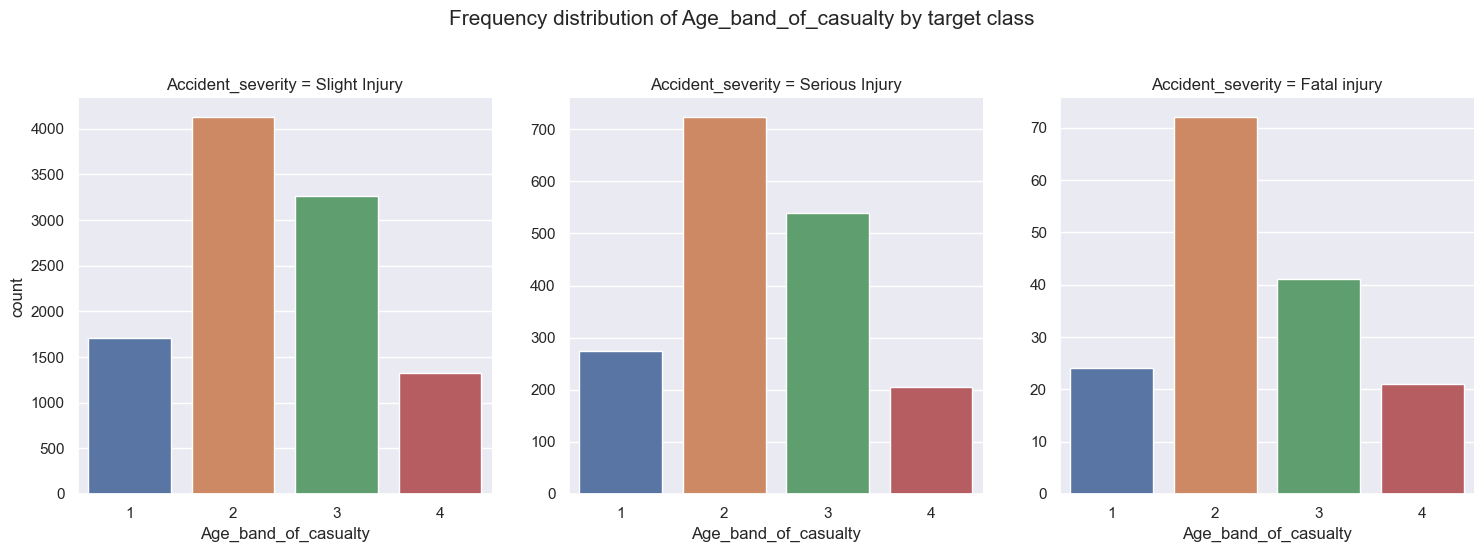

<Figure size 1000x500 with 0 Axes>

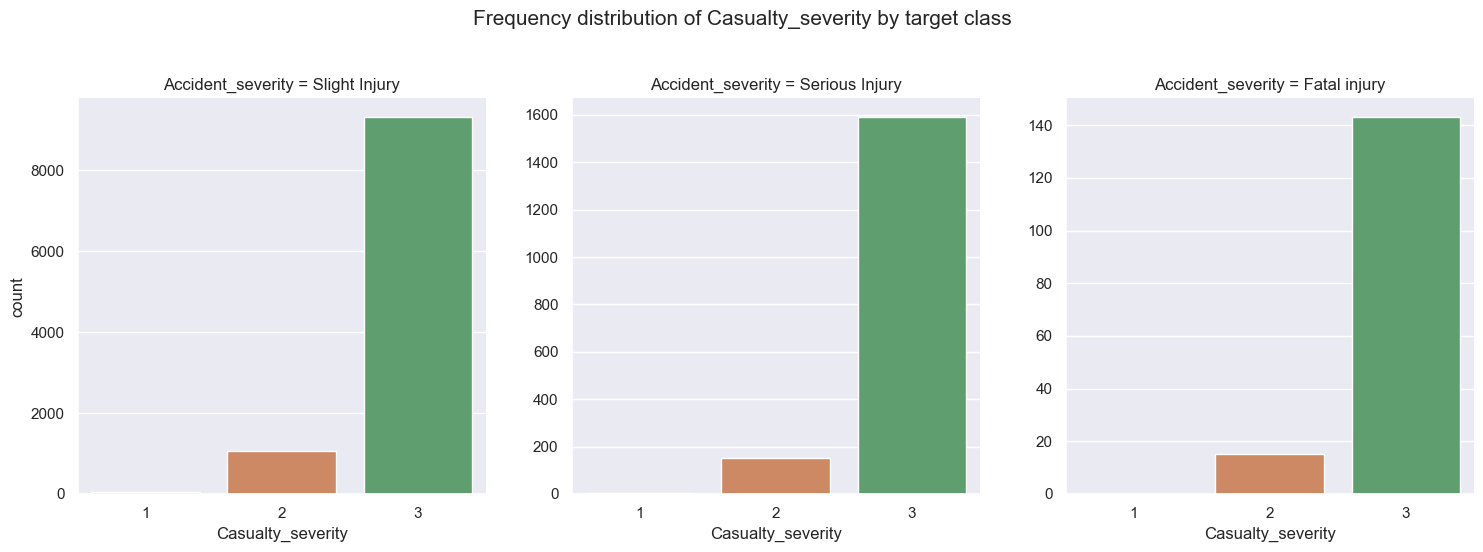

<Figure size 1000x500 with 0 Axes>

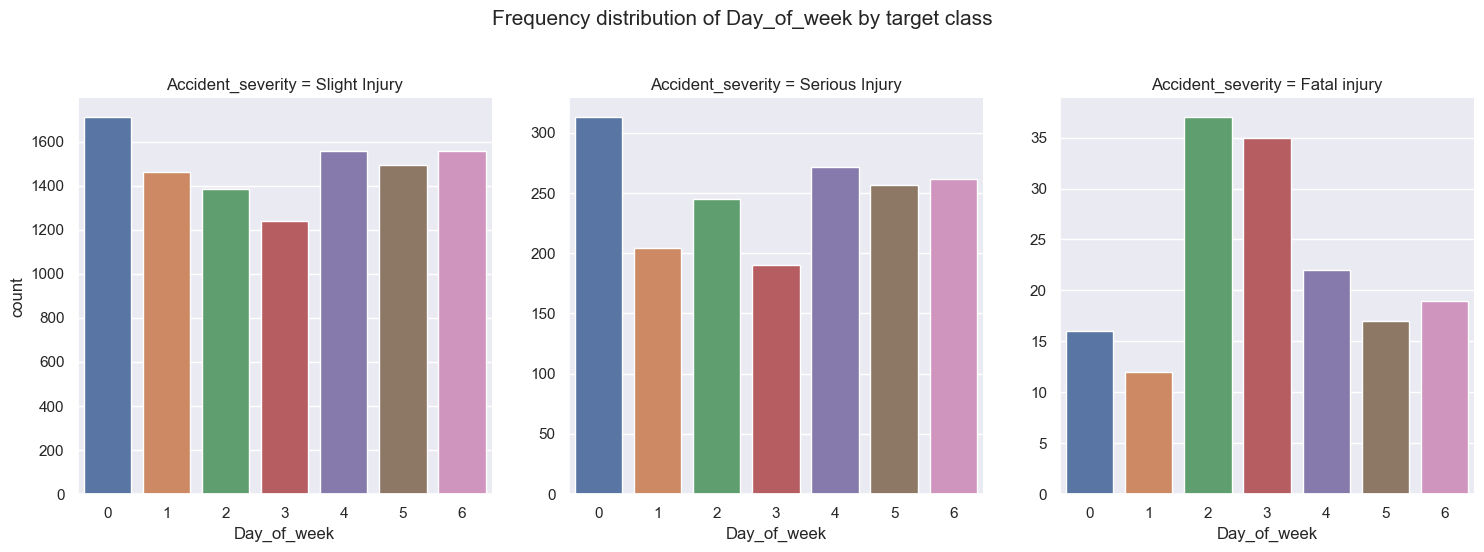

<Figure size 1000x500 with 0 Axes>

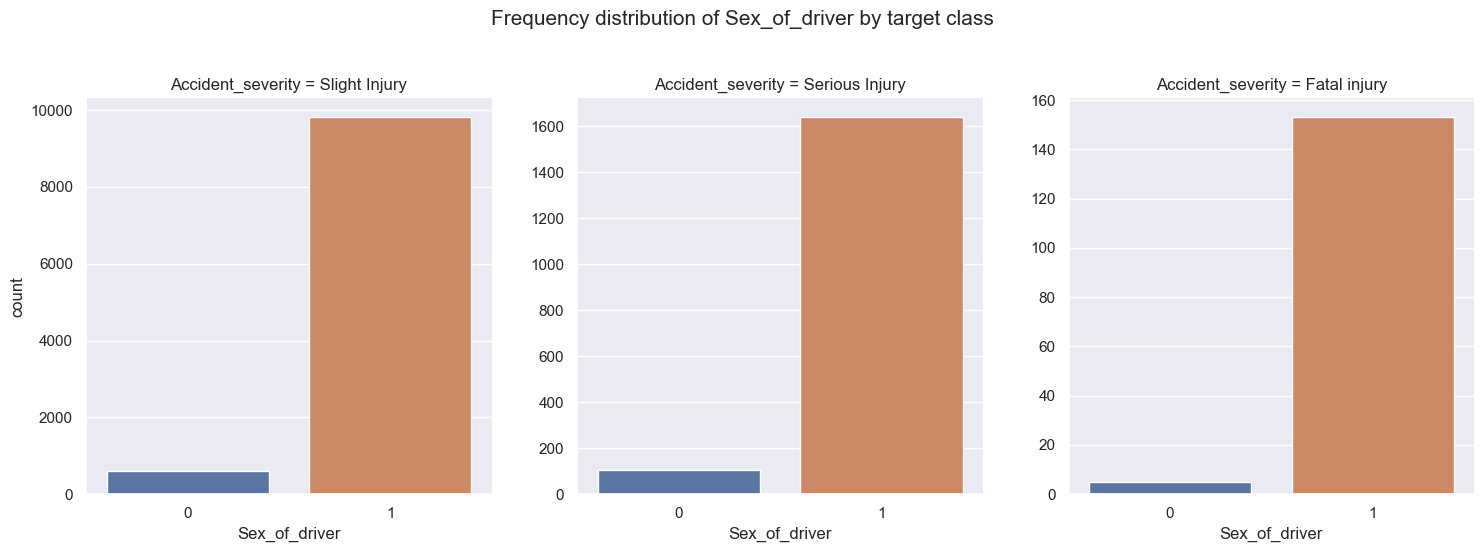

<Figure size 1000x500 with 0 Axes>

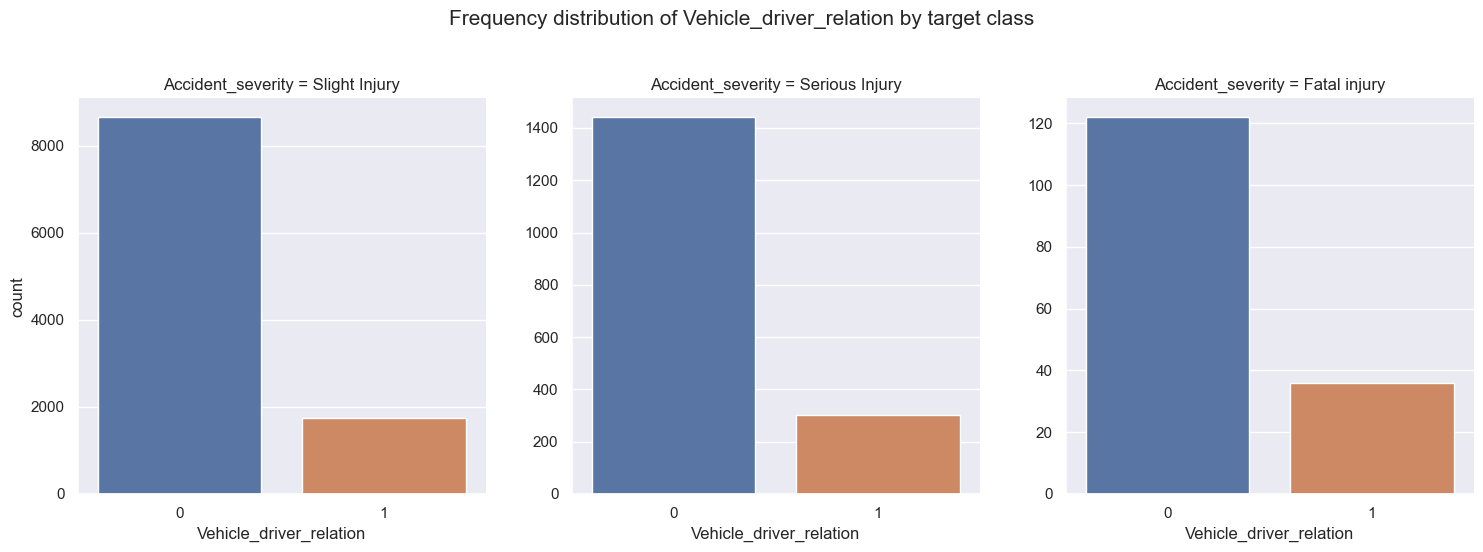

<Figure size 1000x500 with 0 Axes>

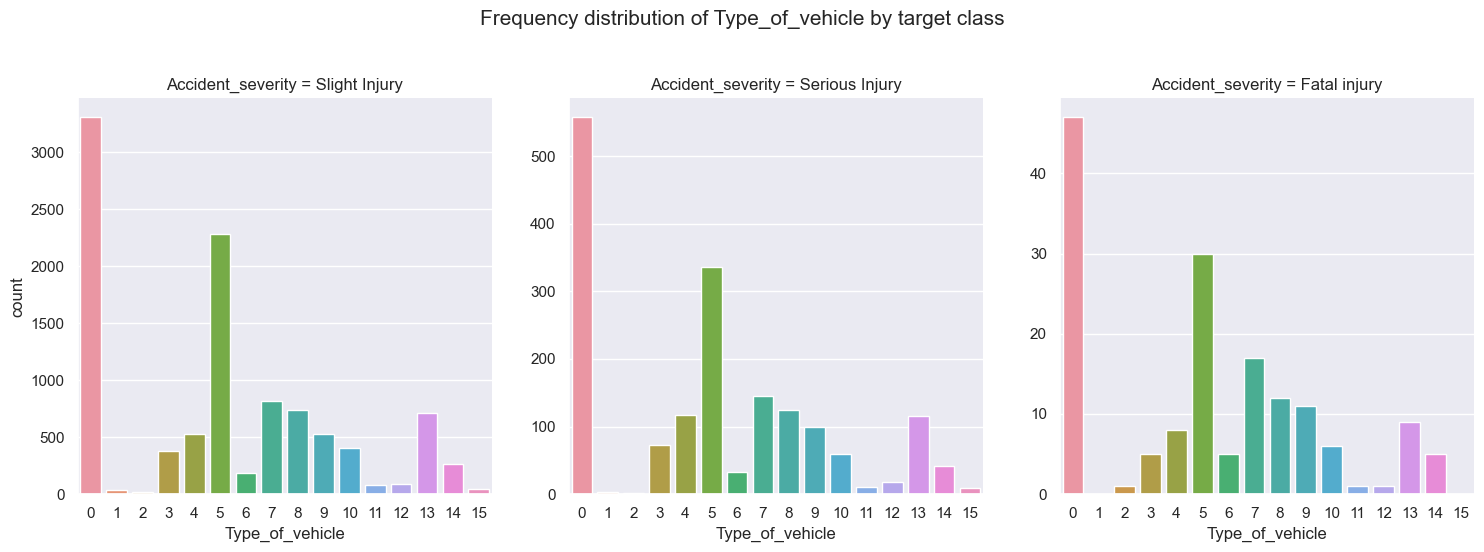

<Figure size 1000x500 with 0 Axes>

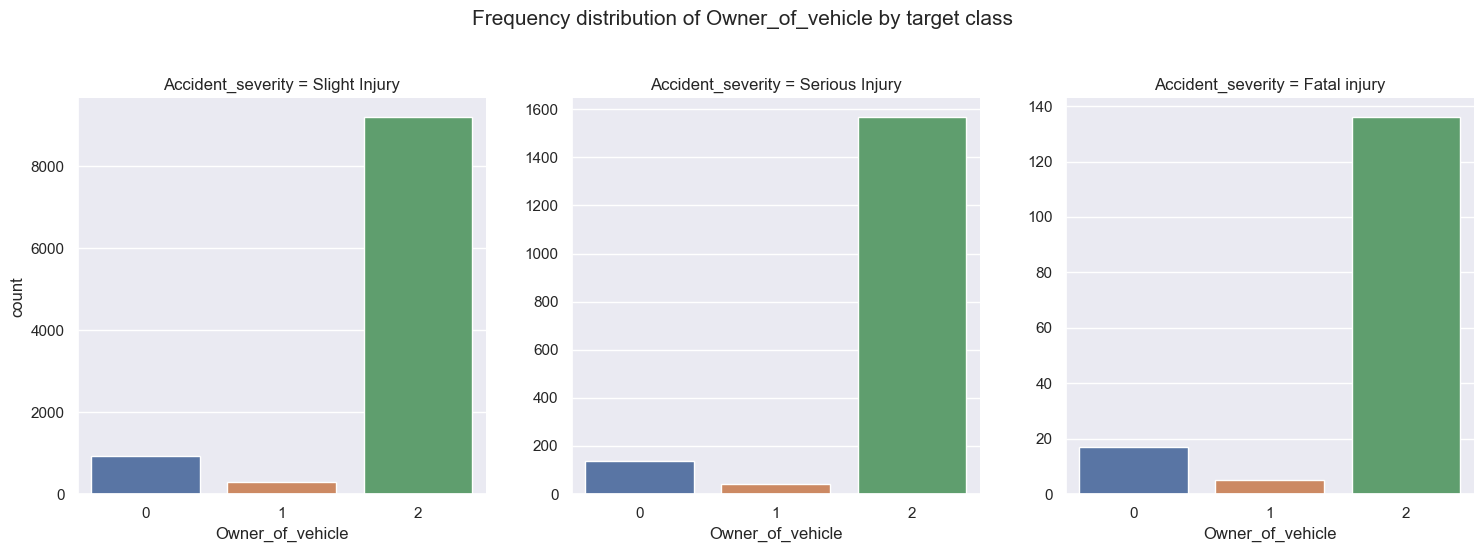

<Figure size 1000x500 with 0 Axes>

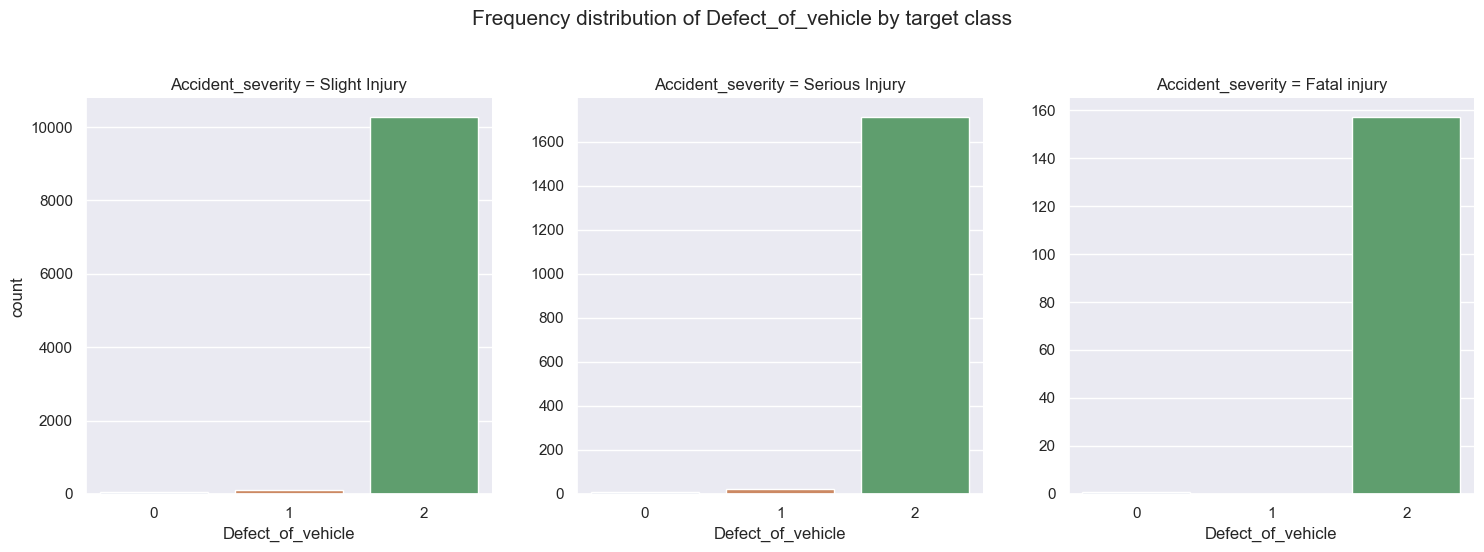

<Figure size 1000x500 with 0 Axes>

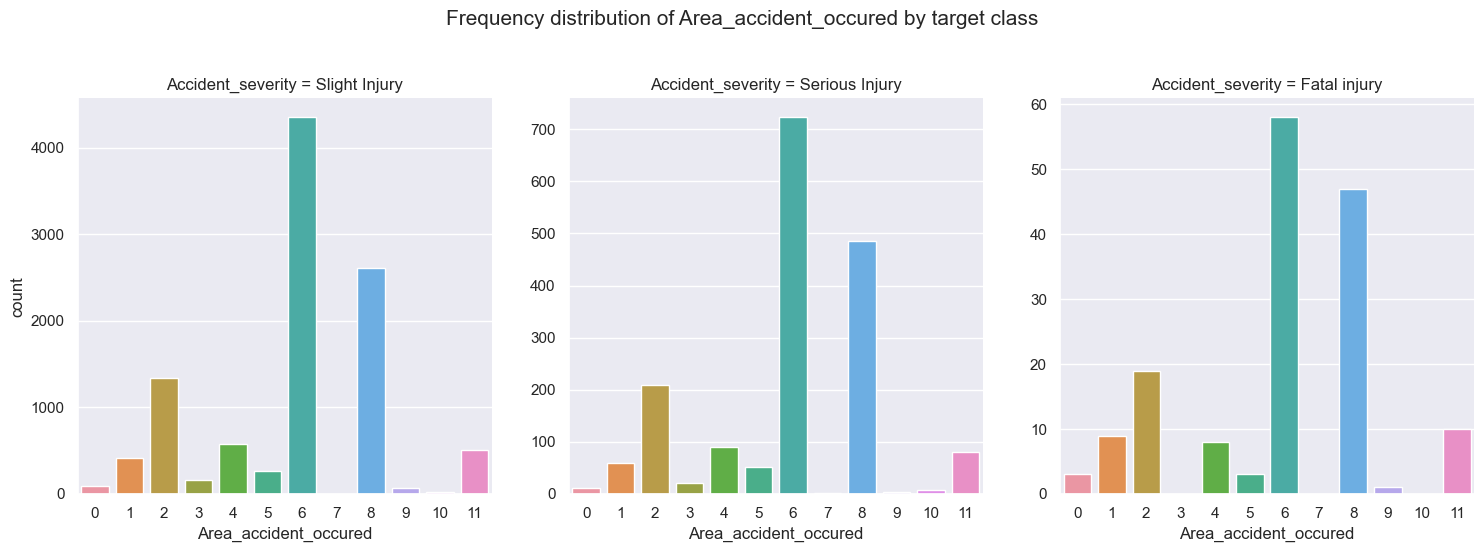

<Figure size 1000x500 with 0 Axes>

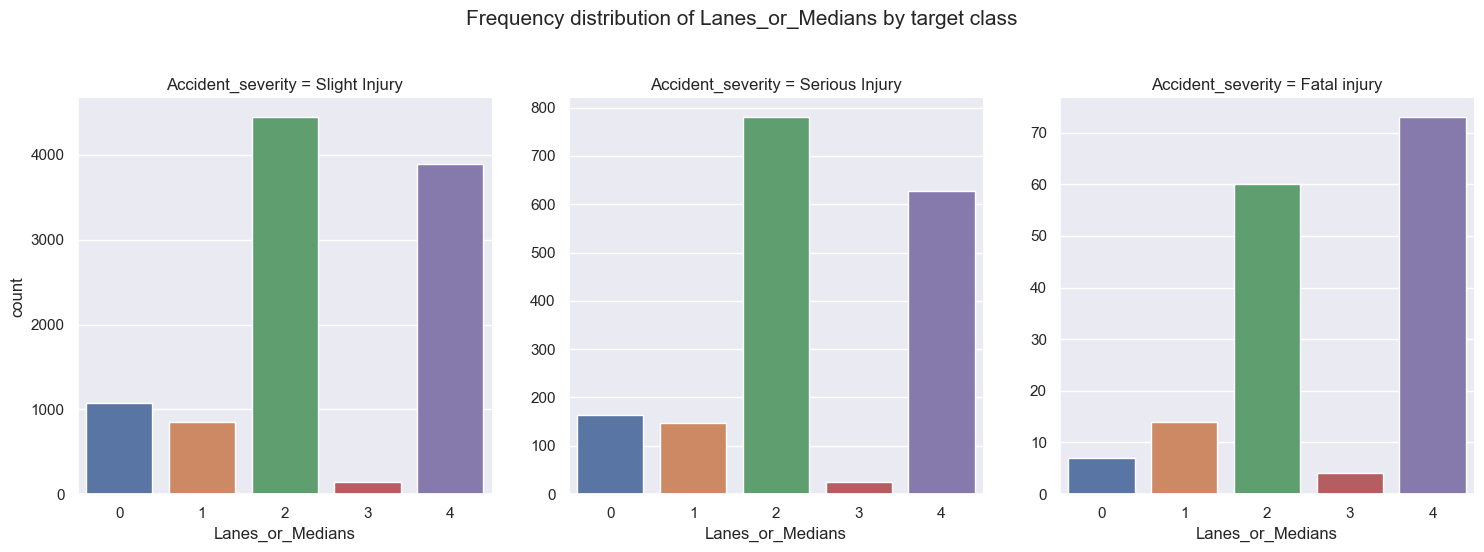

<Figure size 1000x500 with 0 Axes>

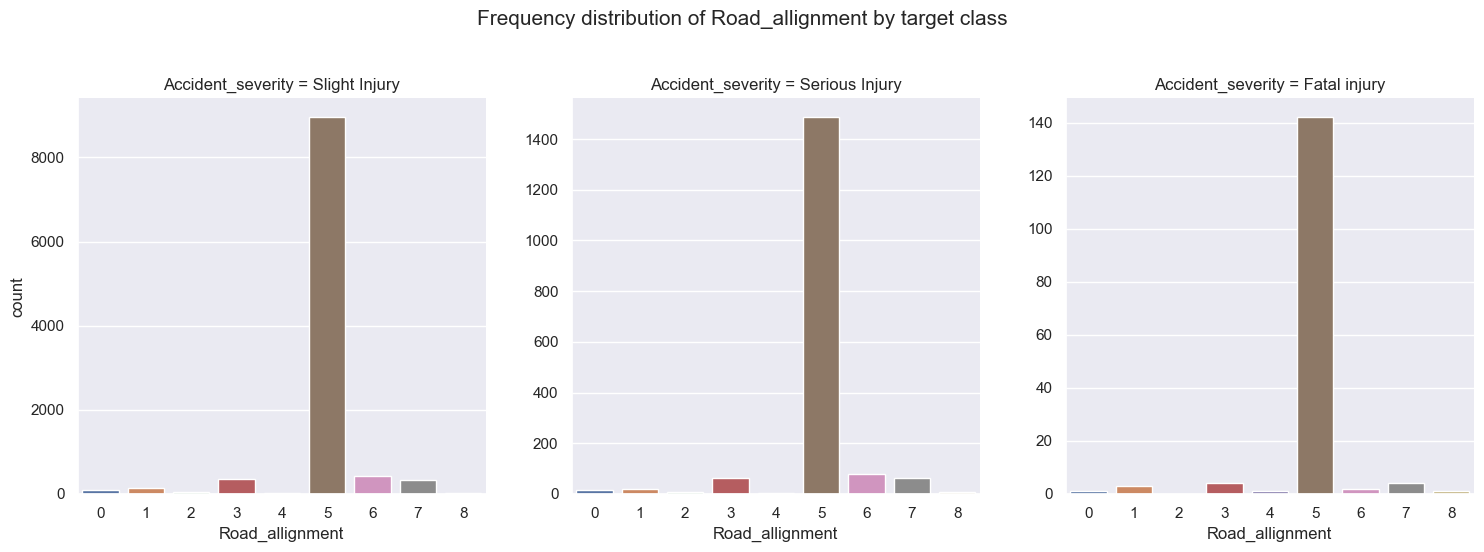

<Figure size 1000x500 with 0 Axes>

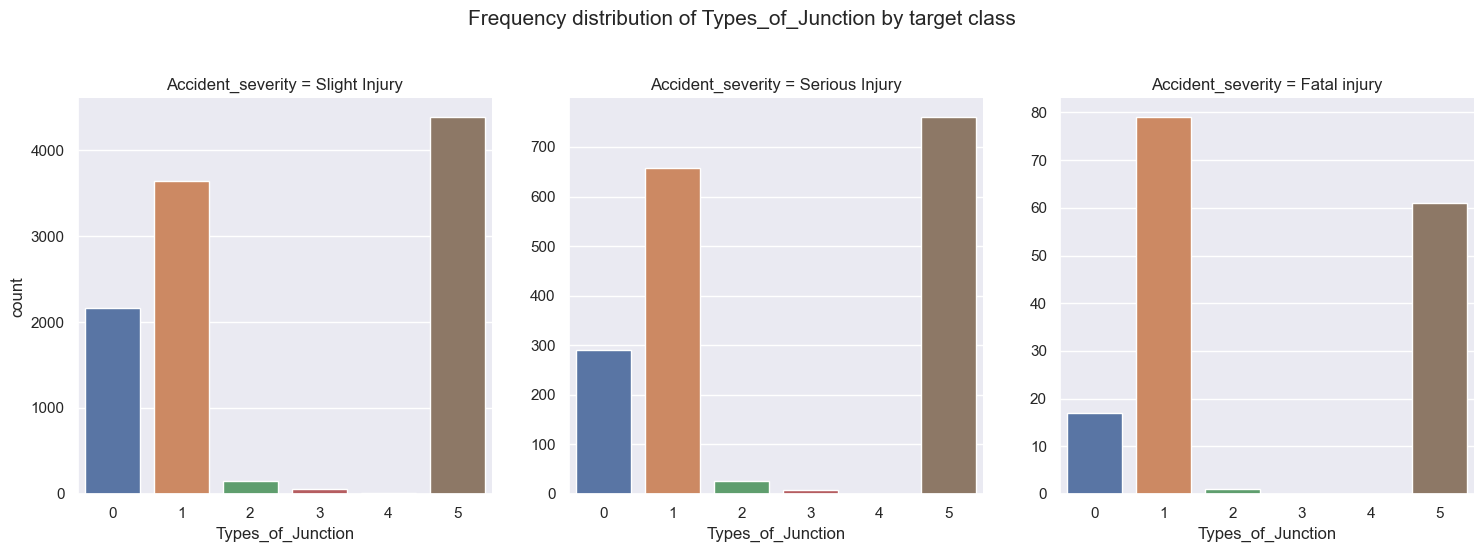

<Figure size 1000x500 with 0 Axes>

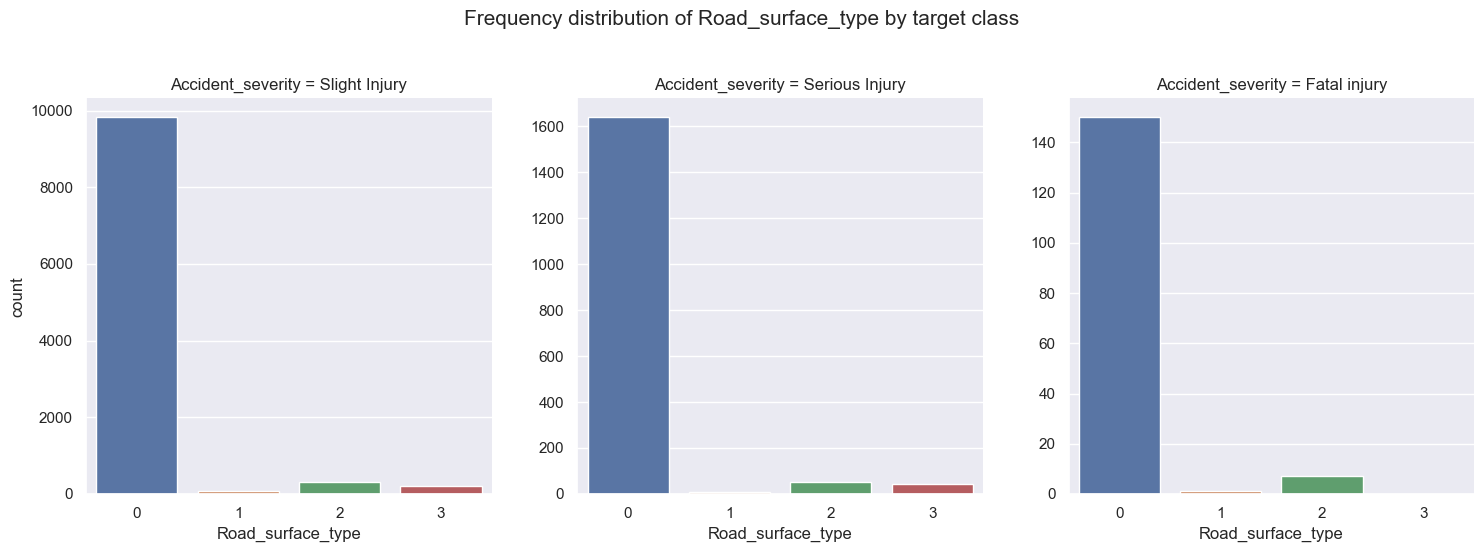

<Figure size 1000x500 with 0 Axes>

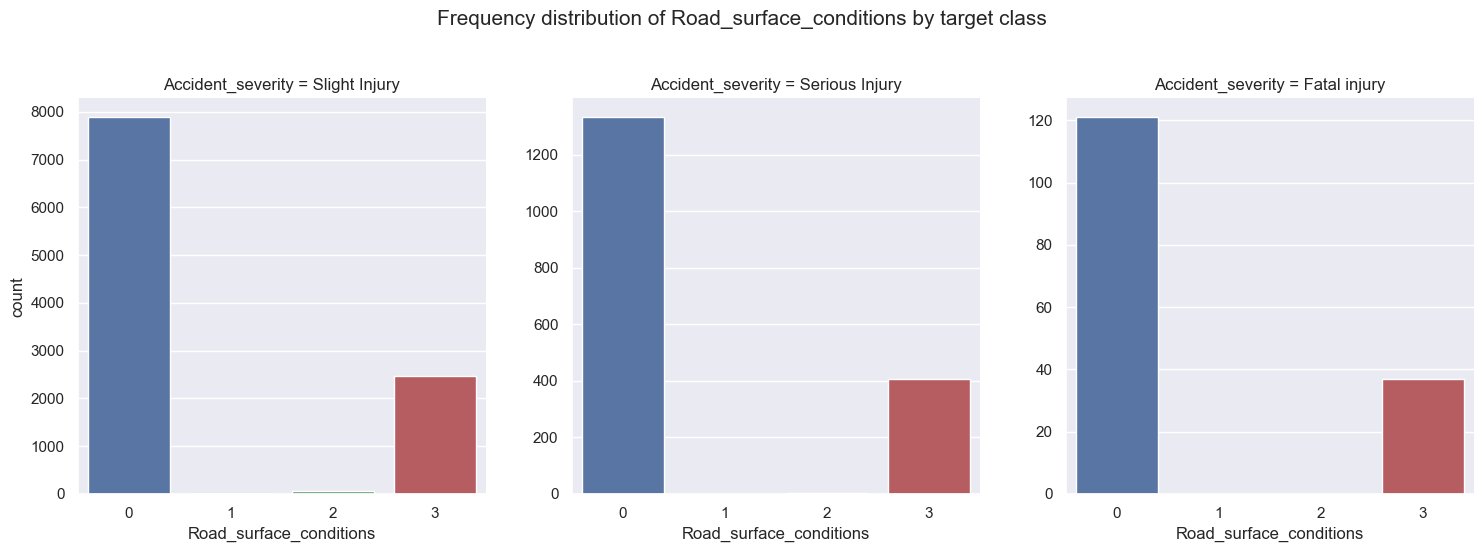

<Figure size 1000x500 with 0 Axes>

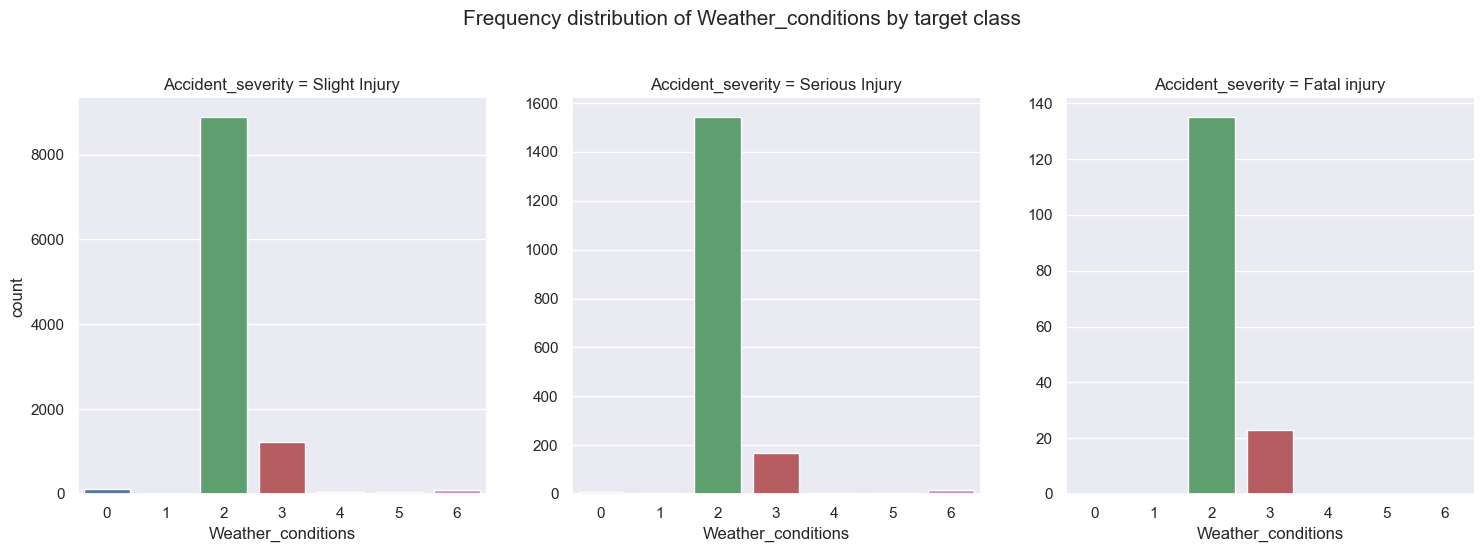

<Figure size 1000x500 with 0 Axes>

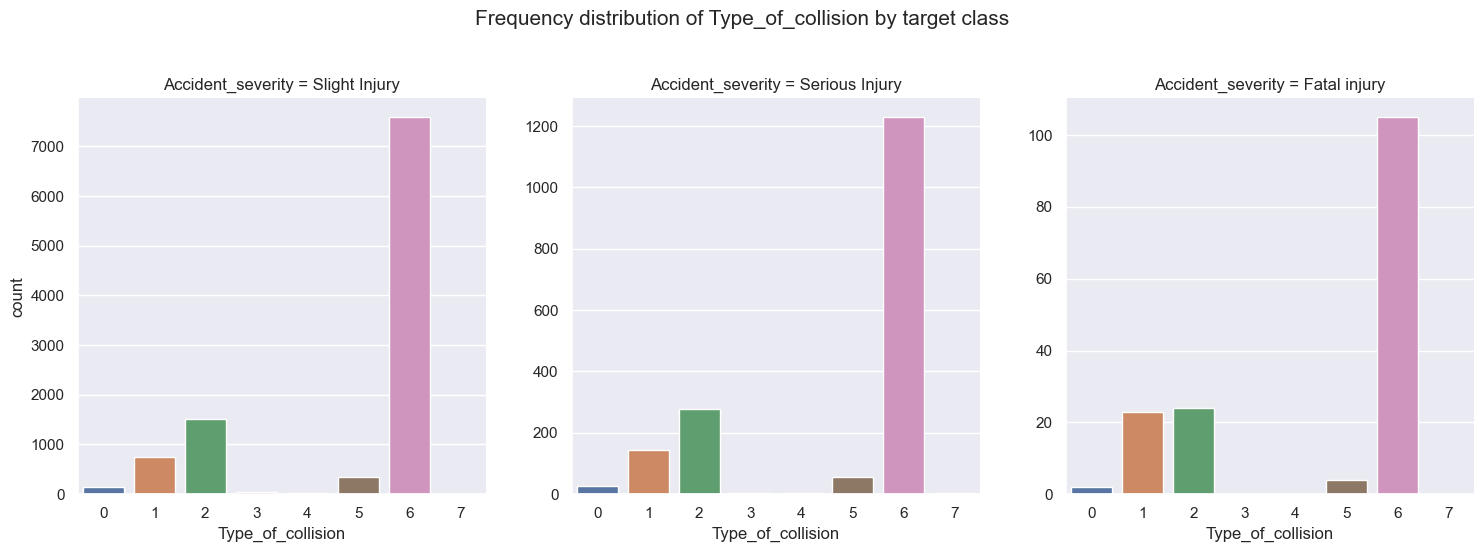

<Figure size 1000x500 with 0 Axes>

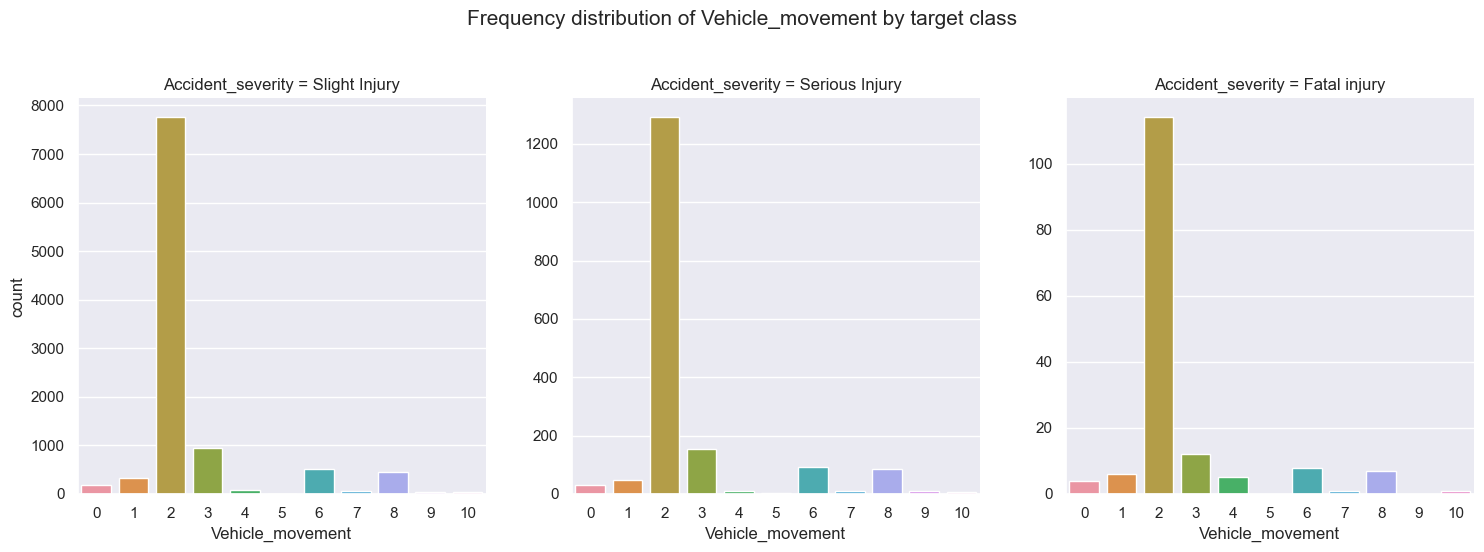

<Figure size 1000x500 with 0 Axes>

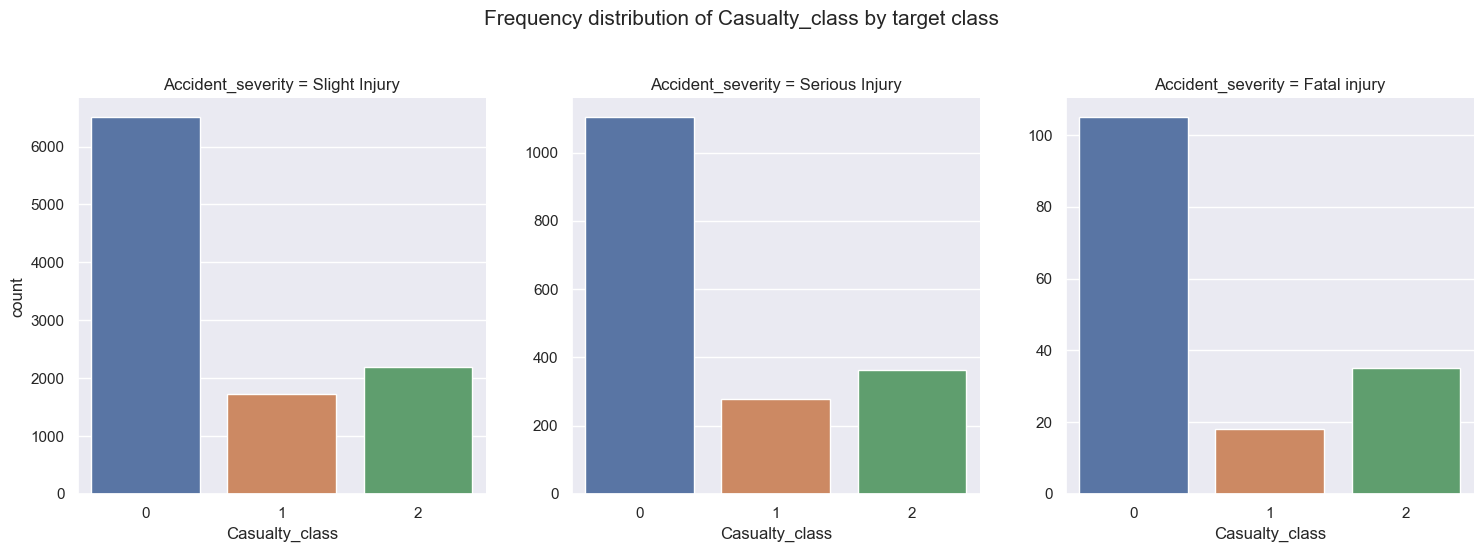

<Figure size 1000x500 with 0 Axes>

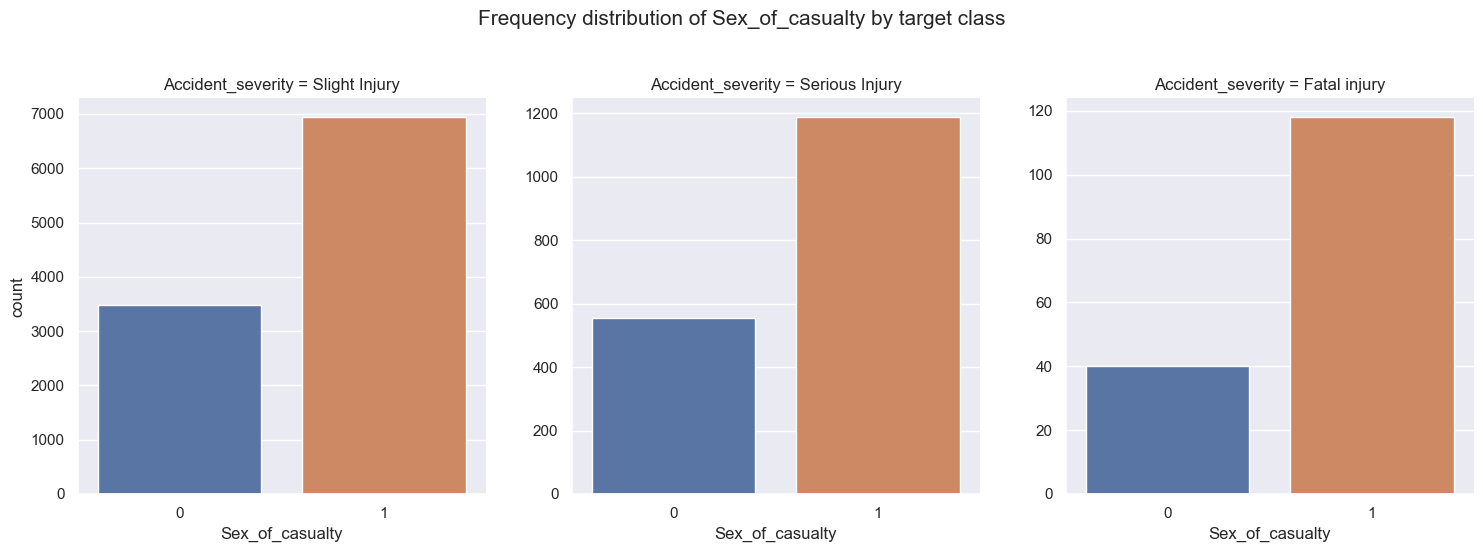

<Figure size 1000x500 with 0 Axes>

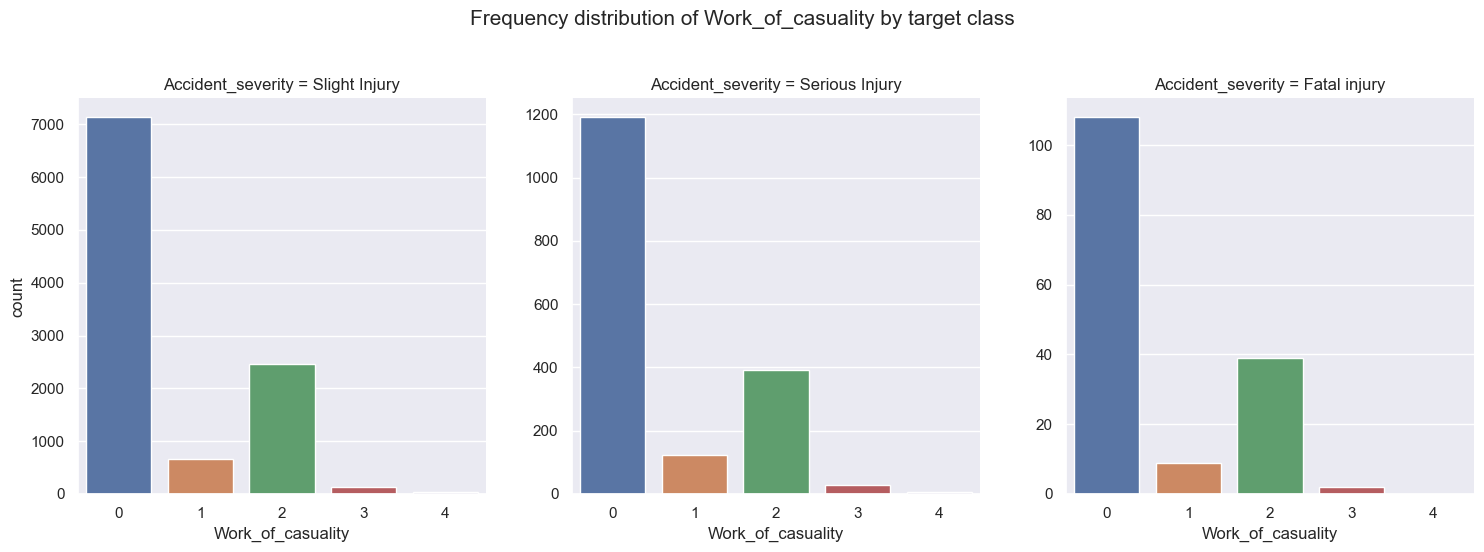

<Figure size 1000x500 with 0 Axes>

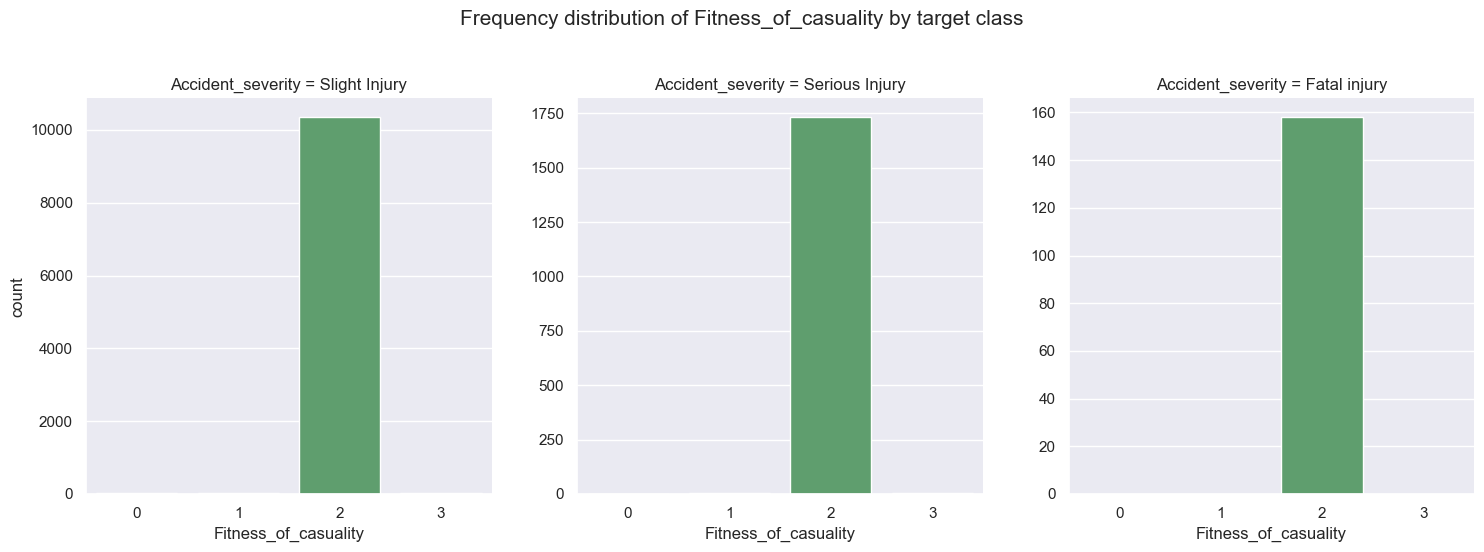

<Figure size 1000x500 with 0 Axes>

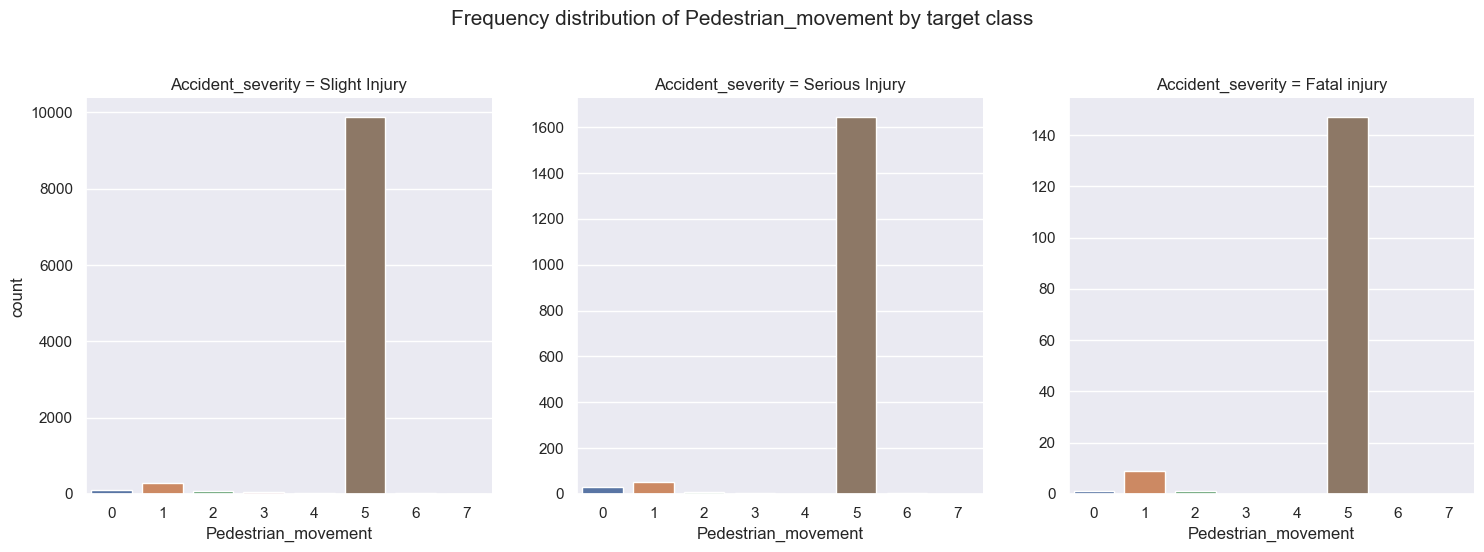

<Figure size 1000x500 with 0 Axes>

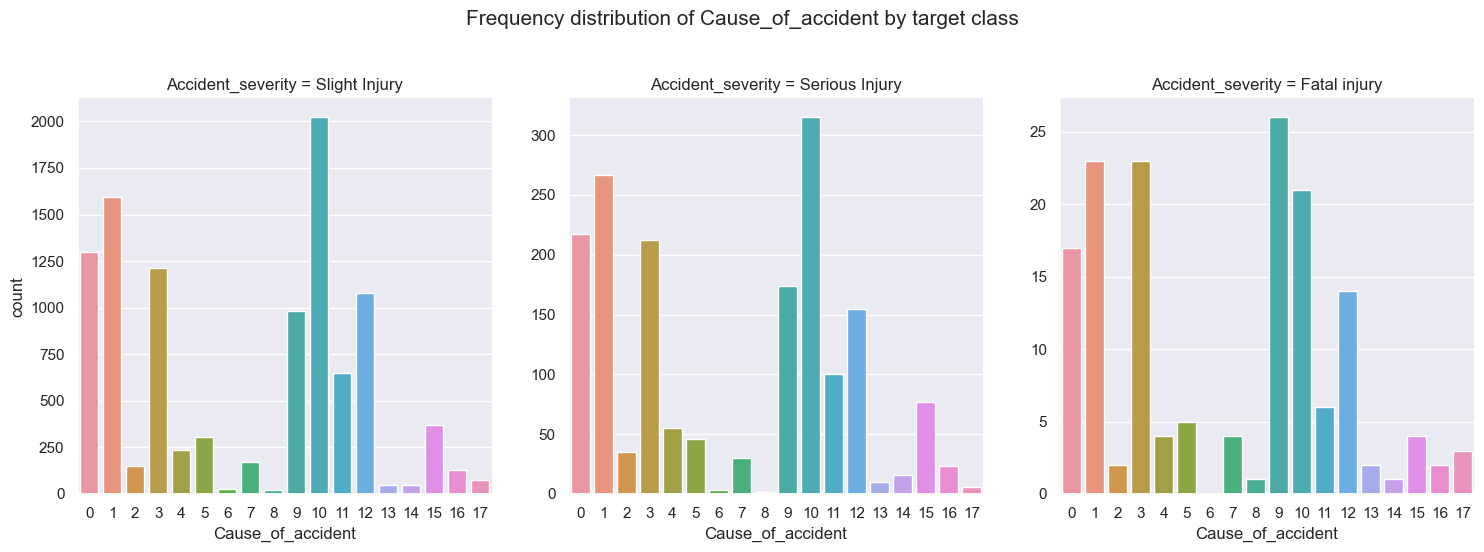

<Figure size 640x480 with 0 Axes>

In [46]:
# Catplot to compare frequency distributions of categorical features across target classes
for feature in ordinal_cols + nominal_cols:
    if feature != 'Accident_severity':
        plt.figure(figsize = (10, 5))
        catplot = sns.catplot(data = data, x = feature, col = 'Accident_severity', kind = 'count', sharey = False)
        plt.suptitle("Frequency distribution of {} by target class".format(feature), y = 1.1, fontsize = 15)
        plt.show()
plt.tight_layout()

In [47]:
def heatmap(data):
    plt.figure(figsize = (36, 27))
    sns.heatmap(data.corr(), annot = True, cmap = plt.cm.CMRmap_r)

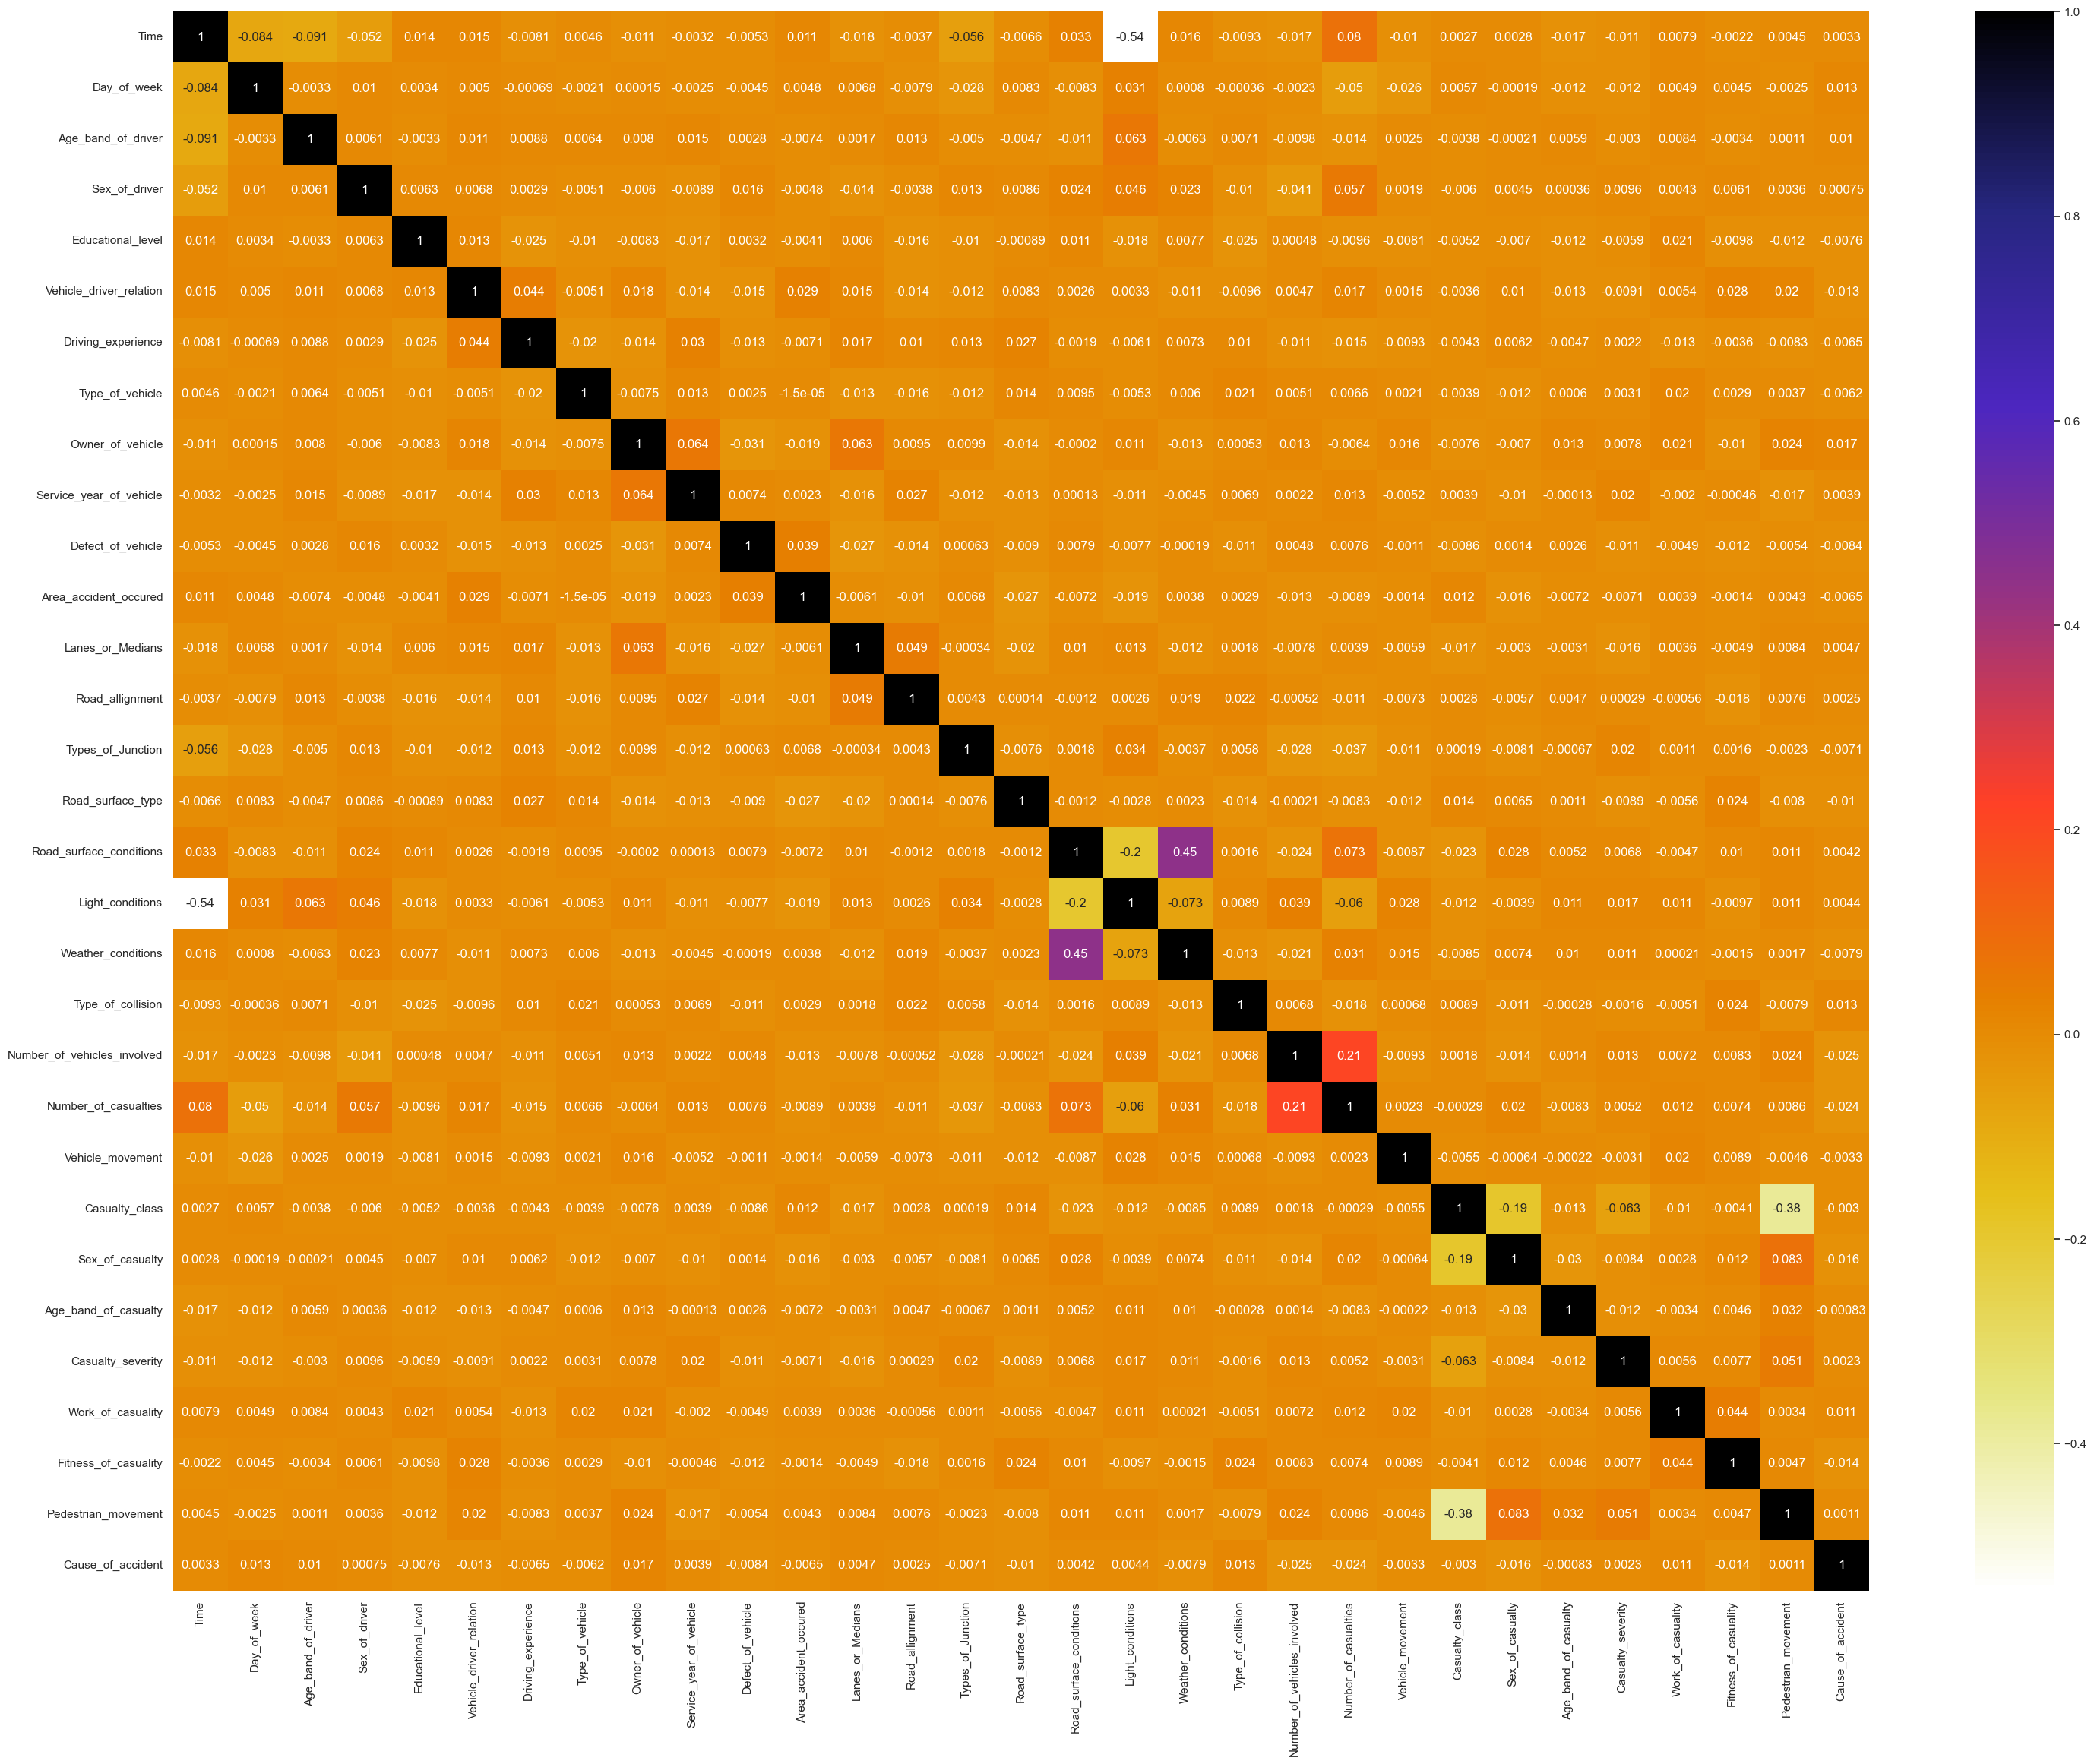

In [48]:
data_heat = data.drop('Accident_severity', axis = 1)
heatmap(data_heat)

In [49]:
# Drop columns
drop_cols = ['Casualty_class', 'Sex_of_casualty', 'Casualty_severity']
data = data.drop(drop_cols, axis = 1)

In [50]:
def predictor_target_split(data, target):
    y = data[target] 
    X = data.drop(target, axis = 1) 
    return X, y

In [51]:
X, y = predictor_target_split(data, 'Accident_severity')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

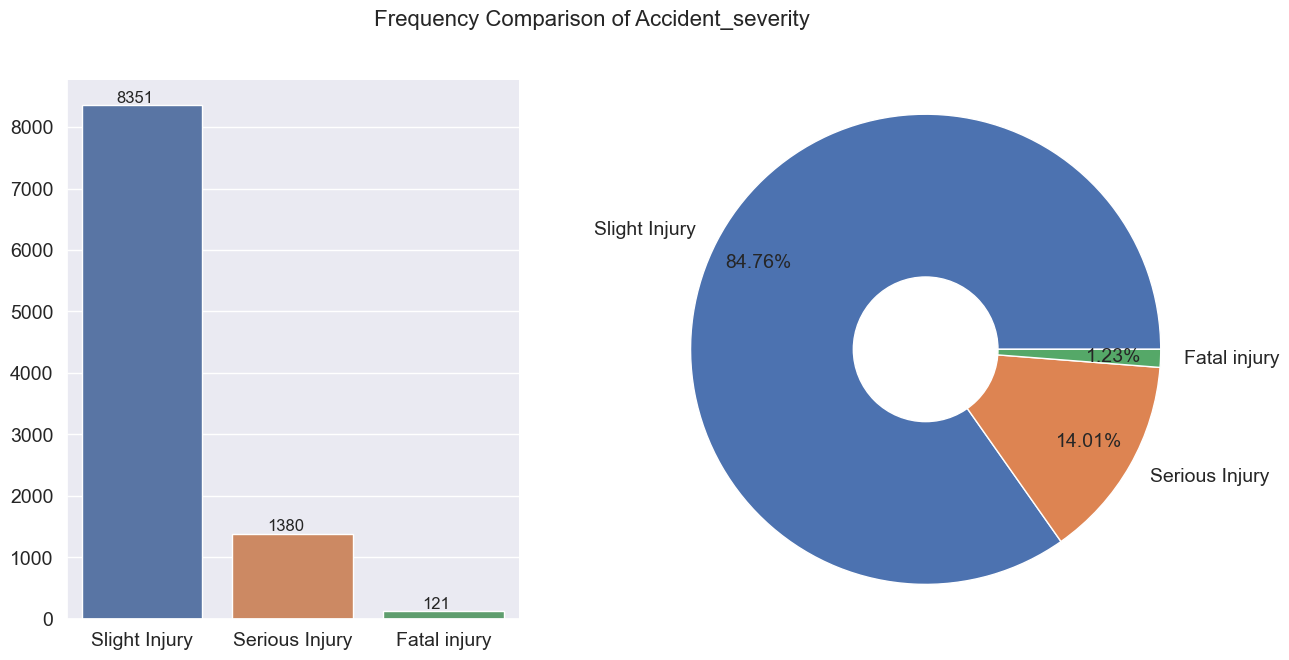

In [53]:
y_train_df = pd.DataFrame(y_train)
count_donut(y_train_df, 'Accident_severity')

In [54]:
def rus(X_train, y_train):
    rusil = RandomUnderSampler(random_state = 42, replacement = True)
    X_train_rusil, y_train_rusil = rusil.fit_resample(X_train, y_train)
    return X_train_rusil, y_train_rusil

In [55]:
def ros(X_train, y_train):
    rosil = RandomOverSampler(random_state = 42)
    X_train_rosil, y_train_rosil = rosil.fit_resample(X_train, y_train)
    return X_train_rosil, y_train_rosil

In [56]:
def smote(X_train, y_train):
    smote = SMOTE(random_state = 42, n_jobs = -1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

In [57]:
def nm(X_train, y_train):
    nm = NearMiss()
    X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)
    return X_train_nm, y_train_nm

In [58]:
def resampler(X_train, y_train, method = smote, countplot = True):
    if method not in [rus, ros, smote, nm]:
        print("Method invalid")
    else:
        X_train_new, y_train_new = method(X_train, y_train)
        if countplot == True:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
            ax1 = sns.countplot(y_train, ax = ax1)
            ax2 = sns.countplot(y_train_new, ax = ax2)
            ax2.set_ylabel('')
            plt.suptitle("Frequency distribution of target variable in the training set before and after resampling", y = 1.1, fontsize = 15)
            plt.subplots_adjust(wspace = 0.4)
            plt.show()
        return X_train_new, y_train_new

C:\Users\josh\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


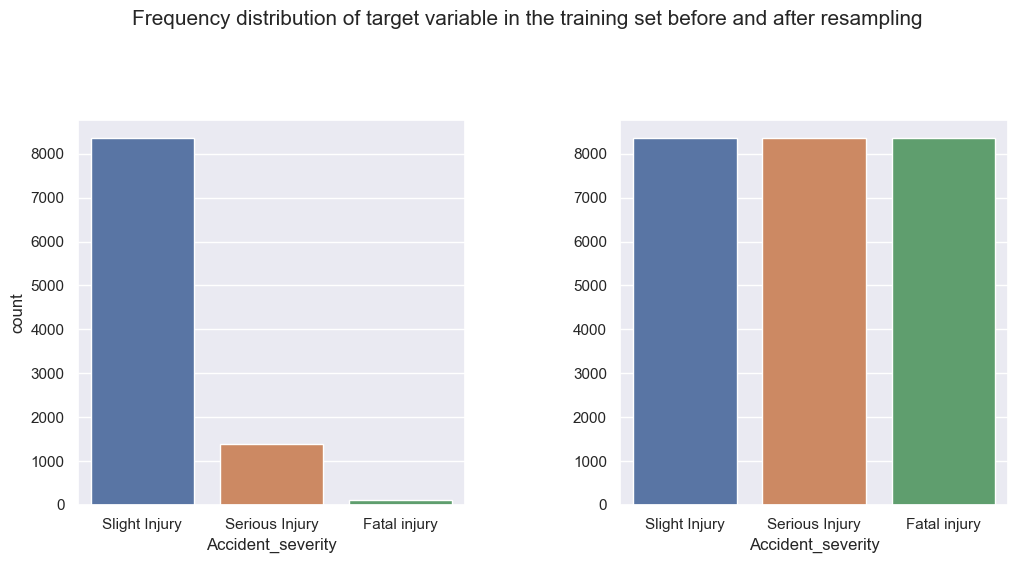

In [59]:
X_train, y_train = resampler(X_train, y_train, method = smote, countplot = True)

In [60]:
# Encoding the target variable
y_train = y_train.map(manual_encoder_dict['Accident_severity'])
y_test = y_test.map(manual_encoder_dict['Accident_severity'])

In [61]:
# Function to relocate each column of a dataframe to get rid of negative values
def spread_positivity(data):
    data_positive = data.copy(deep = True)
    for feature in data_positive.columns:
        if np.any(data_positive[feature] < 0) == True:
            data_positive[feature] = data_positive[feature] - data_positive[feature].min()
    return data_positive

In [62]:
# Function to relocate a series to get rid of negative values
def spread_positivity_for_series(data):
    data_positive = data.copy(deep = True)
    if np.any(data_positive < 0) == True:
        data_positive = data_positive - data_positive.min()
    return data_positive

In [63]:
# Chi-square feature selection
def feature_selection_chi2(X_train, y_train, X_test, k = 'all'):
    
    # Fixing negativity issues
    if np.any(X_train < 0) == True:
        X_train = spread_positivity(X_train)
    if np.any(y_train < 0) == True:
        y_train = spread_positivity_for_series(y_train)
    if np.any(X_test < 0) == True:
        X_test = spread_positivity(X_test)
     
    # Feature selection
    fs = SelectKBest(score_func = chi2, k = k)
    fs.fit(X_train, y_train)
    
    # Selected columns
    cols = fs.get_support(indices = True)
    
    # Output data
    X_train_fs = X_train.iloc[:, cols]
    X_test_fs = X_test.iloc[:, cols]
    
    return X_train_fs, X_test_fs, fs

In [64]:
# Mutual information feature selection
def feature_selection_mutual_information(X_train, y_train, X_test, k = 'all'):
     
    # Feature selection
    fs = SelectKBest(score_func = mutual_info_classif, k = k)
    fs.fit(X_train, y_train)
    
    # Selected columns
    cols = fs.get_support(indices = True)
    
    # Output data
    X_train_fs = X_train.iloc[:, cols]
    X_test_fs = X_test.iloc[:, cols]
    
    return X_train_fs, X_test_fs, fs

In [65]:
X_train, X_test, fs = feature_selection_chi2(X_train, y_train, X_test, k = 'all')

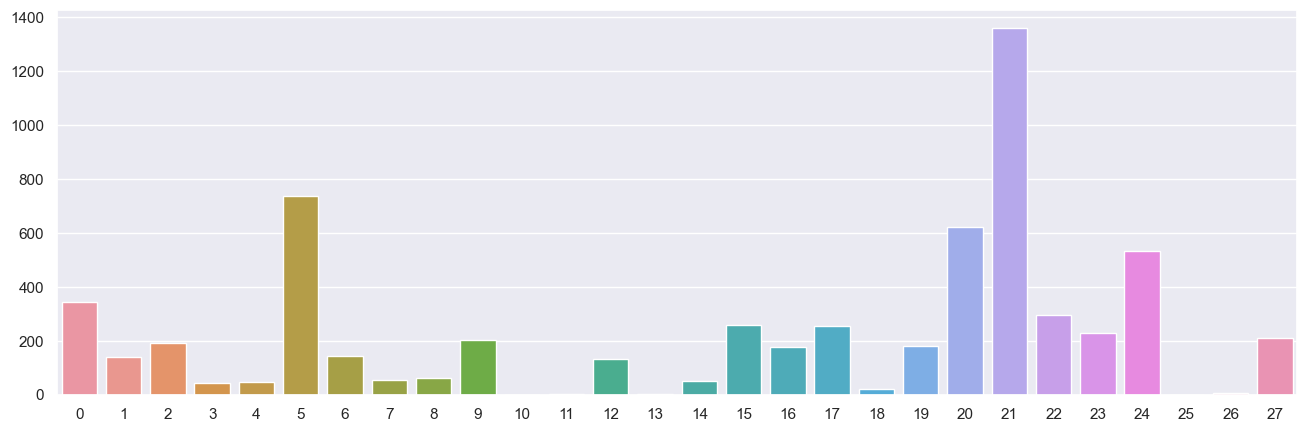

In [66]:
# Plotting the scores
plt.figure(figsize = (16, 5))
sns.barplot(x = [i for i in range(len(fs.scores_))], y = fs.scores_)
plt.show()

In [67]:
# Select top 16 features
X_train, X_test, fs = feature_selection_chi2(X_train, y_train, X_test, k = 16)

In [68]:
# Computation of confusion matrix
def conf_mat(y_pred, y_test):
    class_names = ['Slight', 'Serious', 'Fatal']
    tick_marks_y = [0.5, 1.5, 2.5]
    tick_marks_x = [0.5, 1.5, 2.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(3), range(3))
    plt.figure(figsize = (6, 4.75))
    sns.set(font_scale = 1.4) # label size
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": 16}, fmt = 'd') # font size
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

In [69]:
# Summary dictionary initialization
f1_dict = {}

Weighted F1-score on the test set: 0.6936970409768639


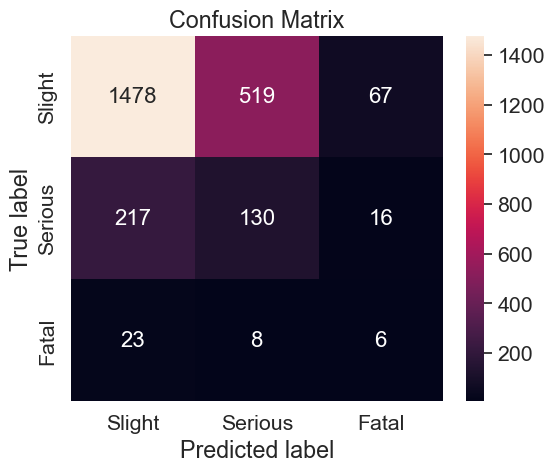

In [70]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
print("Weighted F1-score on the test set: {}".format(score))
f1_dict['Decision Tree'] = score
conf_mat(y_pred, y_test)

Weighted F1-score on the test set: 0.7414811057419154


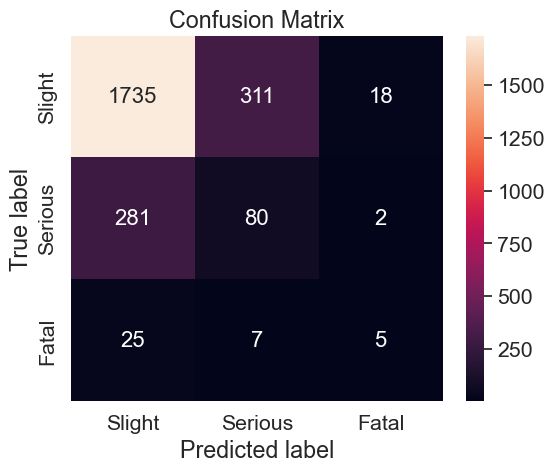

In [71]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
print("Weighted F1-score on the test set: {}".format(score))
f1_dict['Random Forest'] = score
conf_mat(y_pred, y_test)

weighted F1-score on the test set: 0.7414811057419154


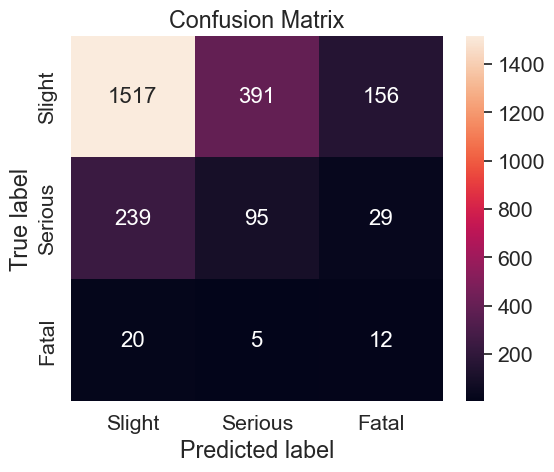

In [72]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
print("weighted F1-score on the test set: {}".format(score))
f1_dict['XGBoost'] = score
conf_mat(y_pred_xgb, y_test)

Weighted F1-score on the test set: 0.7595790967533596


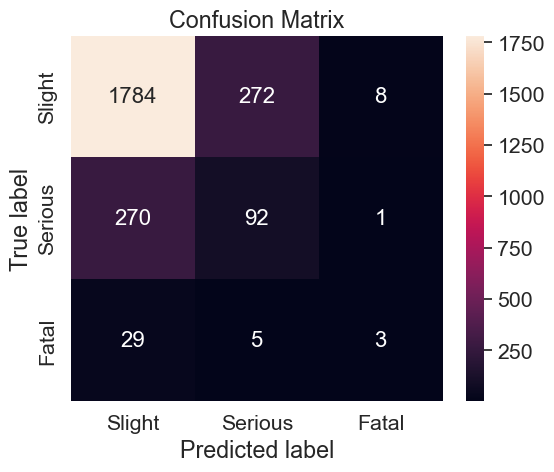

In [73]:
extree = ExtraTreesClassifier(random_state = 42)
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
print("Weighted F1-score on the test set: {}".format(score))
f1_dict['ExtraTrees'] = score
conf_mat(y_pred, y_test)

In [74]:
# Summary dataframe
f1_df = pd.DataFrame(f1_dict.items(), columns = ['Classifier', 'F1-score'])
f1_df.sort_values(by = ['F1-score'], ascending = False)

Classifier  F1-score
3     ExtraTrees  0.759579
1  Random Forest  0.741481
2        XGBoost  0.741481
0  Decision Tree  0.693697

In [75]:
# Summary dictionary initialization
f1_dict_ht = {}

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\josh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\josh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\josh\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\josh\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\josh\anaconda3\lib\site-packages\skle

Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best weighted F1-score: 0.8899869413648774
 
Weighted F1-score on the test set: 0.750876051970391


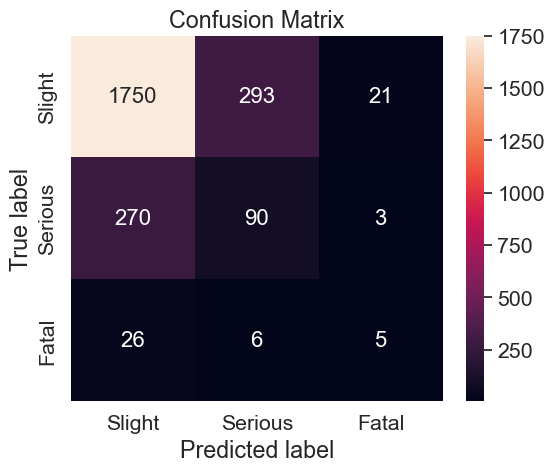

In [77]:
# Hyperparameter tuning for Random Forest
cv = KFold(n_splits = 5, shuffle = True, random_state = 42).split(X = X_train, y = y_train)
rf = RandomForestClassifier()
params_rf = {'n_estimators': [100, 200],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt', 'log2'],
          'class_weight': ['balanced', None]
          }
gsearch_rf = GridSearchCV(estimator = rf, param_grid = params_rf, scoring = 'f1_weighted', n_jobs = -1, cv = cv, verbose = 3)
gsearch_rf_fit = gsearch_rf.fit(X = X_train, y = y_train)
print("Best parameters: {}".format(gsearch_rf.best_params_))
print("Best weighted F1-score: {}".format(gsearch_rf.best_score_))
print(" ")

# Random Forest model evaluation on the test set
rf_best = gsearch_rf.best_estimator_
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)
score = f1_score(y_test, y_pred_rf, average = 'weighted')
print("Weighted F1-score on the test set: {}".format(score))
f1_dict_ht['Random Forest'] = score
conf_mat(y_pred_rf, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}
Best weighted F1-score: 0.7919593824060192
 
Weighted F1-score on the test set: 0.7129402298305132


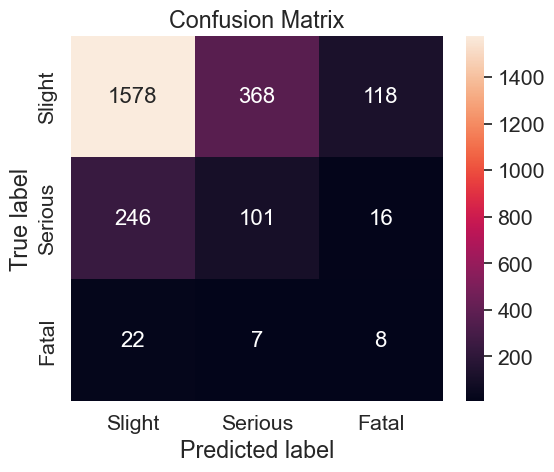

In [78]:
# Hyperparameter tuning for XGBoost
cv = KFold(n_splits = 5, shuffle = True, random_state = 42).split(X = X_train, y = y_train)
xgb = XGBClassifier()
params_xgb = {'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 2, 5],
              'subsample': [0.6, 1.0],
              'colsample_bytree': [0.6],
              'max_depth': [4, 5],
              }
gsearch_xgb = GridSearchCV(estimator = xgb, param_grid = params_xgb, scoring = 'f1_weighted', n_jobs = -1, cv = cv, verbose = 3)
gsearch_xgb_fit = gsearch_xgb.fit(X = X_train, y = y_train)
print("Best parameters: {}".format(gsearch_xgb.best_params_))
print("Best weighted F1-score: {}".format(gsearch_xgb.best_score_))
print(" ")

# ExtraTress model evaluation on the test set
xgb_best = gsearch_xgb.best_estimator_
xgb_best.fit(X_train, y_train)
y_pred_xgb = xgb_best.predict(X_test)
score = f1_score(y_test, y_pred_xgb, average = 'weighted')
print("Weighted F1-score on the test set: {}".format(score))
f1_dict_ht['ExtraTrees'] = score
conf_mat(y_pred_xgb, y_test)

In [79]:
# Summary dataframe
f1_df_ht = pd.DataFrame(f1_dict_ht.items(), columns = ['Classifier', 'F1-score'])
f1_df_ht.sort_values(by = ['F1-score'], ascending = False)




Classifier  F1-score
0  Random Forest  0.750876
1     ExtraTrees  0.712940

In [80]:
import pickle
with open('model/checkpoint.pkl', 'wb') as file:
    pickle.dump(saved_dict, file)

In [81]:
xgb_best.save_model('model/model_xgb.bin')

In [85]:
pip install shap

INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    shap 0.42.1 depends on numpy
    numba 0.55.1 depends on numpy<1.22 and >=1.18

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot install numba==0.55.1 and shap==0.42.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
import shap

SystemError: initialization of _internal failed without raising an exception

In [87]:
# Loading JavaScript library
shap.initjs()

# Sampling from test data predictors
X_test_sample = X_test.sample(100)

# Predicted values corresponding to the sample
y_pred_xgb_sample = np.array(pd.Series(data = y_pred_xgb, index = X_test.index)[X_test_sample.index])

# Explainer
explainer = shap.TreeExplainer(xgb_best)

# Computing SHAP values based on the sample
shap_values = explainer.shap_values(X_test_sample)

NameError: name 'shap' is not defined